In [ ]:
!pip install -qq google-play-scraper
import pandas as pd
from google_play_scraper import Sort, reviews, app

In [ ]:
info = app('com.dafturn.mypertamina', lang='en', country='us')

# **Scraping data menggunakan library google-play-scraper**

In [ ]:
!pip install -qq google-play-scraper
import pandas as pd
from google_play_scraper import Sort, reviews, app

info = app('com.dafturn.mypertamina', lang='id', country='id')

# Mengambil ulasan terbaru
result, continuation_token = reviews(
    'com.dafturn.mypertamina',
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    count=1500,
)

# Mengonversi hasil menjadi DataFrame
app_reviews_df = pd.DataFrame(result, columns=["appVersion", "reviewId", "content", "score", "at"])

# Memfilter ulasan berdasarkan appVersion
#filtered_reviews_df = app_reviews_df[app_reviews_df['appVersion'] == '4.6.4']

# Menyimpan hasil ke CSV
app_reviews_df[["appVersion", "reviewId", "content", "score", "at"]].to_csv('myPertamina.csv', mode='w', index=None, header=True)

# **Menghapus Atribut yang tidak diperlukan**

In [ ]:
import pandas as pd
myPertamina_df = pd.read_csv('myPertamina (RAW).csv')
myPertamina_df.drop('score', axis='columns', inplace=True)
myPertamina_df.drop('appVersion', axis='columns', inplace=True)
myPertamina_df.drop('at', axis='columns', inplace=True)
myPertamina_df.drop('reviewId', axis='columns', inplace=True)

myPertamina_df.to_csv('myPertamina_RemoveAttribute.csv', mode='w', index=None, header=True)

# **Case Folding**

In [ ]:
import pandas as pd
myPertamina_df_CaseFolding = pd.read_csv('myPertamina_RemoveAttribute.csv')

def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment

myPertamina_df_CaseFolding['content'] = myPertamina_df_CaseFolding['content'].apply(casefolding)

myPertamina_df_CaseFolding.to_csv('myPertamina_CaseFolding.csv', mode='w', index=None, header=True)

print('Case Folding result: \n')
myPertamina_df_CaseFolding.head(50)

Case Folding result: 



content
0   tolong di perbaiki untuk setting kamera nya, k...
1                  penjelasan penggunaan kurang jelas
2   aplikasi apa ini, di upgrade makin lama makin ...
3   ini aplikasi bagaimana, saya sudah hapus kenda...
4   saran untuk kedepannya sediakan import gambar ...
5                            kalo untuk dapat barcode
6   qr code tidak muncul padahal sudah berhasil di...
7                                                good
8   tolong ini tim it nya diperbaiki sistemnya mas...
9   agak ribet dapetin barcode nya mohon dpermudah...
10  aplikasi gak jelas capek capek isi data , sela...
11  kenapa harus ukuran 0,5 fotonya ga satu saja b...
12  kesal kali sama tiap foto stnk, kenapa setiap ...
13                                         mantap 👍👍🙏
14  bukan nya di permudah,malah ribet,upload foto ...
15        mau upload stnk saja susahnya setengah mati
16                                          buat baru
17  kualitas kamera aplikasi lu yg burik! gmn mau ...
18  daftar gagal terus pertama foto stnk lah ga je...
19  woyy tolong dong ini, sok² an pake aturan barc...
20  apk dj_m__t daftar terjadi kesalahan teros, mu...
21  habis di updated upload foto stnk susah padaha...
22            ok, mohon banyak lagi metode pembayaran
23                                             mantap
24  aplikasi buruk, tiba2 barcode yang ada tidak b...
25                  sangat puas membantu perekonomian
26                                my pertamina mantap
27  saat perubahan stnk 5 tahunan nopol kendaraan ...
28  tolong diperbaiki sistemnya, karena saat penda...
29                   mantul sekali,, sangat memuaskan
30  dah terdaftar dan dapat brct qris...di update ...
31  my pertaminaku dipake orang lain,login masuk s...
32             kenapa setingan camera di buat wide???
33                                             ok sip
34  sudah semua sosmed pertamina saya chat tidak a...
35  aplikasi gak jelas, subsidi tepat tapi ga tepa...
36                                    sangat membantu
37                                           toooppoo
38                                               good
39                                       sangat bagus
40    upload foto ktp gagal terus,bener" menyusah kan
41  kemarin fitur upload berkas saat mendaftar sub...
42  pegawai pom kebanyakan bercanda. belum ngomong...
43  135 pertamina call center tidak bisa dihubungi...
44  praktis gak ribet jadinya palagi pas gak bawa ...
45  aplikasi foto gabisa fokus. di tolak terus , b...
46  foto buram.. tdk terverifikasi. ambil dari gal...
47  daftar subsidi tepat sulit di akses,mohon untu...
48  makin kesini makin gk jelas , upload stnk ribe...
49  apk ruwett mo daftar bbm subsidi ngisi data sa...

# **Cleaning**

In [ ]:
import re
import string
import pandas as pd

myPertamina_df_clean = pd.read_csv('myPertamina_CaseFolding.csv')

# Proses Cleaning
def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_kata)

def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_angka)

def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_punctuation)

def remove_whitespace_LT(comment):
    return comment.strip()
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_whitespace_LT)

def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_whitespace_multiple)

def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)
myPertamina_df_clean['content'] = myPertamina_df_clean['content'].apply(remove_single_char)

myPertamina_df_clean.to_csv('myPertamina_cleaning.csv', mode='w', index=None, header=True)

print('Hasil Cleaning: \n')
myPertamina_df_clean.head(50)

Hasil Cleaning: 



content
0   tolong di perbaiki untuk setting kamera nya ka...
1                  penjelasan penggunaan kurang jelas
2   aplikasi apa ini di upgrade makin lama makin g...
3   ini aplikasi bagaimana saya sudah hapus kendar...
4   saran untuk kedepannya sediakan import gambar ...
5                            kalo untuk dapat barcode
6   qr code tidak muncul padahal sudah berhasil di...
7                                                good
8   tolong ini tim it nya diperbaiki sistemnya mas...
9   agak ribet dapetin barcode nya mohon dpermudah...
10  aplikasi gak jelas capek capek isi data selalu...
11  kenapa harus ukuran fotonya ga satu saja biar ...
12  kesal kali sama tiap foto stnk kenapa setiap m...
13                                             mantap
14  bukan nya di permudahmalah ribetupload foto be...
15        mau upload stnk saja susahnya setengah mati
16                                          buat baru
17  kualitas kamera aplikasi lu yg burik gmn mau k...
18  daftar gagal terus pertama foto stnk lah ga je...
19  woyy tolong dong ini sok an pake aturan barcod...
20  apk djmt daftar terjadi kesalahan teros mung n...
21  habis di updated upload foto stnk susah padaha...
22             ok mohon banyak lagi metode pembayaran
23                                             mantap
24  aplikasi buruk tiba barcode yang ada tidak bis...
25                  sangat puas membantu perekonomian
26                                my pertamina mantap
27  saat perubahan stnk tahunan nopol kendaraan be...
28  tolong diperbaiki sistemnya karena saat pendaf...
29                     mantul sekali sangat memuaskan
30  dah terdaftar dan dapat brct qrisdi update ngi...
31  my pertaminaku dipake orang lainlogin masuk se...
32                kenapa setingan camera di buat wide
33                                             ok sip
34  sudah semua sosmed pertamina saya chat tidak a...
35  aplikasi gak jelas subsidi tepat tapi ga tepat...
36                                    sangat membantu
37                                           toooppoo
38                                               good
39                                       sangat bagus
40      upload foto ktp gagal terusbener menyusah kan
41  kemarin fitur upload berkas saat mendaftar sub...
42  pegawai pom kebanyakan bercanda belum ngomong ...
43  pertamina call center tidak bisa dihubungi pes...
44  praktis gak ribet jadinya palagi pas gak bawa ...
45  aplikasi foto gabisa fokus di tolak terus busu...
46  foto buram tdk terverifikasi ambil dari galeri...
47  daftar subsidi tepat sulit di aksesmohon untuk...
48  makin kesini makin gk jelas upload stnk ribet ...
49  apk ruwett mo daftar bbm subsidi ngisi data sa...

# **Normalisasi**

In [ ]:
# Normalisasi

import pandas as pd


myPertamina_df_normalisasi = pd.read_csv('myPertamina_cleaning.csv')

def replace_abbreviations(df, csv_file):
    # Membaca file CSV
    normalized_word = pd.read_csv(csv_file)

    # Membuat dictionary untuk singkatan dan teks asli
    kontraksi = normalized_word['singkatan'].to_list()
    real_text = normalized_word['asli'].to_list()

    # Membuat pola regex untuk singkatan
    regex_format = ["(?:^|\\W)" + kata + "(?:$|\\W)" for kata in kontraksi]
    real_text_space = [" " + kata + " " for kata in real_text]

    # Menggantikan singkatan dengan teks asli
    df['content'] = df['content'].replace(regex_format, real_text_space, regex=True)

    return df

# Menggunakan fungsi
myPertamina_df_normalisasi = replace_abbreviations(myPertamina_df_normalisasi, "kamussingkatan.csv")

myPertamina_df_normalisasi.to_csv('myPertamina_normalisasi.csv', mode='w', index=None, header=True)

# Menampilkan hasil
myPertamina_df_normalisasi.head(50)

content
0   tolong di perbaiki untuk setting kamera nya ka...
1                  penjelasan penggunaan kurang jelas
2   aplikasi apa ini di meningkatkan makin lama ma...
3   ini aplikasi bagaimana saya sudah hapus kendar...
4   saran untuk kedepannya sediakan import gambar ...
5                           kalau untuk dapat barcode
6   qr kode tidak muncul padahal sudah berhasil di...
7                                                good
8   tolong ini tim itu nya diperbaiki sistemnya ma...
9    sedikit sulit mendapatkan barcode nya mohon d...
10  aplikasi tidak jelas capai lelah isi data sela...
11  kenapa harus ukuran fotonya tidak satu saja bi...
12  kesal kali sama setiap foto stnk kenapa setiap...
13                                             mantap
14  bukan nya di permudah malah sulit unggah foto ...
15        mau unggah stnk saja susahnya setengah mati
16                                          buat baru
17  kualitas kamera aplikasi kamu yang buruk bagai...
18  daftar gagal terus pertama foto stnk lah tidak...
19  woyy tolong dong ini sok an pakai aturan barco...
20   apakah djmt daftar terjadi kesalahan terus ha...
21  habis di update unggah foto stnk susah padahal...
22            oke mohon banyak lagi metode pembayaran
23                                             mantap
24  aplikasi buruk tiba barcode yang ada tidak bis...
25                  sangat puas membantu perekonomian
26                                 mypertamina mantap
27  saat perubahan stnk tahunan nomor polisi kenda...
28  tolong diperbaiki sistemnya karena saat pendaf...
29               mantap betul sekali sangat memuaskan
30   sudah terdaftar dan dapat barcode qris di upd...
31  my pertamina saya dipakai orang lain login mas...
32                kenapa setingan kamera di buat wide
33                                        oke mantap 
34  sudah semua sosial media pertamina saya chat t...
35  aplikasi tidak jelas subsidi tepat tetapi tida...
36                                    sangat membantu
37                                            mantap 
38                                               good
39                                       sangat bagus
40     unggah foto ktp gagal terus benar menyusah kan
41  kemarin fitur unggah berkas saat mendaftar sub...
42  pegawai pom kebanyakan bercanda belum bicara b...
43  pertamina call center tidak bisa dihubungi pes...
44  praktis tidak sulit jadinya apalagi saat tidak...
45  aplikasi foto tidak bisa fokus di tolak terus ...
46  foto buram tidak terverifikasi ambil dari gale...
47  daftar subsidi tepat sulit di akses mohon untu...
48  makin kesini makin tidak jelas unggah stnk sul...
49   apakah sulit mau daftar bahan bakar minyak su...

In [ ]:
!pip install nltk

## **Stopwords tanpa file tambahan (Tidak dipakai)**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Mengunduh daftar stopwords jika belum ada
nltk.download('stopwords')

# Memuat dataset
myPertamina_df_stopwords = pd.read_csv('myPertamina_translated.csv')

# Mengambil daftar stopwords dari NLTK
list_stopwords = set(stopwords.words('indonesian'))

def remove_stopwords(text):
    if isinstance(text, str):  # Cek jika input adalah string
        return ' '.join([word for word in text.lower().split() if word not in list_stopwords])
    return text  # Jika bukan string, kembalikan apa adanya

# Mengaplikasikan fungsi pada kolom 'content'
myPertamina_df_stopwords['content'] = myPertamina_df_stopwords['content'].apply(remove_stopwords)

# Menampilkan hasil
myPertamina_df_stopwords.head(50)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: 'myPertamina_translated.csv'

# **STOPWORDS DENGAN FILE TAMBAHAN stopwordsID.csv**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Mengunduh daftar stopwords jika belum ada
nltk.download('stopwords')

# Memuat dataset utama
myPertamina_df_stopwords = pd.read_csv('myPertamina_normalisasi.csv')

# Memuat daftar stopwords tambahan dari file stopwordsID.csv
stopwords_custom_df = pd.read_csv('stopwordsID.csv', header=None)  # Pastikan file tidak memiliki header
stopwords_custom = set(stopwords_custom_df[0].tolist())  # Ambil semua stopwords dari kolom pertama

# Mengambil daftar stopwords dari NLTK
list_stopwords_nltk = set(stopwords.words('indonesian'))

# Gabungkan stopwords dari NLTK dan dari file tambahan
list_stopwords = list_stopwords_nltk.union(stopwords_custom)

def remove_stopwords(text):
    if isinstance(text, str):  # Cek jika input adalah string
        return ' '.join([word for word in text.lower().split() if word not in list_stopwords])
    return text  # Jika bukan string, kembalikan apa adanya

# Mengaplikasikan fungsi pada kolom 'content'
myPertamina_df_stopwords['content'] = myPertamina_df_stopwords['content'].apply(remove_stopwords)

# Simpan hasil ke file baru
myPertamina_df_stopwords.to_csv('myPertamina_stopwords.csv', mode= 'w', index=False)

# Menampilkan hasil pertama
print(myPertamina_df_stopwords.head(50))


                                              content
0   tolong perbaiki setting kamera kameranya langs...
1                               penjelasan penggunaan
2   aplikasi meningkatkan tolong perbaiki susah in...
3   aplikasi hapus kendaraan ganti kaleng ditambah...
4   saran kedepannya sediakan import gambar galeri...
5                                             barcode
6                  qr kode muncul berhasil verifikasi
7                                                good
8   tolong tim diperbaiki sistemnya isi bahan baka...
9       sulit barcode mohon permudah rakyat indonesia
10  aplikasi capai lelah isi data sistem bermasala...
11                          ukuran fotonya biar susah
12  kesal kali foto stnk foto kamera foto dianggap...
13                                             mantap
14          permudah sulit unggah foto berulang ulang
15                          unggah stnk susahnya mati
16                                                   
17  kualitas kamera aplikasi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **mengecek data null**

In [ ]:
#mengecek data null
print("Data Null in content:", myPertamina_df_stopwords['content'].isnull().sum()) # Melihat data yang bernilai null

Data Null in content: 12


In [ ]:
#menghapus data null
myPertamina_df_stopwords = myPertamina_df_stopwords.dropna()

In [ ]:
#mengecek data null
print("Data Null in content:", myPertamina_df_stopwords['content'].isnull().sum()) # Melihat data yang bernilai null

Data Null in content: 0


### **Menghitung jumlah data setelah dilakukan stopwords**

In [ ]:
#menghitung jumlah data
myPertamina_df = pd.read_csv("myPertamina_stopwords.csv")
print(myPertamina_df.count())
print(myPertamina_df.shape)

content    1447
dtype: int64
(1498, 1)


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Tokenizing**

In [ ]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize

# Mengunduh tokenizer NLTK
nltk.download('punkt_tab')

# Membaca data hasil stopword removal
myPertamina_df_tokenizing = pd.read_csv('myPertamina_stopwords.csv')

# Fungsi untuk melakukan tokenizing pada teks
def word_tokenize_wrapper(comment):
    if isinstance(comment, str):  # Cek apakah comment adalah string
        return word_tokenize(comment)
    return []  # Kembalikan list kosong jika bukan string

# Menerapkan tokenizing pada kolom 'content'
myPertamina_df_tokenizing['content'] = myPertamina_df_tokenizing['content'].apply(word_tokenize_wrapper)

# Menyimpan hasil tokenizing ke file baru
myPertamina_df_tokenizing.to_csv('myPertamina_tokenizing.csv', mode='w', index=False, header=True)

# Menampilkan jumlah data yang bernilai null
print("Data Null:", myPertamina_df_tokenizing['content'].isnull().sum())

# Menampilkan hasil tokenizing (50 data pertama)
print('Hasil Tokenizing: \n')
print(myPertamina_df_tokenizing.head(50))

Data Null: 0
Hasil Tokenizing: 

                                              content
0   [tolong, perbaiki, setting, kamera, kameranya,...
1                            [penjelasan, penggunaan]
2   [aplikasi, meningkatkan, tolong, perbaiki, sus...
3   [aplikasi, hapus, kendaraan, ganti, kaleng, di...
4   [saran, kedepannya, sediakan, import, gambar, ...
5                                           [barcode]
6            [qr, kode, muncul, berhasil, verifikasi]
7                                              [good]
8   [tolong, tim, diperbaiki, sistemnya, isi, baha...
9   [sulit, barcode, mohon, permudah, rakyat, indo...
10  [aplikasi, capai, lelah, isi, data, sistem, be...
11                     [ukuran, fotonya, biar, susah]
12  [kesal, kali, foto, stnk, foto, kamera, foto, ...
13                                           [mantap]
14   [permudah, sulit, unggah, foto, berulang, ulang]
15                     [unggah, stnk, susahnya, mati]
16                                               

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Stemming**

In [ ]:
! pip install Sastrawi
#from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

myPertamina_df_stemming = pd.read_csv('myPertamina_tokenizing.csv')

def stemming(comment):
    if isinstance(comment, str):  # Cek apakah comment adalah string
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()
        do = []
        for w in comment.split():  # Memecah kalimat menjadi kata
            dt = stemmer.stem(w)
            do.append(dt)
        d_clean = ' '.join(do)
        return d_clean
    return comment

myPertamina_df_stemming ['content'] = myPertamina_df_stemming ['content'].apply(stemming)

myPertamina_df_stemming.to_csv('myPertamina_stemming.csv', mode='w', index=None, header=True)
data_preprocessing = pd.read_csv('myPertamina_stemming.csv')
data_preprocessing.head(50)

content
0   tolong baik setting kamera kamera langsung mod...
1                                          jelas guna
2   aplikasi tingkat tolong baik susah indonesia t...
3   aplikasi hapus kendara ganti kaleng tambah gan...
4   saran depan sedia import gambar galeri stnk kt...
5                                             barcode
6                     qr kode muncul hasil verifikasi
7                                                good
8   tolong tim baik sistem isi bahan bakar minyak ...
9          sulit barcode mohon mudah rakyat indonesia
10  aplikasi capai lelah isi data sistem masalah t...
11                               ukur foto biar susah
12  kesal kali foto stnk foto kamera foto anggap b...
13                                             mantap
14                mudah sulit unggah foto ulang ulang
15                             unggah stnk susah mati
16                                                NaN
17  kualitas kamera aplikasi buruk baca tuh stnk k...
18  daftar gagal foto stnk seta ganti foto stnk ga...
19  woyy tolong sok pakai atur barcode urus aplika...
20                     djmt daftar salah habis anggar
21  habis update unggah foto stnk susah foto stnk ...
22                             oke mohon metode bayar
23                                             mantap
24  aplikasi buruk barcode pakai spbu coba cari ba...
25                                 puas bantu ekonomi
26                                 mypertamina mantap
27  ubah stnk tahun nomor polisi kendara ubah daft...
28  tolong baik sistem daftar kendala sistem gagal...
29                                        mantap muas
30  daftar barcode qris update isi ulang haduuhhh ...
31         my pertamina pakai orang login masuk gagal
32                                   ting kamera wide
33                                         oke mantap
34              sosial media pertamina chat balas adu
35  aplikasi subsidi daftar sulit data full foto s...
36                                              bantu
37                                             mantap
38                                               good
39                                              bagus
40                        unggah foto ktp gagal susah
41         kemarin fitur unggah berkas daftar subsidi
42                pegawai pom banyak canda bicara isi
43  pertamina call center hubung pesan gas blora j...
44                       praktis sulit bawa uang cash
45  aplikasi foto fokus tolak buruk foto resolusi ...
46  foto buram verifikasi ambil galeri ning mudah ...
47              daftar subsidi sulit akses mohon baik
48  kesini unggah stnk sulit baca fokus handphone ...
49  sulit daftar bahan bakar minyak subsidi isi da...

# **lemmatization (Stanza) (Tidak dipakai)**

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 42.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import stanza
stanza.download('id')  # Ini hanya perlu dijalankan sekali untuk download model Bahasa Indonesia


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources


In [ ]:
import pandas as pd
import ast
import stanza

# Inisialisasi Stanza (hanya perlu dijalankan sekali)
stanza.download('id')  # Lewati baris ini jika model sudah pernah di-download
nlp = stanza.Pipeline(lang='id', processors='tokenize,mwt,pos,lemma')

# Load file tokenisasi
df = pd.read_csv('myPertamina_tokenizing.csv')

# Ubah list string (contoh: "['saya','membeli']") menjadi kalimat
df['content'] = df['content'].apply(lambda x: ' '.join(ast.literal_eval(x)) if isinstance(x, str) else x)

# Lemmatization dengan Stanza
def lemmatize_stanza(comment):
    if isinstance(comment, str):
        doc = nlp(comment)
        lemmas = [word.lemma for sent in doc.sentences for word in sent.words]
        return ' '.join(lemmas)
    return comment

df['content'] = df['content'].apply(lemmatize_stanza)

# Simpan hasil ke file baru
df.to_csv('myPertamina_stemming.csv', index=False)


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: id (Indonesian) ...
INFO:stanza:File exists: /root/stanza_resources/id/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: id (Indonesian):
| Processor | Package      |
----------------------------
| tokenize  | gsd          |
| mwt       | gsd          |
| pos       | gsd_charlm   |
| lemma     | gsd_nocharlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Done loading processors!


# **Menghapus baris kosong setelah preprocessing**

In [ ]:
df_cleaned = pd.read_csv('myPertamina_stemming.csv')
df_cleaned = df_cleaned.dropna(subset=['content'])
df_cleaned.to_csv('myPertamina_stemming.csv', index=False)

# **Menghitung jumlah data setelah dilakukan preprocessing**

In [ ]:
#menghitung jumlah data
print(df_cleaned.count())
print(df_cleaned.shape)
print(df_cleaned.head(50))

content    1447
dtype: int64
(1447, 1)
                                              content
0   tolong baik setting kamera kamera langsung mod...
1                                          jelas guna
2   aplikasi tingkat tolong baik susah indonesia t...
3   aplikasi hapus kendara ganti kaleng tambah gan...
4   saran depan sedia import gambar galeri stnk kt...
5                                             barcode
6                     qr kode muncul hasil verifikasi
7                                                good
8   tolong tim baik sistem isi bahan bakar minyak ...
9          sulit barcode mohon mudah rakyat indonesia
10  aplikasi capai lelah isi data sistem masalah t...
11                               ukur foto biar susah
12  kesal kali foto stnk foto kamera foto anggap b...
13                                             mantap
14                mudah sulit unggah foto ulang ulang
15                             unggah stnk susah mati
17  kualitas kamera aplikasi buruk baca tuh

# **Translate**

In [ ]:
# Instalasi library
!pip install googletrans

# **(Translate New)**

In [ ]:
import pandas as pd
import time
from googletrans import Translator

# Inisialisasi objek translator
translator = Translator()

# Load data dari file CSV
file_path = 'myPertamina_stemming.csv'

# Pastikan file dapat dibaca dengan encoding yang benar
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Coba encoding alternatif jika UTF-8 gagal

# Pastikan kolom 'content' ada di dalam dataset
if 'content' in data.columns:
    # Fungsi untuk menerjemahkan teks dengan error handling
    def translate_text(text):
        try:
            if isinstance(text, str) and text.strip():  # Pastikan teks valid
                time.sleep(1)  # Tambahkan jeda agar tidak terkena rate limit
                translated = translator.translate(text, src='id', dest='en')
                return translated.text
            return text  # Jika kosong, kembalikan teks asli
        except Exception as e:
            print(f"Error saat menerjemahkan: {e}")
            return text  # Jika terjadi error, kembalikan teks asli

    # Terapkan penerjemahan ke kolom 'content' dalam batch kecil
    batch_size = 10  # Sesuaikan batch agar tidak overload API
    for i in range(0, len(data), batch_size):
        data.loc[i:i+batch_size, 'translated_content'] = data.loc[i:i+batch_size, 'content'].apply(translate_text)

        # Tambahkan sleep untuk menghindari pemblokiran dari Google
        time.sleep(2)

    # Simpan hasil ke file baru
    output_path = 'myPertamina_translated.csv'
    data.to_csv(output_path, index=False, encoding='utf-8')

    print(f"Data berhasil diterjemahkan dan disimpan ke {output_path}")
else:
    print("Kolom 'content' tidak ditemukan dalam file CSV.")

# Tampilkan 50 baris pertama hasil terjemahan
print(data.head(50))


Data berhasil diterjemahkan dan disimpan ke myPertamina_translated.csv
                                              content  \
0   tolong baik setting kamera kamera langsung mod...   
1                                          jelas guna   
2   aplikasi tingkat tolong baik susah indonesia t...   
3   aplikasi hapus kendara ganti kaleng tambah gan...   
4   saran depan sedia import gambar galeri stnk kt...   
5                                             barcode   
6                     qr kode muncul hasil verifikasi   
7                                                good   
8   tolong tim baik sistem isi bahan bakar minyak ...   
9          sulit barcode mohon mudah rakyat indonesia   
10  aplikasi capai lelah isi data sistem masalah t...   
11                               ukur foto biar susah   
12  kesal kali foto stnk foto kamera foto anggap b...   
13                                             mantap   
14                mudah sulit unggah foto ulang ulang   
15               

# **Menghapus data kosong setelah preprocessing termasuk ""**

In [ ]:
import pandas as pd
import numpy as np

# Membaca file CSV
df_cleaned = pd.read_csv('myPertamina_translated.csv')

# Menghapus baris yang benar-benar kosong (tanpa data sama sekali)
df_cleaned = df_cleaned.dropna(how='all')

# Mengganti semua string kosong ("") dengan NaN
df_cleaned.replace("", np.nan, inplace=True)

# Menghapus baris yang memiliki NaN pada kolom 'content' atau 'translated_content'
df_cleaned = df_cleaned.dropna(subset=['content', 'translated_content'])

# Menyimpan hasil ke file CSV baru
df_cleaned.to_csv('myPertamina_preprocessingResult.csv', mode='w', index=False, header=True)

# Menampilkan jumlah data setelah pembersihan
print("Jumlah data setelah pembersihan:", df_cleaned.shape[0])

Jumlah data setelah pembersihan: 1447


# **Menghitung jumlah data setelah dilakukan preprocessing**

In [ ]:
#menghitung jumlah data
myPertamina_df = pd.read_csv("myPertamina_preprocessingResult.csv")
print(myPertamina_df.count())
print(myPertamina_df.shape)
#print(myPertamina_df['Sentimen'].value_counts())
print(myPertamina_df.head(50))

content               1447
translated_content    1447
dtype: int64
(1447, 2)
                                              content  \
0   tolong baik setting kamera kamera langsung mod...   
1                                          jelas guna   
2   aplikasi tingkat tolong baik susah indonesia t...   
3   aplikasi hapus kendara ganti kaleng tambah gan...   
4   saran depan sedia import gambar galeri stnk kt...   
5                                             barcode   
6                     qr kode muncul hasil verifikasi   
7                                                good   
8   tolong tim baik sistem isi bahan bakar minyak ...   
9          sulit barcode mohon mudah rakyat indonesia   
10  aplikasi capai lelah isi data sistem masalah t...   
11                               ukur foto biar susah   
12  kesal kali foto stnk foto kamera foto anggap b...   
13                                             mantap   
14                mudah sulit unggah foto ulang ulang   
15         

# **Pelabelan Textlob**

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load data dari file CSV
file_path = 'myPertamina_preprocessingResult.csv'
data = pd.read_csv(file_path)

# Pastikan kolom 'translated_content' ada dalam file CSV
if 'translated_content' in data.columns:
    # Fungsi untuk menentukan sentimen
    def get_sentiment(text):
        try:
            if isinstance(text, str) and text.strip():  # Pastikan teks bukan kosong atau NaN
                polarity = TextBlob(text).sentiment.polarity
                if polarity > 0:
                    return 'positif'
                elif polarity == 0:
                    return 'netral'
                else:
                    return 'negatif'
            return 'netral'  # Default untuk teks kosong atau tidak valid
        except Exception as e:
            print(f"Error saat menghitung sentimen: {e}")
            return 'netral'

    # Terapkan fungsi sentimen pada kolom 'translated_content'
    data['sentiment'] = data['translated_content'].apply(get_sentiment)

    # Simpan hasil ke file baru
    output_path = 'myPertamina_labeled.csv'
    data.to_csv(output_path, mode= 'w', index=False)
    print(f"Data berhasil diberi label sentimen dan disimpan ke {output_path}")
else:
    print("Kolom 'translated_content' tidak ditemukan dalam file CSV.")

# Menampilkan 50 baris pertama dari DataFrame
print(data.head(50))


Data berhasil diberi label sentimen dan disimpan ke myPertamina_labeled.csv
                                              content  \
0   tolong baik setting kamera kamera langsung mod...   
1                                          jelas guna   
2   aplikasi tingkat tolong baik susah indonesia t...   
3   aplikasi hapus kendara ganti kaleng tambah gan...   
4   saran depan sedia import gambar galeri stnk kt...   
5                                             barcode   
6                     qr kode muncul hasil verifikasi   
7                                                good   
8   tolong tim baik sistem isi bahan bakar minyak ...   
9          sulit barcode mohon mudah rakyat indonesia   
10  aplikasi capai lelah isi data sistem masalah t...   
11                               ukur foto biar susah   
12  kesal kali foto stnk foto kamera foto anggap b...   
13                                             mantap   
14                mudah sulit unggah foto ulang ulang   
15          

# **Pelabelan TextBlob untuk mengecek nilai polarity**

In [ ]:
import pandas as pd
from textblob import TextBlob

# Load data dari file CSV
file_path = 'myPertamina_preprocessingResult.csv'
data = pd.read_csv(file_path)

# Pastikan kolom 'translated_content' ada dalam file CSV
if 'translated_content' in data.columns:
    # Fungsi untuk mendapatkan polaritas dan sentimen
    def analyze_sentiment(text):
        try:
            if isinstance(text, str) and text.strip():  # Pastikan teks bukan kosong atau NaN
                polarity = TextBlob(text).sentiment.polarity
                sentiment = 'positif' if polarity > 0 else 'netral' if polarity == 0 else 'negatif'
                return pd.Series([polarity, sentiment])  # Mengembalikan nilai dalam bentuk Series
            return pd.Series([0, 'netral'])  # Default untuk teks kosong atau tidak valid
        except Exception as e:
            print(f"Error saat menghitung sentimen: {e}")
            return pd.Series([0, 'netral'])

    # Terapkan fungsi ke kolom 'translated_content'
    data[['polarity', 'sentiment']] = data['translated_content'].apply(analyze_sentiment)

    # Simpan hasil ke file baru
    output_path = 'myPertamina_labeled.csv'
    data.to_csv(output_path, mode='w', index=False)
    print(f"Data berhasil diberi label sentimen dan polaritas, disimpan ke {output_path}")
else:
    print("Kolom 'translated_content' tidak ditemukan dalam file CSV.")

# Menampilkan 50 baris pertama dari DataFrame
print(data.head(50))


Data berhasil diberi label sentimen dan polaritas, disimpan ke myPertamina_labeled.csv
                                              content  \
0   tolong baik setting kamera kamera langsung mod...   
1                                          jelas guna   
2   aplikasi tingkat tolong baik susah indonesia t...   
3   aplikasi hapus kendara ganti kaleng tambah gan...   
4   saran depan sedia import gambar galeri stnk kt...   
5                                             barcode   
6                     qr kode muncul hasil verifikasi   
7                                                good   
8   tolong tim baik sistem isi bahan bakar minyak ...   
9          sulit barcode mohon mudah rakyat indonesia   
10  aplikasi capai lelah isi data sistem masalah t...   
11                               ukur foto biar susah   
12  kesal kali foto stnk foto kamera foto anggap b...   
13                                             mantap   
14                mudah sulit unggah foto ulang ulang   
1

# **Mengitung jumlah class setelah pelabelan**

In [ ]:
import pandas as pd

# Load data dari file CSV yang telah diberi label sentimen
file_path = 'myPertamina_labeled.csv'
data = pd.read_csv(file_path)

# Pastikan kolom 'sentiment' ada dalam file CSV
if 'sentiment' in data.columns:
    # Hitung jumlah masing-masing kelas sentimen
    sentiment_counts = data['sentiment'].value_counts()

    # Tampilkan hasil
    print("Jumlah masing-masing kelas sentimen:")
    print(sentiment_counts)
else:
    print("Kolom 'sentiment' tidak ditemukan dalam file CSV.")


Jumlah masing-masing kelas sentimen:
sentiment
positif    600
negatif    467
netral     380
Name: count, dtype: int64


# **Proses transformasi sentiment dan menghapus kolom yang tidak diperlukan**

In [ ]:
import pandas as pd
myPertamina_df_labeled = pd.read_csv('myPertamina_labeled.csv')
myPertamina_df_labeled.drop('translated_content', axis='columns', inplace=True)
myPertamina_df_labeled.drop('polarity', axis='columns', inplace=True)

def transformasi(sentiment):
  if sentiment == "negatif":
    return -1
  elif sentiment == "netral" :
    return 0
  elif sentiment == "positif" :
    return 1


myPertamina_df_labeled['label'] = myPertamina_df_labeled ['sentiment'].apply(transformasi)


label = myPertamina_df_labeled['label'].value_counts()

print("Number of labels:")
print("Positif:", label.get(1))
print("Netral:", label.get(0))
print("Negatif:", label.get(-1))

myPertamina_df_labeled.to_csv('myPertamina_transformasi.csv', mode='w', index=None, header=True)

myPertamina_df_labeled.head(50)

Number of labels:
Positif: 600
Netral: 380
Negatif: 467


content sentiment  label
0   tolong baik setting kamera kamera langsung mod...   positif      1
1                                          jelas guna   positif      1
2   aplikasi tingkat tolong baik susah indonesia t...   positif      1
3   aplikasi hapus kendara ganti kaleng tambah gan...   positif      1
4   saran depan sedia import gambar galeri stnk kt...   negatif     -1
5                                             barcode    netral      0
6                     qr kode muncul hasil verifikasi    netral      0
7                                                good   positif      1
8   tolong tim baik sistem isi bahan bakar minyak ...   positif      1
9          sulit barcode mohon mudah rakyat indonesia   negatif     -1
10  aplikasi capai lelah isi data sistem masalah t...   negatif     -1
11                               ukur foto biar susah   negatif     -1
12  kesal kali foto stnk foto kamera foto anggap b...   negatif     -1
13                                             mantap   positif      1
14                mudah sulit unggah foto ulang ulang   positif      1
15                             unggah stnk susah mati   negatif     -1
16  kualitas kamera aplikasi buruk baca tuh stnk k...   negatif     -1
17  daftar gagal foto stnk seta ganti foto stnk ga...   negatif     -1
18  woyy tolong sok pakai atur barcode urus aplika...   negatif     -1
19                     djmt daftar salah habis anggar   negatif     -1
20  habis update unggah foto stnk susah foto stnk ...   negatif     -1
21                             oke mohon metode bayar   positif      1
22                                             mantap   positif      1
23  aplikasi buruk barcode pakai spbu coba cari ba...   negatif     -1
24                                 puas bantu ekonomi   positif      1
25                                 mypertamina mantap   positif      1
26  ubah stnk tahun nomor polisi kendara ubah daft...   negatif     -1
27  tolong baik sistem daftar kendala sistem gagal...   positif      1
28                                        mantap muas   positif      1
29  daftar barcode qris update isi ulang haduuhhh ...   negatif     -1
30         my pertamina pakai orang login masuk gagal   negatif     -1
31                                   ting kamera wide   negatif     -1
32                                         oke mantap   positif      1
33              sosial media pertamina chat balas adu   positif      1
34  aplikasi subsidi daftar sulit data full foto s...   negatif     -1
35                                              bantu    netral      0
36                                             mantap   positif      1
37                                               good   positif      1
38                                              bagus   positif      1
39                        unggah foto ktp gagal susah   negatif     -1
40         kemarin fitur unggah berkas daftar subsidi    netral      0
41                pegawai pom banyak canda bicara isi    netral      0
42  pertamina call center hubung pesan gas blora j...   negatif     -1
43                       praktis sulit bawa uang cash   negatif     -1
44  aplikasi foto fokus tolak buruk foto resolusi ...   positif      1
45  foto buram verifikasi ambil galeri ning mudah ...   negatif     -1
46              daftar subsidi sulit akses mohon baik   positif      1
47  kesini unggah stnk sulit baca fokus handphone ...   negatif     -1
48  sulit daftar bahan bakar minyak subsidi isi da...   positif      1
49  terima foto ktp pemberitahuan tulis merah veri...   negatif     -1

# **Proses TF-IDF (NEW)**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom memiliki tipe data yang benar
datafinal['content'] = datafinal['content'].fillna('').astype(str)  # Pastikan 'content' bertipe string
datafinal['label'] = datafinal['label'].astype('category')  # Pastikan label bertipe kategori jika perlu

# Menghapus baris dengan nilai kosong atau hanya whitespace di 'content'
datafinal = datafinal[datafinal['content'].str.strip() != '']

# Membuat objek TfidfVectorizer tanpa membatasi jumlah fitur
tf = TfidfVectorizer()

# Proses TF-IDF
text_tf = tf.fit_transform(datafinal['content'])

# Membuat DataFrame hasil
df_tfidf = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out())

# Menambahkan kolom label agar tetap ada dalam hasil akhir
df_tfidf['label'] = datafinal['label'].values

# Menampilkan hasil
print(df_tfidf.head())

# Simpan hasil ke file CSV
df_tfidf.to_csv("myPertamina_tf-idf.csv", mode="w", index=False, header=True)


   aamiin  abal  abdillah  abjad  abu  adakan  adaptasi  ade  adil     admin  \
0     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
1     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
2     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
3     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.139819   
4     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   

   ...  xenia   xw  yaaak  yaaallllahhh  yah  yogya  you  youtube  zaman  \
0  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
1  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
2  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
3  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
4  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   

   zholim  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom content memiliki nilai string
datafinal['content'] = datafinal['content'].fillna('').astype(str)

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi TF-IDF pada kolom content
tfidf_matrix = tfidf.fit_transform(datafinal['content'])

# Konversi hasil TF-IDF menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Menempatkan kolom label di akhir
df_tfidf['label'] = datafinal['label'].values

# Simpan hasil ke file CSV
df_tfidf.to_csv("myPertamina_tf-idf.csv", index=False, header=True)

# Menampilkan beberapa baris pertama
print(df_tfidf.head())

   aamiin  abal  abdillah  abjad  abu  adakan  adaptasi  ade  adil     admin  \
0     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
1     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
2     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
3     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.139819   
4     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   

   ...  xenia   xw  yaaak  yaaallllahhh  yah  yogya  you  youtube  zaman  \
0  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
1  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
2  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
3  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
4  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   

   zholim  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4 

# **Klasifikasi dengan SMOTE (Tidak dipakai)**



In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Inisialisasi 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model
nbc = MultinomialNB(alpha= 1.0, class_prior=None)
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

# Menyimpan hasil evaluasi
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Terapkan SMOTE pada data training
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Naïve Bayes
    nbc.fit(X_train_resampled, y_train_resampled)
    y_pred_nbc = nbc.predict(X_test)
    acc_nbc = accuracy_score(y_test, y_pred_nbc)

    # KNN
    knn.fit(X_train_resampled, y_train_resampled)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)

    # Simpan hasil
    results.append({
        "Fold": fold,
        "NBC Accuracy": acc_nbc,
        "KNN Accuracy": acc_knn
    })

# Konversi hasil ke DataFrame dan tampilkan
results_df = pd.DataFrame(results)
print(results_df)
print("\nRata-rata Akurasi:")
print(results_df.mean())


   Fold  NBC Accuracy  KNN Accuracy
0     1      0.820690      0.682759
1     2      0.689655      0.648276
2     3      0.779310      0.696552
3     4      0.751724      0.662069
4     5      0.744828      0.648276
5     6      0.731034      0.724138
6     7      0.758621      0.648276
7     8      0.722222      0.666667
8     9      0.694444      0.687500
9    10      0.722222      0.701389

Rata-rata Akurasi:
Fold            5.500000
NBC Accuracy    0.741475
KNN Accuracy    0.676590
dtype: float64


# **Klasifikasi tanpa SMOTE (Tidak dipakai)**

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Inisialisasi 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model
nbc = MultinomialNB()
knn = KNeighborsClassifier(n_neighbors=3)

# Menyimpan hasil evaluasi
results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Naïve Bayes
    nbc.fit(X_train, y_train)
    y_pred_nbc = nbc.predict(X_test)
    acc_nbc = accuracy_score(y_test, y_pred_nbc)

    # KNN
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = accuracy_score(y_test, y_pred_knn)

    # Simpan hasil
    results.append({
        "Fold": fold,
        "NBC Accuracy": acc_nbc,
        "KNN Accuracy": acc_knn
    })

# Konversi hasil ke DataFrame dan tampilkan
results_df = pd.DataFrame(results)
print(results_df)
print("\nRata-rata Akurasi:")
print(results_df.mean())


   Fold  NBC Accuracy  KNN Accuracy
0     1      0.793103      0.765517
1     2      0.682759      0.613793
2     3      0.744828      0.703448
3     4      0.703448      0.634483
4     5      0.724138      0.689655
5     6      0.724138      0.689655
6     7      0.758621      0.655172
7     8      0.701389      0.625000
8     9      0.673611      0.687500
9    10      0.701389      0.652778

Rata-rata Akurasi:
Fold            5.500000
NBC Accuracy    0.720742
KNN Accuracy    0.671700
dtype: float64


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Inisialisasi 10-Fold Cross Validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Model Naïve Bayes
nbc = MultinomialNB()

# Nilai k yang akan diuji untuk KNN
k_values = [3, 5, 7, 9, 11]

# Menyimpan hasil evaluasi
results = []
conf_matrices_nbc = []
conf_matrices_knn = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

    # Naïve Bayes
    nbc.fit(X_train, y_train)
    y_pred_nbc = nbc.predict(X_test)
    acc_nbc = accuracy_score(y_test, y_pred_nbc)
    conf_matrices_nbc.append(confusion_matrix(y_test, y_pred_nbc))

    # KNN dengan berbagai nilai k
    best_k = None
    best_acc = 0
    best_y_pred_knn = None

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        acc_knn = accuracy_score(y_test, y_pred_knn)

        if acc_knn > best_acc:
            best_acc = acc_knn
            best_k = k
            best_y_pred_knn = y_pred_knn

    # Simpan confusion matrix untuk KNN terbaik
    conf_matrices_knn.append(confusion_matrix(y_test, best_y_pred_knn))

    # Simpan hasil
    results.append({
        "Fold": fold,
        "NBC Accuracy": acc_nbc,
        "Best K": best_k,
        "Best KNN Accuracy": best_acc
    })

# Konversi hasil ke DataFrame dan tampilkan
results_df = pd.DataFrame(results)
print(results_df)
print("\nRata-rata Akurasi:")
print(results_df.mean())

# Tampilkan confusion matrix total (penjumlahan dari semua fold)
print("\nConfusion Matrix Naïve Bayes (Total):")
print(np.sum(conf_matrices_nbc, axis=0))

print("\nConfusion Matrix KNN (Total):")
print(np.sum(conf_matrices_knn, axis=0))

   Fold  NBC Accuracy  Best K  Best KNN Accuracy
0     1      0.793103       3           0.765517
1     2      0.682759      11           0.662069
2     3      0.744828       7           0.744828
3     4      0.703448       9           0.703448
4     5      0.724138       3           0.689655
5     6      0.724138       3           0.689655
6     7      0.758621      11           0.668966
7     8      0.701389      11           0.652778
8     9      0.673611       3           0.687500
9    10      0.701389       5           0.673611

Rata-rata Akurasi:
Fold                 5.500000
NBC Accuracy         0.720742
Best K               6.600000
Best KNN Accuracy    0.693803
dtype: float64

Confusion Matrix Naïve Bayes (Total):
[[420  23  24]
 [149 131 100]
 [ 85  23 492]]

Confusion Matrix KNN (Total):
[[335 110  22]
 [109 227  44]
 [ 70  88 442]]


# **Test KNN 80:20 (Tidak dipakai)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model KNN dengan k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Melatih model
knn.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = knn.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi KNN: {accuracy:.4f}")


Akurasi KNN: 0.6517


# **Test NBC 80:20 (Tidak dipakai)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Inisialisasi model Multinomial Naïve Bayes
nb = MultinomialNB()

# Melatih model
nb.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = nb.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menampilkan hasil
print(f"Akurasi Multinomial Naïve Bayes: {accuracy:.4f}")


Akurasi Multinomial Naïve Bayes: 0.7138


# **KLASIFIKASI NBC DENGAN SMOTE DAN K-FOLD (Tidak dipakai)**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb = MultinomialNB()
# Inisialisasi list untuk menyimpan hasil
fold_data = []

# Iterasi melalui setiap fold
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    fold_data.append({
        "Fold": i + 1,
        "Train Data": len(train_index),
        "Test Data": len(test_index)
    })

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df = pd.DataFrame(fold_data)
print(fold_df, "\n")

# Menyimpan hasil akurasi
accuracies = []

# Proses K-Fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    # Pisahkan data training dan testing untuk fold ini
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Terapkan SMOTE untuk menangani ketidakseimbangan data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Latih model
    nb.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Akurasi = {acc:.4f}")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies)/len(accuracies):.4f}")


   Fold  Train Data  Test Data
0     1        1302        145
1     2        1302        145
2     3        1302        145
3     4        1302        145
4     5        1302        145
5     6        1302        145
6     7        1302        145
7     8        1303        144
8     9        1303        144
9    10        1303        144 

Fold 1: Akurasi = 0.8207
Fold 2: Akurasi = 0.6897
Fold 3: Akurasi = 0.7793
Fold 4: Akurasi = 0.7517
Fold 5: Akurasi = 0.7448
Fold 6: Akurasi = 0.7310
Fold 7: Akurasi = 0.7586
Fold 8: Akurasi = 0.7222
Fold 9: Akurasi = 0.6944
Fold 10: Akurasi = 0.7222

Rata-rata Akurasi: 0.7415


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom content memiliki nilai string
datafinal['content'] = datafinal['content'].fillna('').astype(str)

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi TF-IDF pada kolom content
tfidf_matrix = tfidf.fit_transform(datafinal['content'])

# Konversi hasil TF-IDF menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Menempatkan kolom label di akhir
df_tfidf['label'] = datafinal['label'].values

# Pisahkan fitur dan label
X = df_tfidf.drop(columns=['label'])  # Semua kolom kecuali label
y = df_tfidf['label']  # Label klasifikasi

# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb = MultinomialNB(alpha= 1)

# Inisialisasi list untuk menyimpan hasil
fold_data = []
accuracies = []

# Iterasi melalui setiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Terapkan SMOTE untuk menangani ketidakseimbangan data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Latih model
    nb.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    fold_data.append({
        "Fold": fold,
        "Train Data": len(train_idx),
        "Test Data": len(test_idx),
        "Accuracy": acc
    })
    print(f"Fold {fold}: Akurasi = {acc:.4f}")

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df = pd.DataFrame(fold_data)
print(fold_df, "\n")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies)/len(accuracies):.4f}")


Fold 1: Akurasi = 0.8207
Fold 2: Akurasi = 0.6897
Fold 3: Akurasi = 0.7724
Fold 4: Akurasi = 0.7517
Fold 5: Akurasi = 0.7517
Fold 6: Akurasi = 0.7241
Fold 7: Akurasi = 0.7517
Fold 8: Akurasi = 0.7222
Fold 9: Akurasi = 0.7014
Fold 10: Akurasi = 0.7222
   Fold  Train Data  Test Data  Accuracy
0     1        1302        145  0.820690
1     2        1302        145  0.689655
2     3        1302        145  0.772414
3     4        1302        145  0.751724
4     5        1302        145  0.751724
5     6        1302        145  0.724138
6     7        1302        145  0.751724
7     8        1303        144  0.722222
8     9        1303        144  0.701389
9    10        1303        144  0.722222 


Rata-rata Akurasi: 0.7408


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom content memiliki nilai string
datafinal['content'] = datafinal['content'].fillna('').astype(str)

# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi TF-IDF pada kolom content
tfidf_matrix = tfidf.fit_transform(datafinal['content'])

# Konversi hasil TF-IDF menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Menempatkan kolom label di akhir
df_tfidf['label'] = datafinal['label'].values

# Pisahkan fitur dan label
X = df_tfidf.drop(columns=['label'])  # Semua kolom kecuali label
y = df_tfidf['label']  # Label klasifikasi

# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb = MultinomialNB(alpha=1)

# Inisialisasi list untuk menyimpan hasil
fold_data = []
accuracies = []
all_predictions = []

# Iterasi melalui setiap fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_texts = datafinal['content'].iloc[test_idx].values  # Ambil teks yang diprediksi

    # Terapkan SMOTE untuk menangani ketidakseimbangan data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Latih model
    nb.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Simpan hasil prediksi
    fold_predictions = pd.DataFrame({
        "Fold": fold,
        "Text": test_texts,
        "Actual Label": y_test.values,
        "Predicted Label": y_pred
    })
    all_predictions.append(fold_predictions)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    fold_data.append({
        "Fold": fold,
        "Train Data": len(train_idx),
        "Test Data": len(test_idx),
        "Accuracy": acc
    })
    print(f"Fold {fold}: Akurasi = {acc:.4f}")

# Gabungkan semua hasil prediksi
predictions_df = pd.concat(all_predictions, ignore_index=True)

# Simpan hasil prediksi ke CSV
predictions_df.to_csv("hasil_prediksi.csv", index=False)

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df = pd.DataFrame(fold_data)
print(fold_df, "\n")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies)/len(accuracies):.4f}")


Fold 1: Akurasi = 0.8207
Fold 2: Akurasi = 0.6897
Fold 3: Akurasi = 0.7724
Fold 4: Akurasi = 0.7517
Fold 5: Akurasi = 0.7517
Fold 6: Akurasi = 0.7241
Fold 7: Akurasi = 0.7517
Fold 8: Akurasi = 0.7222
Fold 9: Akurasi = 0.7014
Fold 10: Akurasi = 0.7222
   Fold  Train Data  Test Data  Accuracy
0     1        1302        145  0.820690
1     2        1302        145  0.689655
2     3        1302        145  0.772414
3     4        1302        145  0.751724
4     5        1302        145  0.751724
5     6        1302        145  0.724138
6     7        1302        145  0.751724
7     8        1303        144  0.722222
8     9        1303        144  0.701389
9    10        1303        144  0.722222 


Rata-rata Akurasi: 0.7408


# **KLASIFIKASI NBC TANPA SMOTE DAN K-FOLD (Tidak dipakai)**

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"  # Sesuaikan path jika perlu
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])  # Semua kolom kecuali label
y = df['label']  # Label klasifikasi

# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Inisialisasi model Naïve Bayes
nb = MultinomialNB(alpha= 1.0, class_prior=None)

# Menyimpan hasil akurasi
accuracies = []

# Proses K-Fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    # Pisahkan data training dan testing untuk fold ini
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Latih model
    nb.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    print(f"Fold {fold}: Akurasi = {acc:.4f}")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies)/len(accuracies):.4f}")


Fold 1: Akurasi = 0.7931
Fold 2: Akurasi = 0.6828
Fold 3: Akurasi = 0.7448
Fold 4: Akurasi = 0.7034
Fold 5: Akurasi = 0.7241
Fold 6: Akurasi = 0.7241
Fold 7: Akurasi = 0.7586
Fold 8: Akurasi = 0.7014
Fold 9: Akurasi = 0.6736
Fold 10: Akurasi = 0.7014

Rata-rata Akurasi: 0.7207


# **KLASIFIKASI KNN DENGAN SMOTE DAN K-FOLD (Tidak dipakai)**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "myPertamina_tf-idf.csv"
df = pd.read_csv(file_path)

# Pisahkan fitur dan label
X = df.drop(columns=['label'])
y = df['label']

# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# List nilai K yang akan dicoba
k_values = [3, 5, 7, 9, 11]

# Dictionary untuk menyimpan hasil akurasi tiap K
results = {}

# Iterasi untuk setiap nilai K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracies = []

    # Proses K-Fold
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Terapkan SMOTE untuk menyeimbangkan data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Latih model
        knn.fit(X_train_resampled, y_train_resampled)

        # Prediksi pada data uji
        y_pred = knn.predict(X_test)

        # Menghitung akurasi
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)

    # Simpan rata-rata akurasi untuk nilai K ini
    results[k] = sum(accuracies) / len(accuracies)
    print(f"K = {k}, Rata-rata Akurasi = {results[k]:.4f}")

# Menampilkan nilai K terbaik
best_k = max(results, key=results.get)
print(f"\nNilai K terbaik: {best_k} dengan Akurasi = {results[best_k]:.4f}")


K = 3, Rata-rata Akurasi = 0.6551
K = 5, Rata-rata Akurasi = 0.6523
K = 7, Rata-rata Akurasi = 0.6579
K = 9, Rata-rata Akurasi = 0.6579
K = 11, Rata-rata Akurasi = 0.6614

Nilai K terbaik: 11 dengan Akurasi = 0.6614


# **Visualisasi WordCloud**

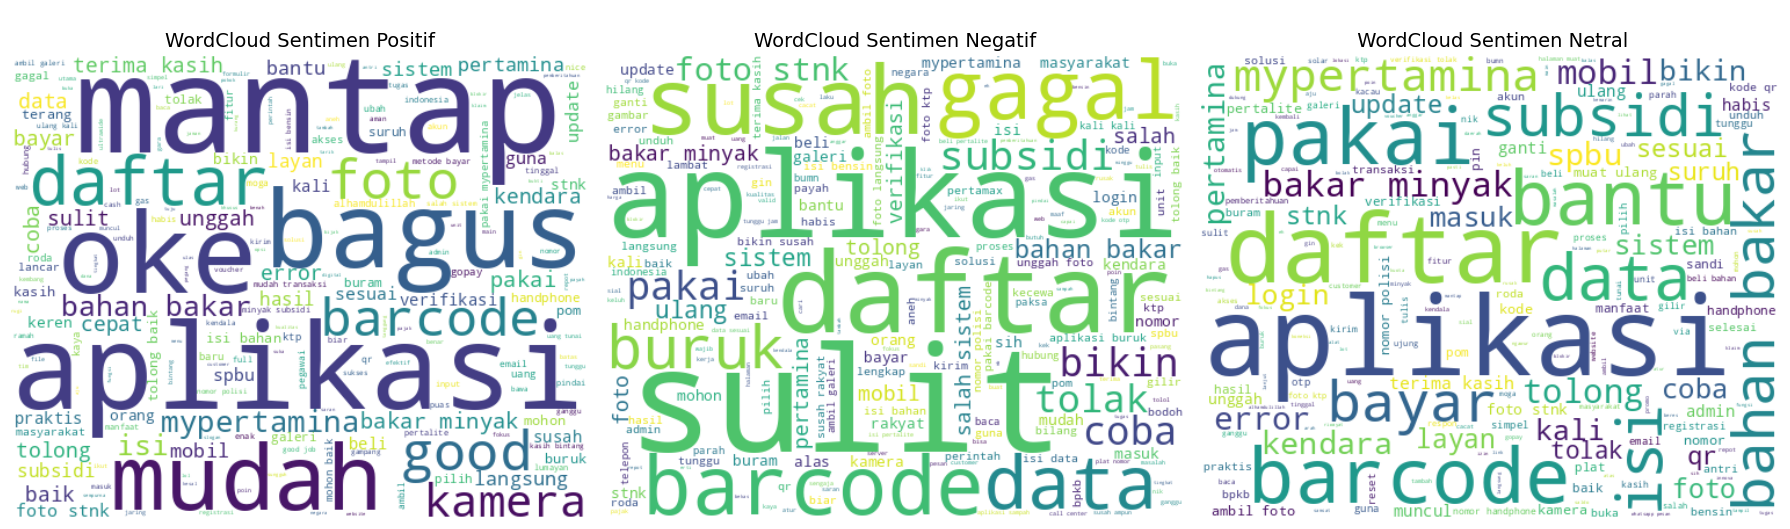

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom label dan teks tersedia
if 'label' not in df.columns or 'content' not in df.columns:
    raise ValueError("Dataset harus memiliki kolom 'label' dan 'content'")

# Pisahkan data berdasarkan sentimen
positive_text = " ".join(df[df['label'] == 1]['content'].dropna())
negative_text = " ".join(df[df['label'] == -1]['content'].dropna())
neutral_text = " ".join(df[df['label'] == 0]['content'].dropna())

# Fungsi untuk membuat wordcloud
def plot_wordcloud(text, title, ax):
    wordcloud = WordCloud(width=500, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=14)
    ax.axis("off")

# Plot WordCloud untuk masing-masing kategori
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_wordcloud(positive_text, "WordCloud Sentimen Positif", axes[0])
plot_wordcloud(negative_text, "WordCloud Sentimen Negatif", axes[1])
plot_wordcloud(neutral_text, "WordCloud Sentimen Netral", axes[2])

plt.tight_layout()
plt.show()

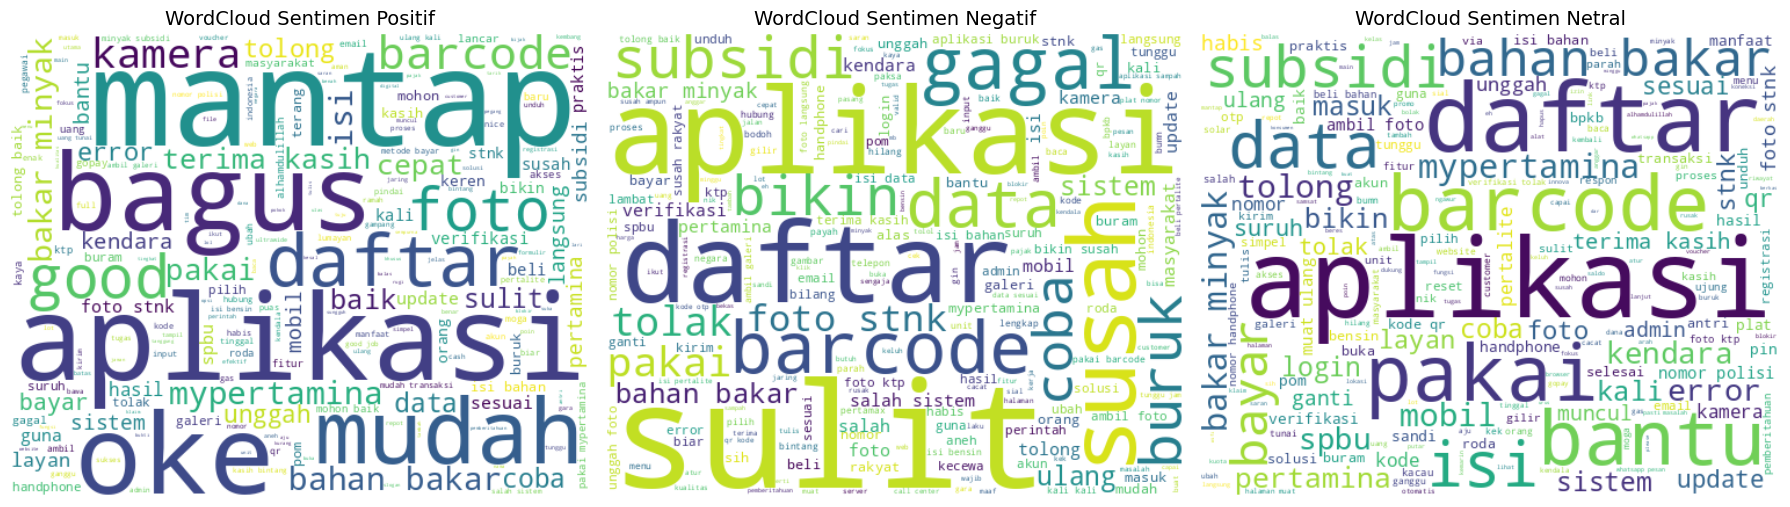

WordCloud telah disimpan sebagai file: wordcloud_positif.png, wordcloud_negatif.png, dan wordcloud_netral.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom label dan teks tersedia
if 'label' not in df.columns or 'content' not in df.columns:
    raise ValueError("Dataset harus memiliki kolom 'label' dan 'content'")

# Pisahkan data berdasarkan sentimen
positive_text = " ".join(df[df['label'] == 1]['content'].dropna())
negative_text = " ".join(df[df['label'] == -1]['content'].dropna())
neutral_text = " ".join(df[df['label'] == 0]['content'].dropna())

# Fungsi untuk membuat wordcloud dan menyimpannya
def plot_wordcloud(text, title, filename, ax):
    wordcloud = WordCloud(width=500, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=14)
    ax.axis("off")
    wordcloud.to_file(filename)  # Simpan gambar

# Plot WordCloud untuk masing-masing kategori
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_wordcloud(positive_text, "WordCloud Sentimen Positif", "wordcloud_positif.png", axes[0])
plot_wordcloud(negative_text, "WordCloud Sentimen Negatif", "wordcloud_negatif.png", axes[1])
plot_wordcloud(neutral_text, "WordCloud Sentimen Netral", "wordcloud_netral.png", axes[2])

plt.tight_layout()
plt.show()


# **Klasifikasi Naive Bayes dengan SMOTE**

In [ ]:
#import library
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom content memiliki nilai string
datafinal['content'] = datafinal['content'].fillna('').astype(str)

# Menampilkan beberapa baris pertama
datafinal.head()


content sentiment  label
0  tolong baik setting kamera kamera langsung mod...   positif      1
1                                         jelas guna   positif      1
2  aplikasi tingkat tolong baik susah indonesia t...   positif      1
3  aplikasi hapus kendara ganti kaleng tambah gan...   positif      1
4  saran depan sedia import gambar galeri stnk kt...   negatif     -1

In [ ]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi TF-IDF pada kolom content
tfidf_matrix = tfidf.fit_transform(datafinal['content'])

# Konversi hasil TF-IDF menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Menambahkan kolom label di akhir
df_tfidf['label'] = datafinal['label'].values

# Menampilkan bentuk DataFrame hasil TF-IDF
df_tfidf.head()


aamiin  abal  abdillah  abjad  abu  adakan  adaptasi  ade  adil     admin  \
0     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
1     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
2     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
3     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.139819   
4     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   

   ...  xenia   xw  yaaak  yaaallllahhh  yah  yogya  you  youtube  zaman  \
0  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
1  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
2  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
3  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
4  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   

   zholim  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 1331 columns]

In [ ]:
# Pisahkan fitur dan label
X = df_tfidf.drop(columns=['label'])  # Semua kolom kecuali label
y = df_tfidf['label']  # Label klasifikasi

# Menampilkan jumlah data
print(f"Jumlah data: {X.shape[0]} sampel, {X.shape[1]} fitur")


Jumlah data: 1447 sampel, 1330 fitur


In [ ]:
# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb = MultinomialNB(alpha=1)

# Inisialisasi list untuk menyimpan hasil
fold_NBC_SMOTE = []
fold_NBC = []
fold_data_show = []
accuracies_NBC_SMOTE = []
accuracies_NBC = []
all_predictions_NBC_SMOTE = []
all_predictions_NBC = []

# Iterasi melalui setiap fold
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    fold_data_show.append({
        "Fold": i + 1,
        "Train Data": len(train_index),
        "Test Data": len(test_index)
    })

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df_show = pd.DataFrame(fold_data_show)
print(fold_df_show, "\n")


   Fold  Train Data  Test Data
0     1        1302        145
1     2        1302        145
2     3        1302        145
3     4        1302        145
4     5        1302        145
5     6        1302        145
6     7        1302        145
7     8        1303        144
8     9        1303        144
9    10        1303        144 



Fold 1: Akurasi = 0.8207

Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.87      0.79        47
           0       0.75      0.71      0.73        38
           1       0.98      0.85      0.91        60

    accuracy                           0.82       145
   macro avg       0.82      0.81      0.81       145
weighted avg       0.84      0.82      0.82       145



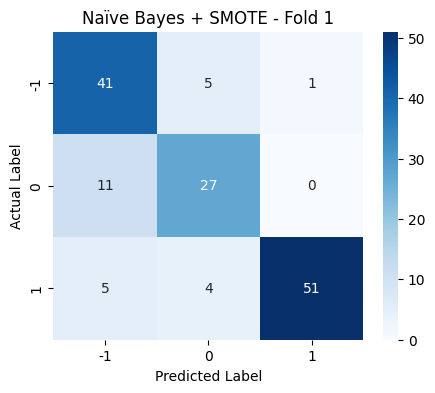

Fold 2: Akurasi = 0.6897

Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.79      0.66        47
           0       0.62      0.55      0.58        38
           1       0.91      0.70      0.79        60

    accuracy                           0.69       145
   macro avg       0.70      0.68      0.68       145
weighted avg       0.72      0.69      0.69       145



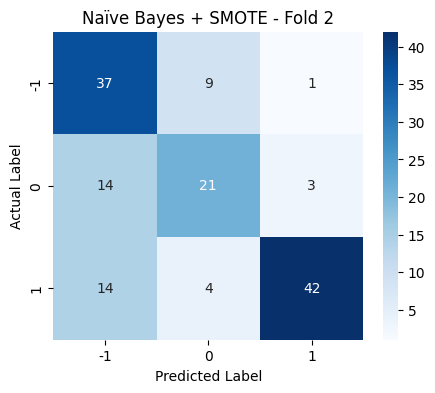

Fold 3: Akurasi = 0.7724

Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.83      0.76        47
           0       0.72      0.68      0.70        38
           1       0.89      0.78      0.83        60

    accuracy                           0.77       145
   macro avg       0.77      0.77      0.76       145
weighted avg       0.78      0.77      0.77       145



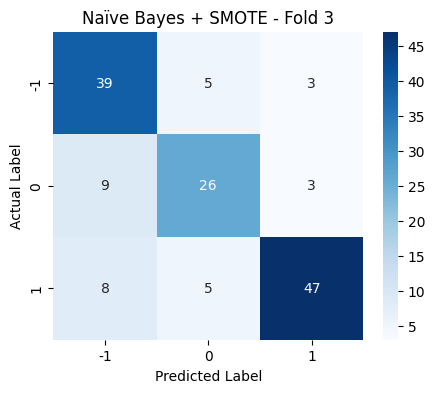

Fold 4: Akurasi = 0.7517

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.81      0.73        47
           0       0.70      0.68      0.69        38
           1       0.88      0.75      0.81        60

    accuracy                           0.75       145
   macro avg       0.75      0.75      0.74       145
weighted avg       0.77      0.75      0.75       145



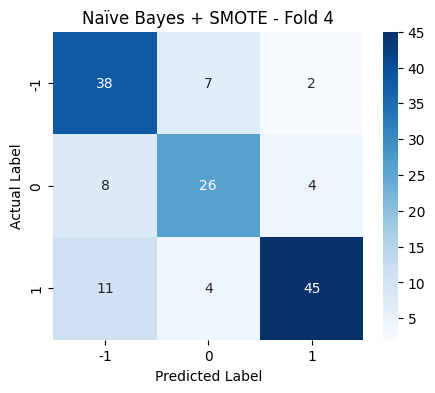

Fold 5: Akurasi = 0.7517

Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.87      0.75        47
           0       0.67      0.58      0.62        38
           1       0.92      0.77      0.84        60

    accuracy                           0.75       145
   macro avg       0.75      0.74      0.74       145
weighted avg       0.77      0.75      0.75       145



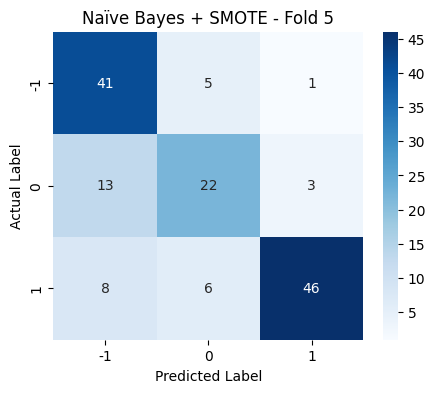

Fold 6: Akurasi = 0.7241

Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.85      0.72        47
           0       0.64      0.42      0.51        38
           1       0.88      0.82      0.84        60

    accuracy                           0.72       145
   macro avg       0.71      0.70      0.69       145
weighted avg       0.73      0.72      0.72       145



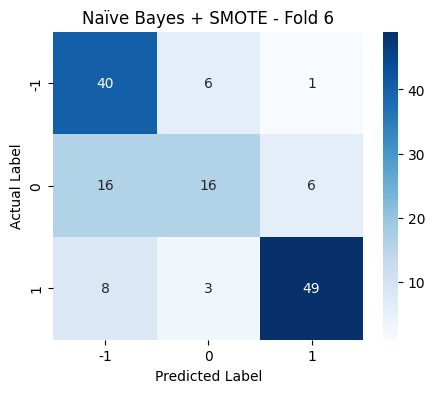

Fold 7: Akurasi = 0.7517

Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.83      0.73        47
           0       0.69      0.63      0.66        38
           1       0.92      0.77      0.84        60

    accuracy                           0.75       145
   macro avg       0.75      0.74      0.74       145
weighted avg       0.77      0.75      0.75       145



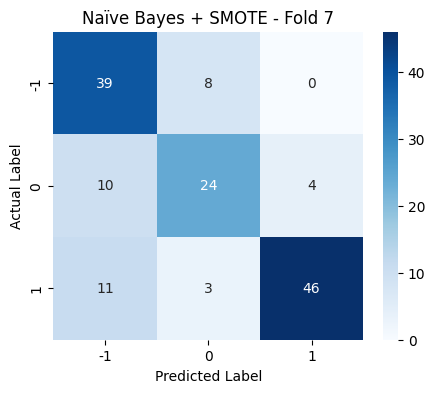

Fold 8: Akurasi = 0.7222

Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.96      0.77        46
           0       0.64      0.47      0.55        38
           1       0.88      0.70      0.78        60

    accuracy                           0.72       144
   macro avg       0.72      0.71      0.70       144
weighted avg       0.74      0.72      0.71       144



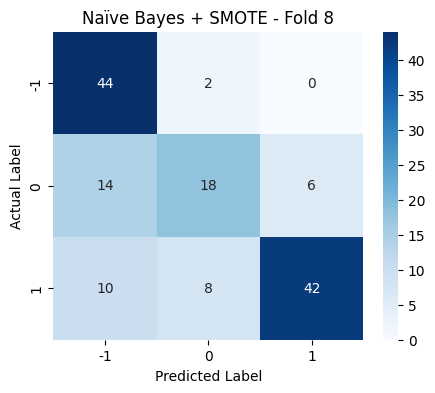

Fold 9: Akurasi = 0.7014

Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.83      0.72        46
           0       0.56      0.50      0.53        38
           1       0.86      0.73      0.79        60

    accuracy                           0.70       144
   macro avg       0.69      0.69      0.68       144
weighted avg       0.71      0.70      0.70       144



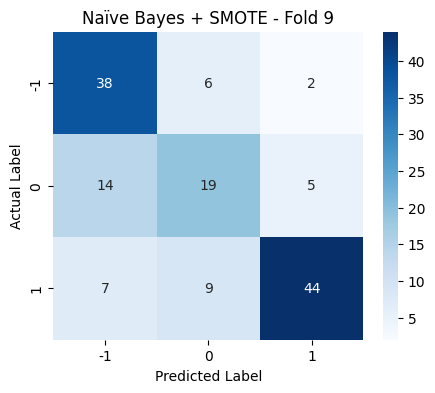

Fold 10: Akurasi = 0.7222

Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.85      0.72        46
           0       0.66      0.55      0.60        38
           1       0.88      0.73      0.80        60

    accuracy                           0.72       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.74      0.72      0.72       144



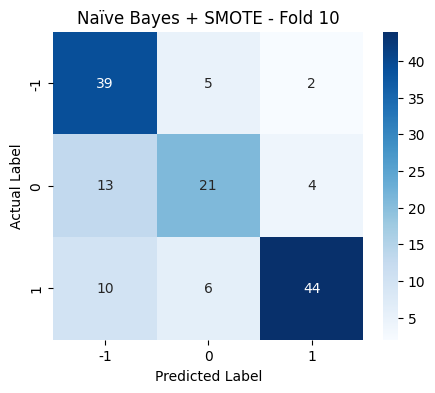

In [ ]:
# Inisialisasi list untuk menyimpan confusion matrix
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_texts = datafinal['content'].iloc[test_idx].values  # Ambil teks yang diprediksi

    # Terapkan SMOTE untuk menangani ketidakseimbangan data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Latih model
    nb.fit(X_train_resampled, y_train_resampled)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Simpan hasil prediksi
    fold_predictions = pd.DataFrame({
        "Fold": fold,
        "Text": test_texts,
        "Actual Label": y_test.values,
        "Predicted Label": y_pred
    })
    all_predictions_NBC_SMOTE.append(fold_predictions)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies_NBC_SMOTE.append(acc)

    # Simpan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

    fold_NBC_SMOTE.append({
        "Fold": fold,
        "Train Data": len(train_idx),
        "Test Data": len(test_idx),
        "Accuracy": acc
    })
    print(f"Fold {fold}: Akurasi = {acc:.4f}")

    # Tampilkan confusion matrix untuk setiap fold
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Naïve Bayes + SMOTE - Fold {fold}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    plt.show()


In [ ]:
# Buat list untuk menyimpan informasi per fold
fold_data_show = []

# Iterasi melalui setiap fold menggunakan StratifiedKFold
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Ambil data training dan test sesuai index
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train = y.iloc[train_index]

    # Hitung distribusi data sebelum SMOTE (pada training data)
    dist_before = y_train.value_counts().to_dict()

    # Terapkan SMOTE hanya pada data training
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Hitung distribusi data setelah SMOTE
    dist_after = y_train_resampled.value_counts().to_dict()

    # Simpan informasi fold ke dalam list
    fold_data_show.append({
        "Fold": i + 1,
        "Train Data (Before SMOTE)": len(train_index),
        "Train Data (After SMOTE)": len(y_train_resampled),
        "Test Data": len(test_index),
        "Distribution Before": dist_before,
        "Distribution After": dist_after
    })

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df_show = pd.DataFrame(fold_data_show)
print(fold_df_show, "\n")


   Fold  Train Data (Before SMOTE)  Train Data (After SMOTE)  Test Data  \
0     1                       1302                      1620        145   
1     2                       1302                      1620        145   
2     3                       1302                      1620        145   
3     4                       1302                      1620        145   
4     5                       1302                      1620        145   
5     6                       1302                      1620        145   
6     7                       1302                      1620        145   
7     8                       1303                      1620        144   
8     9                       1303                      1620        144   
9    10                       1303                      1620        144   

         Distribution Before         Distribution After  
0  {1: 540, -1: 420, 0: 342}  {1: 540, -1: 540, 0: 540}  
1  {1: 540, -1: 420, 0: 342}  {1: 540, -1: 540, 0: 540}  


   Fold  Train Data  Test Data  Accuracy
0     1        1302        145  0.820690
1     2        1302        145  0.689655
2     3        1302        145  0.772414
3     4        1302        145  0.751724
4     5        1302        145  0.751724
5     6        1302        145  0.724138
6     7        1302        145  0.751724
7     8        1303        144  0.722222
8     9        1303        144  0.701389
9    10        1303        144  0.722222 


Rata-rata Akurasi: 0.7408


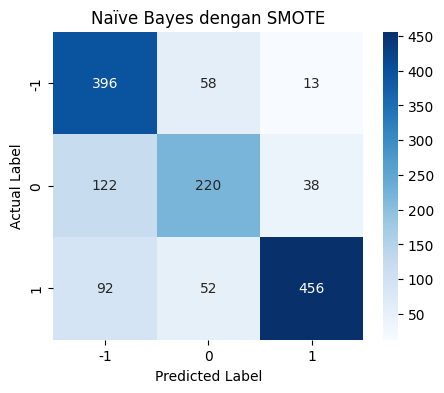


Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.85      0.74       467
           0       0.67      0.58      0.62       380
           1       0.90      0.76      0.82       600

    accuracy                           0.74      1447
   macro avg       0.74      0.73      0.73      1447
weighted avg       0.76      0.74      0.74      1447



In [ ]:
# Gabungkan semua hasil prediksi
predictions_df = pd.concat(all_predictions_NBC_SMOTE, ignore_index=True)

# Simpan hasil prediksi ke CSV
predictions_df.to_csv("hasil_prediksi_NBC_SMOTE.csv", mode= 'w', index=False)

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df_smote = pd.DataFrame(fold_NBC_SMOTE)
print(fold_df_smote, "\n")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies_NBC_SMOTE)/len(accuracies_NBC_SMOTE):.4f}")

# Gabungkan semua actual dan predicted untuk keseluruhan classification report
y_actual_all = predictions_df["Actual Label"]
y_predicted_all = predictions_df["Predicted Label"]
cm_all_SMOTE = confusion_matrix(y_actual_all, y_predicted_all)
# Tampilkan classification report
plt.figure(figsize=(5, 4))
sns.heatmap(cm_all_SMOTE, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Naïve Bayes dengan SMOTE")
plt.show()
print("\nClassification Report:")
print(classification_report(y_actual_all, y_predicted_all))


# **Klasifikasi Naive Bayes tanpa SMOTE**

Fold 1: Akurasi = 0.7931

Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.96      0.80        47
           0       0.88      0.37      0.52        38
           1       0.89      0.93      0.91        60

    accuracy                           0.79       145
   macro avg       0.82      0.75      0.74       145
weighted avg       0.82      0.79      0.77       145



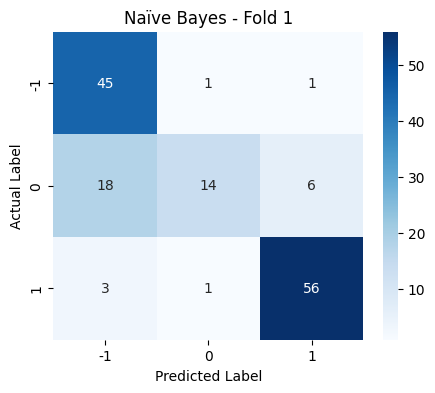

Fold 2: Akurasi = 0.6828

Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.83      0.70        47
           0       0.68      0.34      0.46        38
           1       0.77      0.78      0.78        60

    accuracy                           0.68       145
   macro avg       0.68      0.65      0.64       145
weighted avg       0.69      0.68      0.67       145



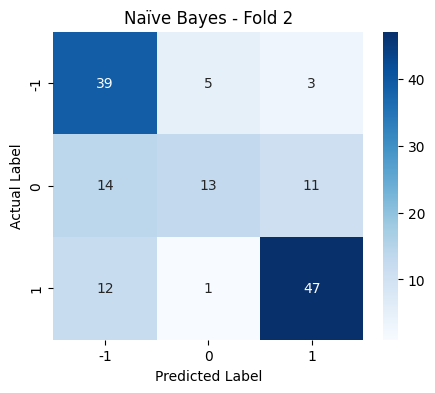

Fold 3: Akurasi = 0.7448

Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.87      0.79        47
           0       0.76      0.42      0.54        38
           1       0.76      0.85      0.80        60

    accuracy                           0.74       145
   macro avg       0.75      0.71      0.71       145
weighted avg       0.75      0.74      0.73       145



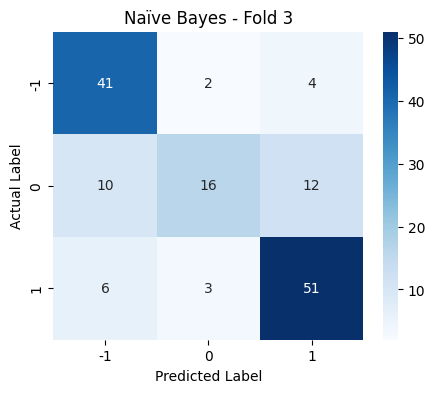

Fold 4: Akurasi = 0.7034

Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.85      0.75        47
           0       0.74      0.37      0.49        38
           1       0.73      0.80      0.76        60

    accuracy                           0.70       145
   macro avg       0.71      0.67      0.67       145
weighted avg       0.71      0.70      0.69       145



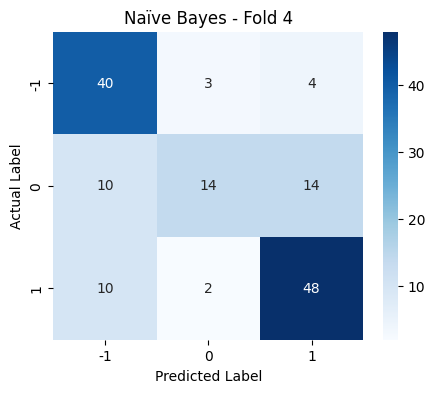

Fold 5: Akurasi = 0.7241

Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.89      0.73        47
           0       0.78      0.37      0.50        38
           1       0.83      0.82      0.82        60

    accuracy                           0.72       145
   macro avg       0.74      0.69      0.68       145
weighted avg       0.75      0.72      0.71       145



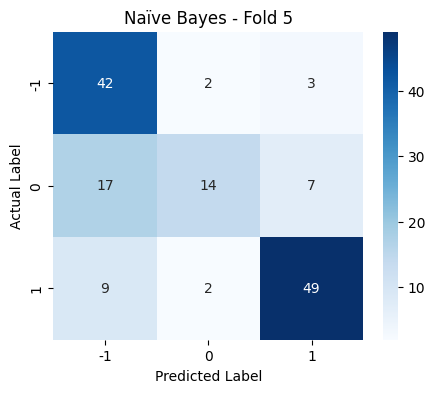

Fold 6: Akurasi = 0.7241

Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.94      0.77        47
           0       0.73      0.29      0.42        38
           1       0.79      0.83      0.81        60

    accuracy                           0.72       145
   macro avg       0.73      0.69      0.67       145
weighted avg       0.73      0.72      0.70       145



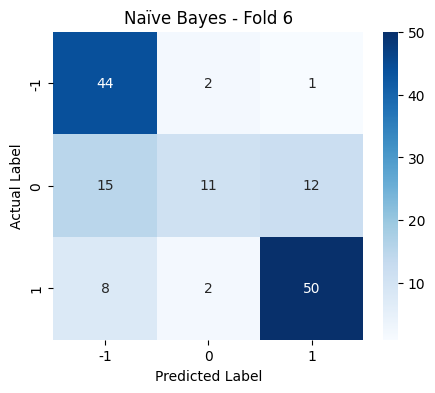

Fold 7: Akurasi = 0.7586

Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.94      0.79        47
           0       0.81      0.45      0.58        38
           1       0.83      0.82      0.82        60

    accuracy                           0.76       145
   macro avg       0.77      0.73      0.73       145
weighted avg       0.78      0.76      0.75       145



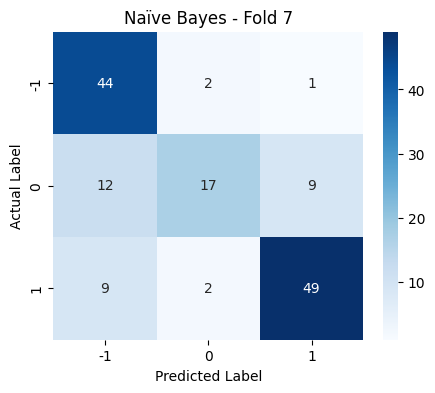

Fold 8: Akurasi = 0.7014

Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.98      0.74        46
           0       0.73      0.21      0.33        38
           1       0.83      0.80      0.81        60

    accuracy                           0.70       144
   macro avg       0.72      0.66      0.63       144
weighted avg       0.73      0.70      0.66       144



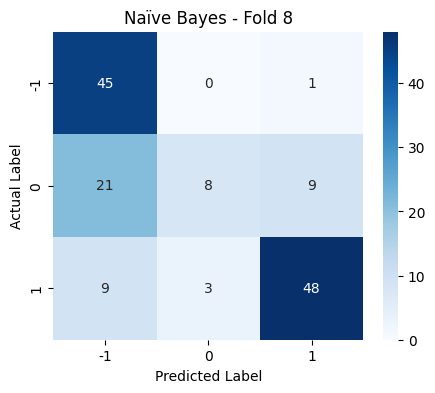

Fold 9: Akurasi = 0.6736

Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.87      0.72        46
           0       0.55      0.29      0.38        38
           1       0.78      0.77      0.77        60

    accuracy                           0.67       144
   macro avg       0.65      0.64      0.62       144
weighted avg       0.67      0.67      0.65       144



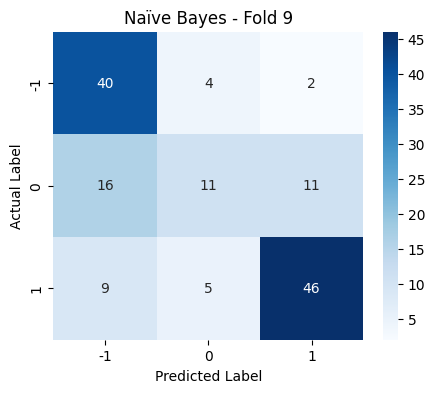

Fold 10: Akurasi = 0.7014

Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.87      0.71        46
           0       0.76      0.34      0.47        38
           1       0.79      0.80      0.79        60

    accuracy                           0.70       144
   macro avg       0.72      0.67      0.66       144
weighted avg       0.72      0.70      0.68       144



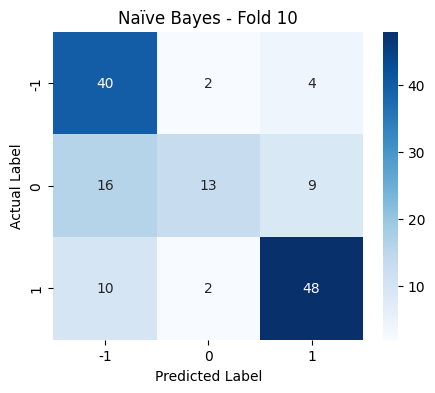

In [ ]:
# Inisialisasi list untuk menyimpan confusion matrix
conf_matrices = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    test_texts = datafinal['content'].iloc[test_idx].values  # Ambil teks yang diprediksi

    # Latih model
    nb.fit(X_train, y_train)

    # Prediksi pada data uji
    y_pred = nb.predict(X_test)

    # Simpan hasil prediksi
    fold_predictions = pd.DataFrame({
        "Fold": fold,
        "Text": test_texts,
        "Actual Label": y_test.values,
        "Predicted Label": y_pred
    })
    all_predictions_NBC.append(fold_predictions)

    # Menghitung akurasi
    acc = accuracy_score(y_test, y_pred)
    accuracies_NBC.append(acc)

    # Simpan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices.append(cm)

    fold_NBC.append({
        "Fold": fold,
        "Train Data": len(train_idx),
        "Test Data": len(test_idx),
        "Accuracy": acc
    })
    print(f"Fold {fold}: Akurasi = {acc:.4f}")

    # Tampilkan confusion matrix untuk setiap fold
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Naïve Bayes - Fold {fold}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    plt.show()


   Fold  Train Data  Test Data  Accuracy
0     1        1302        145  0.793103
1     2        1302        145  0.682759
2     3        1302        145  0.744828
3     4        1302        145  0.703448
4     5        1302        145  0.724138
5     6        1302        145  0.724138
6     7        1302        145  0.758621
7     8        1303        144  0.701389
8     9        1303        144  0.673611
9    10        1303        144  0.701389 


Rata-rata Akurasi: 0.7207


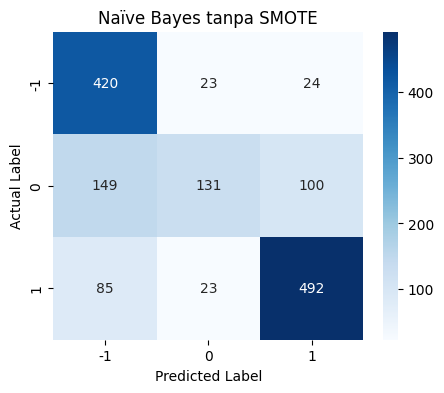


Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.90      0.75       467
           0       0.74      0.34      0.47       380
           1       0.80      0.82      0.81       600

    accuracy                           0.72      1447
   macro avg       0.73      0.69      0.68      1447
weighted avg       0.73      0.72      0.70      1447



In [ ]:
# Gabungkan semua hasil prediksi
predictions_df = pd.concat(all_predictions_NBC, ignore_index=True)

# Simpan hasil prediksi ke CSV
predictions_df.to_csv("hasil_prediksi_NBC.csv", index=False)

# Buat DataFrame untuk menampilkan dalam bentuk tabel
fold_df = pd.DataFrame(fold_NBC)
print(fold_df, "\n")

# Menampilkan rata-rata akurasi
print(f"\nRata-rata Akurasi: {sum(accuracies_NBC)/len(accuracies_NBC):.4f}")

# Gabungkan semua actual dan predicted untuk keseluruhan classification report
y_actual_all = predictions_df["Actual Label"]
y_predicted_all = predictions_df["Predicted Label"]
cm_all = confusion_matrix(y_actual_all, y_predicted_all)
# Tampilkan classification report
plt.figure(figsize=(5, 4))
sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Naïve Bayes tanpa SMOTE")
plt.show()
print("\nClassification Report:")
print(classification_report(y_actual_all, y_predicted_all))


# **Klasifikasi K-Nearest Neighbor dengan SMOTE**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Membaca DataFrame dari CSV
datafinal = pd.read_csv("myPertamina_transformasi.csv")

# Pastikan kolom content memiliki nilai string
datafinal['content'] = datafinal['content'].fillna('').astype(str)

# Menampilkan beberapa baris pertama
datafinal.head()


content sentiment  label
0  tolong baik setting kamera kamera langsung mod...   positif      1
1                                         jelas guna   positif      1
2  aplikasi tingkat tolong baik susah indonesia t...   positif      1
3  aplikasi hapus kendara ganti kaleng tambah gan...   positif      1
4  saran depan sedia import gambar galeri stnk kt...   negatif     -1

In [ ]:
# Inisialisasi TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformasi TF-IDF pada kolom content
tfidf_matrix = tfidf.fit_transform(datafinal['content'])

# Konversi hasil TF-IDF menjadi DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Menambahkan kolom label di akhir
df_tfidf['label'] = datafinal['label'].values

# Menampilkan bentuk DataFrame hasil TF-IDF
df_tfidf.head()


aamiin  abal  abdillah  abjad  abu  adakan  adaptasi  ade  adil     admin  \
0     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
1     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
2     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   
3     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.139819   
4     0.0   0.0       0.0    0.0  0.0     0.0       0.0  0.0   0.0  0.000000   

   ...  xenia   xw  yaaak  yaaallllahhh  yah  yogya  you  youtube  zaman  \
0  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
1  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
2  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
3  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   
4  ...    0.0  0.0    0.0           0.0  0.0    0.0  0.0      0.0    0.0   

   zholim  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  

[5 rows x 1331 columns]

In [ ]:
# Pisahkan fitur dan label
X = df_tfidf.drop(columns=['label'])  # Semua kolom kecuali label
y = df_tfidf['label']  # Label klasifikasi

# Menampilkan jumlah data
print(f"Jumlah data: {X.shape[0]} sampel, {X.shape[1]} fitur")


Jumlah data: 1447 sampel, 1330 fitur


In [ ]:
# Inisialisasi K-Fold Cross Validation (K=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Daftar nilai K yang akan diuji
k_values = [3, 5, 7, 9, 11]

# Dictionary untuk menyimpan hasil akurasi dari masing-masing K
k_results = {}




🔍 Evaluasi untuk K = 3
Fold 1: Akurasi = 0.7103


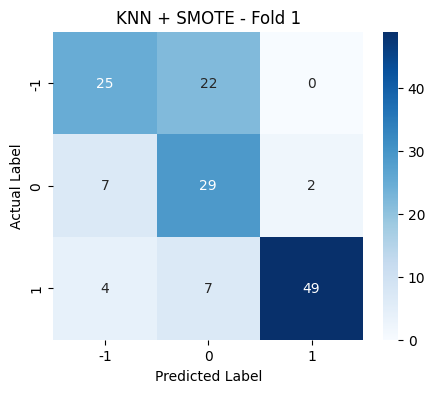


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.53      0.60        47
           0       0.50      0.76      0.60        38
           1       0.96      0.82      0.88        60

    accuracy                           0.71       145
   macro avg       0.72      0.70      0.70       145
weighted avg       0.75      0.71      0.72       145

Fold 2: Akurasi = 0.6276


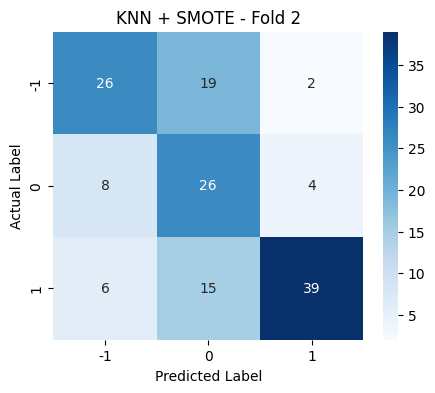


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.55      0.60        47
           0       0.43      0.68      0.53        38
           1       0.87      0.65      0.74        60

    accuracy                           0.63       145
   macro avg       0.65      0.63      0.62       145
weighted avg       0.68      0.63      0.64       145

Fold 3: Akurasi = 0.6897


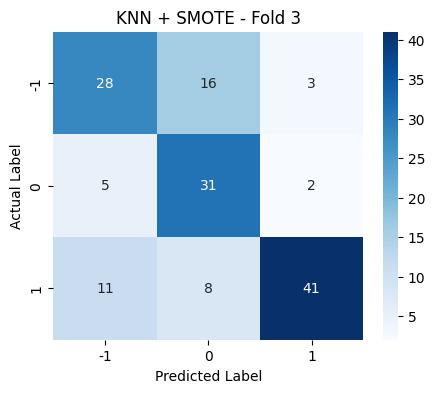


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.60      0.62        47
           0       0.56      0.82      0.67        38
           1       0.89      0.68      0.77        60

    accuracy                           0.69       145
   macro avg       0.70      0.70      0.69       145
weighted avg       0.72      0.69      0.69       145

Fold 4: Akurasi = 0.6414


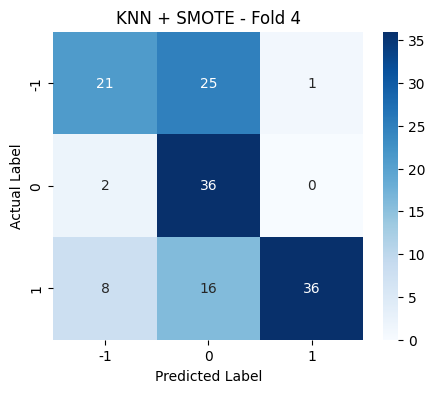


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.45      0.54        47
           0       0.47      0.95      0.63        38
           1       0.97      0.60      0.74        60

    accuracy                           0.64       145
   macro avg       0.71      0.66      0.64       145
weighted avg       0.74      0.64      0.65       145

Fold 5: Akurasi = 0.6345


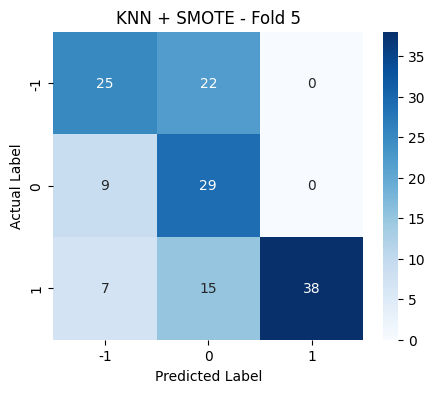


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.53      0.57        47
           0       0.44      0.76      0.56        38
           1       1.00      0.63      0.78        60

    accuracy                           0.63       145
   macro avg       0.68      0.64      0.63       145
weighted avg       0.73      0.63      0.65       145

Fold 6: Akurasi = 0.6897


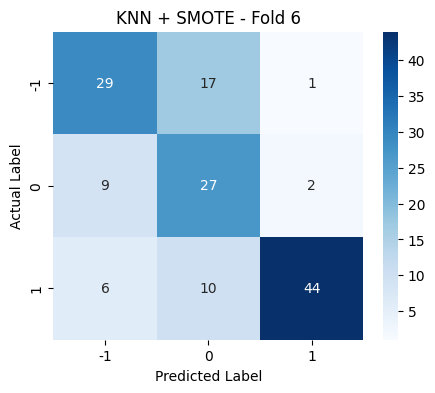


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.62      0.64        47
           0       0.50      0.71      0.59        38
           1       0.94      0.73      0.82        60

    accuracy                           0.69       145
   macro avg       0.70      0.69      0.68       145
weighted avg       0.73      0.69      0.70       145

Fold 7: Akurasi = 0.6621


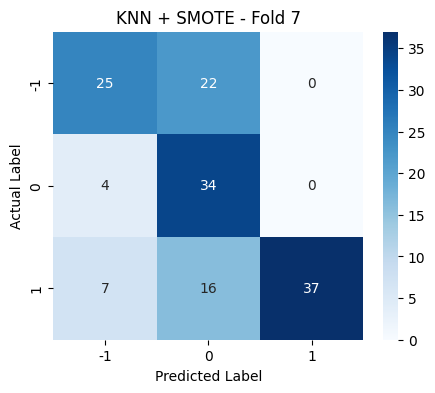


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.53      0.60        47
           0       0.47      0.89      0.62        38
           1       1.00      0.62      0.76        60

    accuracy                           0.66       145
   macro avg       0.72      0.68      0.66       145
weighted avg       0.76      0.66      0.67       145

Fold 8: Akurasi = 0.6389


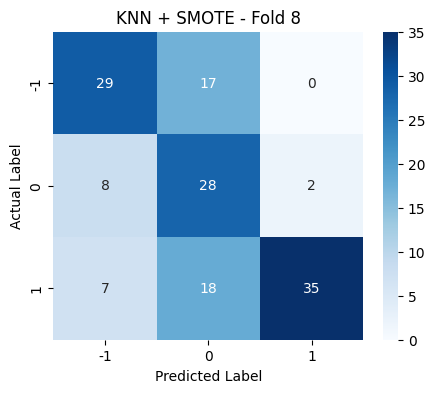


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.63      0.64        46
           0       0.44      0.74      0.55        38
           1       0.95      0.58      0.72        60

    accuracy                           0.64       144
   macro avg       0.68      0.65      0.64       144
weighted avg       0.72      0.64      0.65       144

Fold 9: Akurasi = 0.6319


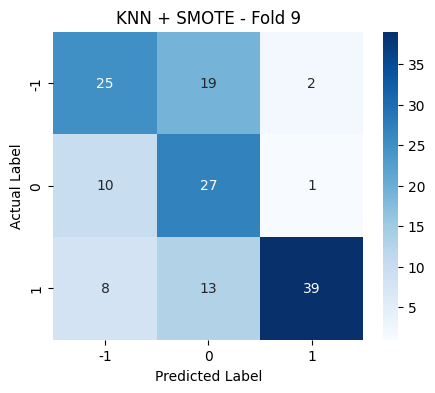


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.54      0.56        46
           0       0.46      0.71      0.56        38
           1       0.93      0.65      0.76        60

    accuracy                           0.63       144
   macro avg       0.66      0.63      0.63       144
weighted avg       0.69      0.63      0.64       144

Fold 10: Akurasi = 0.6319


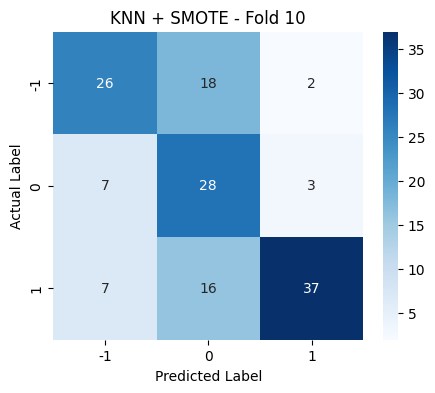


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.57      0.60        46
           0       0.45      0.74      0.56        38
           1       0.88      0.62      0.73        60

    accuracy                           0.63       144
   macro avg       0.66      0.64      0.63       144
weighted avg       0.69      0.63      0.64       144


📊 Rata-rata Akurasi untuk K=3: 0.6558



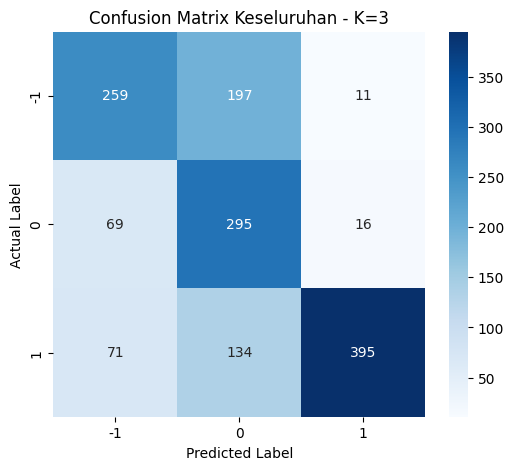


📊 Classification Report Keseluruhan untuk K=3:
              precision    recall  f1-score   support

          -1       0.65      0.55      0.60       467
           0       0.47      0.78      0.59       380
           1       0.94      0.66      0.77       600

    accuracy                           0.66      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.72      0.66      0.67      1447


🔍 Evaluasi untuk K = 5
Fold 1: Akurasi = 0.6966


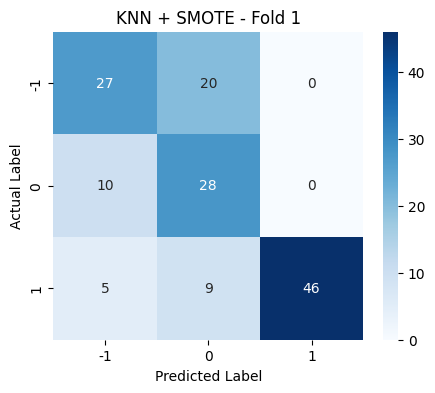


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.57      0.61        47
           0       0.49      0.74      0.59        38
           1       1.00      0.77      0.87        60

    accuracy                           0.70       145
   macro avg       0.71      0.69      0.69       145
weighted avg       0.75      0.70      0.71       145

Fold 2: Akurasi = 0.6207


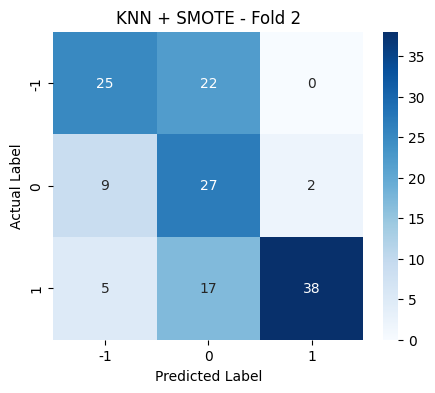


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.53      0.58        47
           0       0.41      0.71      0.52        38
           1       0.95      0.63      0.76        60

    accuracy                           0.62       145
   macro avg       0.67      0.63      0.62       145
weighted avg       0.71      0.62      0.64       145

Fold 3: Akurasi = 0.7172


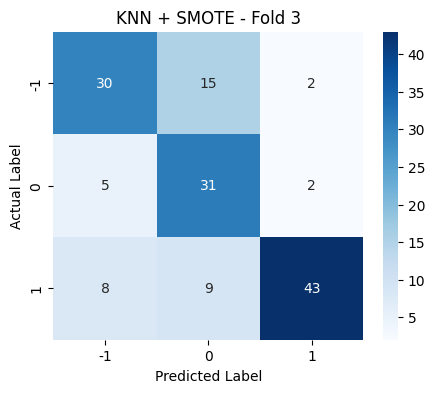


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.64      0.67        47
           0       0.56      0.82      0.67        38
           1       0.91      0.72      0.80        60

    accuracy                           0.72       145
   macro avg       0.73      0.72      0.71       145
weighted avg       0.75      0.72      0.72       145

Fold 4: Akurasi = 0.6759


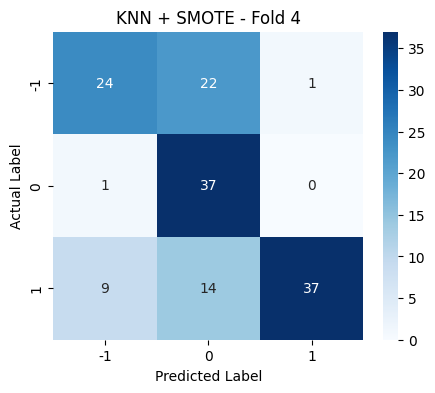


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.51      0.59        47
           0       0.51      0.97      0.67        38
           1       0.97      0.62      0.76        60

    accuracy                           0.68       145
   macro avg       0.73      0.70      0.67       145
weighted avg       0.76      0.68      0.68       145

Fold 5: Akurasi = 0.6000


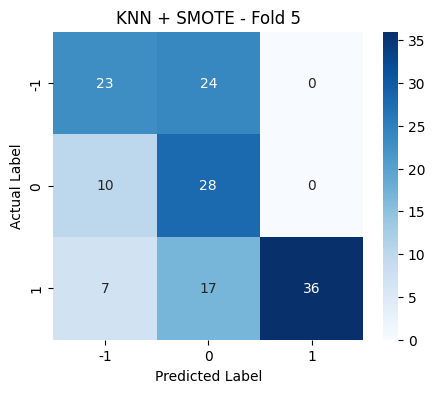


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.49      0.53        47
           0       0.41      0.74      0.52        38
           1       1.00      0.60      0.75        60

    accuracy                           0.60       145
   macro avg       0.66      0.61      0.60       145
weighted avg       0.71      0.60      0.62       145

Fold 6: Akurasi = 0.6828


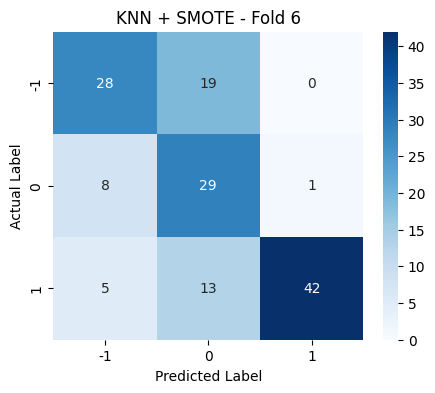


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.60      0.64        47
           0       0.48      0.76      0.59        38
           1       0.98      0.70      0.82        60

    accuracy                           0.68       145
   macro avg       0.71      0.69      0.68       145
weighted avg       0.75      0.68      0.70       145

Fold 7: Akurasi = 0.6207


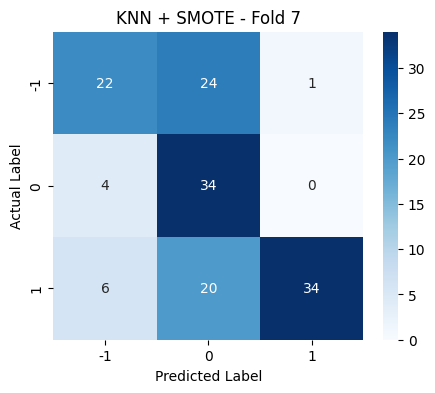


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.47      0.56        47
           0       0.44      0.89      0.59        38
           1       0.97      0.57      0.72        60

    accuracy                           0.62       145
   macro avg       0.70      0.64      0.62       145
weighted avg       0.74      0.62      0.63       145

Fold 8: Akurasi = 0.6250


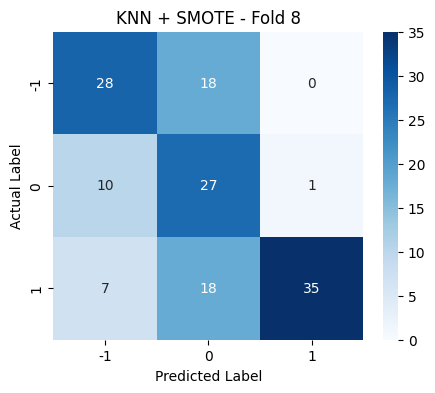


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.61      0.62        46
           0       0.43      0.71      0.53        38
           1       0.97      0.58      0.73        60

    accuracy                           0.62       144
   macro avg       0.67      0.63      0.63       144
weighted avg       0.72      0.62      0.64       144

Fold 9: Akurasi = 0.6389


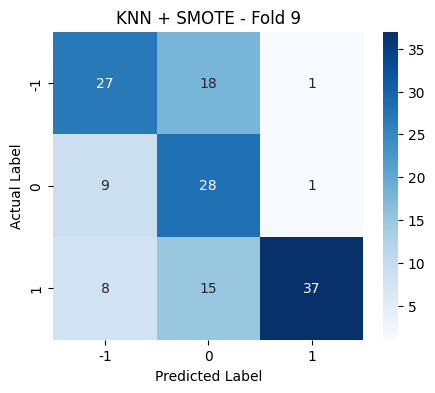


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.59      0.60        46
           0       0.46      0.74      0.57        38
           1       0.95      0.62      0.75        60

    accuracy                           0.64       144
   macro avg       0.67      0.65      0.64       144
weighted avg       0.71      0.64      0.65       144

Fold 10: Akurasi = 0.6389


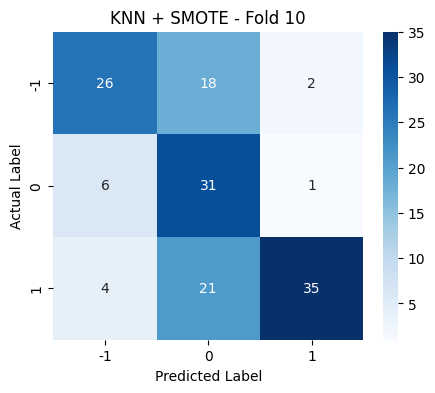


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.57      0.63        46
           0       0.44      0.82      0.57        38
           1       0.92      0.58      0.71        60

    accuracy                           0.64       144
   macro avg       0.70      0.65      0.64       144
weighted avg       0.73      0.64      0.65       144


📊 Rata-rata Akurasi untuk K=5: 0.6517



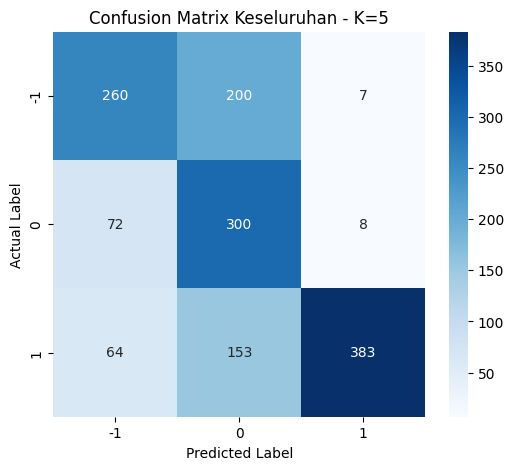


📊 Classification Report Keseluruhan untuk K=5:
              precision    recall  f1-score   support

          -1       0.66      0.56      0.60       467
           0       0.46      0.79      0.58       380
           1       0.96      0.64      0.77       600

    accuracy                           0.65      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.73      0.65      0.67      1447


🔍 Evaluasi untuk K = 7
Fold 1: Akurasi = 0.6966


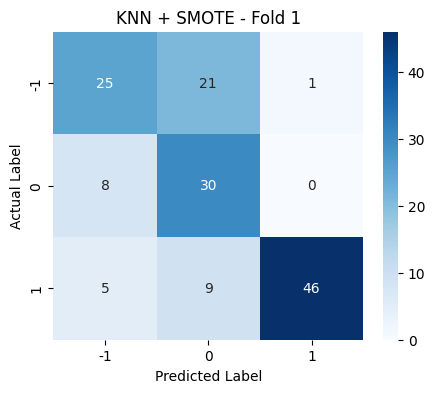


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.53      0.59        47
           0       0.50      0.79      0.61        38
           1       0.98      0.77      0.86        60

    accuracy                           0.70       145
   macro avg       0.71      0.70      0.69       145
weighted avg       0.75      0.70      0.71       145

Fold 2: Akurasi = 0.6276


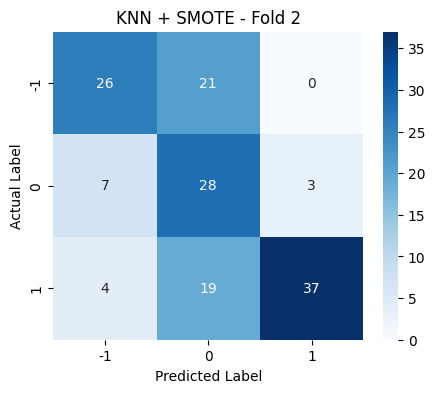


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.55      0.62        47
           0       0.41      0.74      0.53        38
           1       0.93      0.62      0.74        60

    accuracy                           0.63       145
   macro avg       0.68      0.64      0.63       145
weighted avg       0.72      0.63      0.65       145

Fold 3: Akurasi = 0.7034


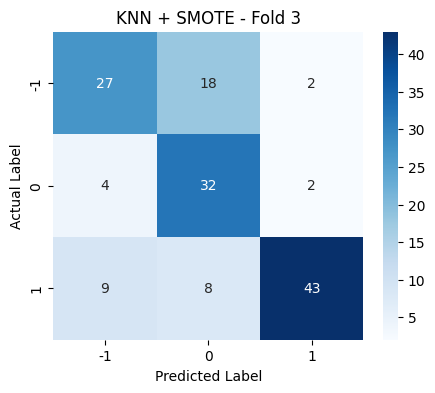


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.57      0.62        47
           0       0.55      0.84      0.67        38
           1       0.91      0.72      0.80        60

    accuracy                           0.70       145
   macro avg       0.71      0.71      0.70       145
weighted avg       0.74      0.70      0.71       145

Fold 4: Akurasi = 0.6621


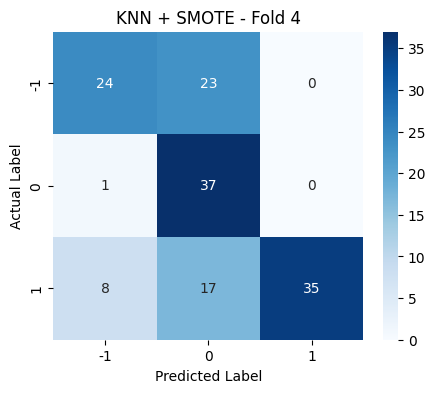


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.51      0.60        47
           0       0.48      0.97      0.64        38
           1       1.00      0.58      0.74        60

    accuracy                           0.66       145
   macro avg       0.74      0.69      0.66       145
weighted avg       0.78      0.66      0.67       145

Fold 5: Akurasi = 0.6207


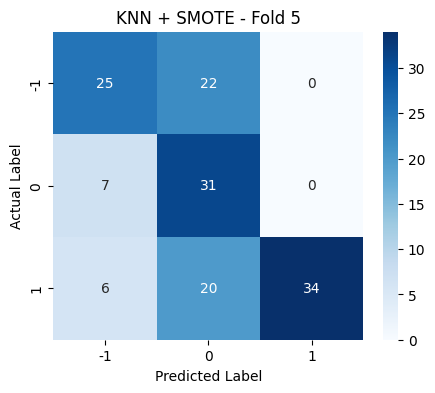


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.53      0.59        47
           0       0.42      0.82      0.56        38
           1       1.00      0.57      0.72        60

    accuracy                           0.62       145
   macro avg       0.69      0.64      0.62       145
weighted avg       0.74      0.62      0.64       145

Fold 6: Akurasi = 0.6828


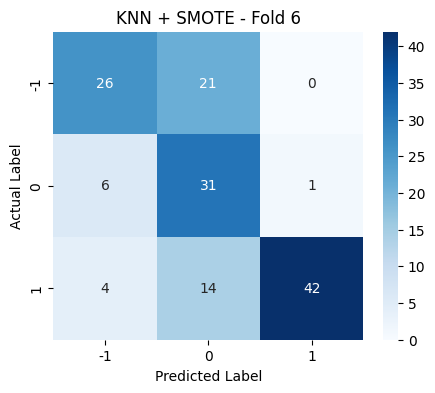


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.55      0.63        47
           0       0.47      0.82      0.60        38
           1       0.98      0.70      0.82        60

    accuracy                           0.68       145
   macro avg       0.72      0.69      0.68       145
weighted avg       0.76      0.68      0.70       145

Fold 7: Akurasi = 0.6483


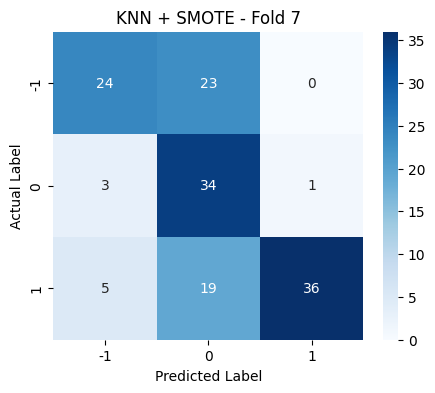


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.75      0.51      0.61        47
           0       0.45      0.89      0.60        38
           1       0.97      0.60      0.74        60

    accuracy                           0.65       145
   macro avg       0.72      0.67      0.65       145
weighted avg       0.76      0.65      0.66       145

Fold 8: Akurasi = 0.6528


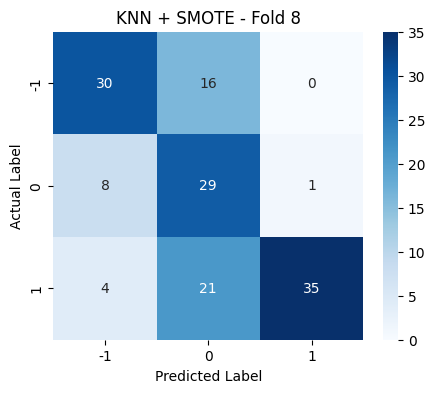


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.65      0.68        46
           0       0.44      0.76      0.56        38
           1       0.97      0.58      0.73        60

    accuracy                           0.65       144
   macro avg       0.71      0.67      0.66       144
weighted avg       0.75      0.65      0.67       144

Fold 9: Akurasi = 0.6528


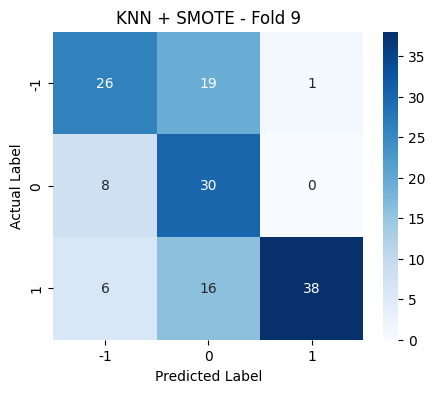


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.57      0.60        46
           0       0.46      0.79      0.58        38
           1       0.97      0.63      0.77        60

    accuracy                           0.65       144
   macro avg       0.70      0.66      0.65       144
weighted avg       0.74      0.65      0.67       144

Fold 10: Akurasi = 0.6597


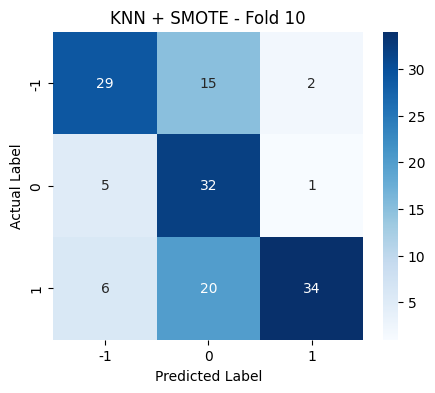


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.63      0.67        46
           0       0.48      0.84      0.61        38
           1       0.92      0.57      0.70        60

    accuracy                           0.66       144
   macro avg       0.71      0.68      0.66       144
weighted avg       0.74      0.66      0.67       144


📊 Rata-rata Akurasi untuk K=7: 0.6607



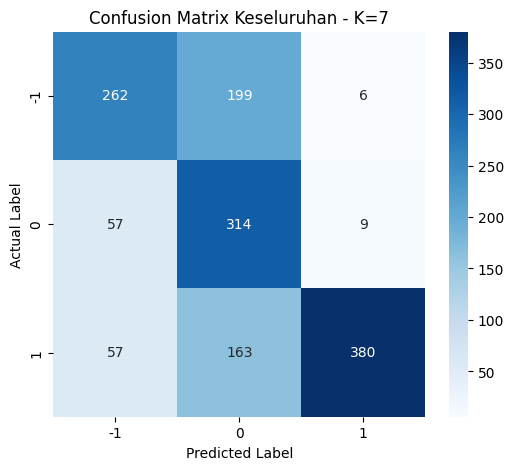


📊 Classification Report Keseluruhan untuk K=7:
              precision    recall  f1-score   support

          -1       0.70      0.56      0.62       467
           0       0.46      0.83      0.59       380
           1       0.96      0.63      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447


🔍 Evaluasi untuk K = 9
Fold 1: Akurasi = 0.6897


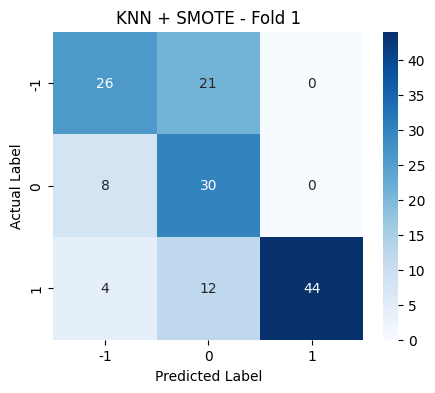


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.55      0.61        47
           0       0.48      0.79      0.59        38
           1       1.00      0.73      0.85        60

    accuracy                           0.69       145
   macro avg       0.72      0.69      0.68       145
weighted avg       0.76      0.69      0.70       145

Fold 2: Akurasi = 0.6138


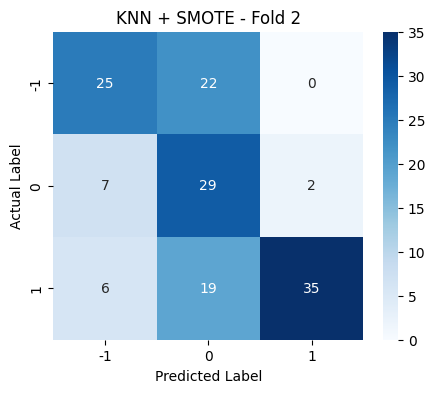


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.53      0.59        47
           0       0.41      0.76      0.54        38
           1       0.95      0.58      0.72        60

    accuracy                           0.61       145
   macro avg       0.67      0.63      0.62       145
weighted avg       0.71      0.61      0.63       145

Fold 3: Akurasi = 0.6966


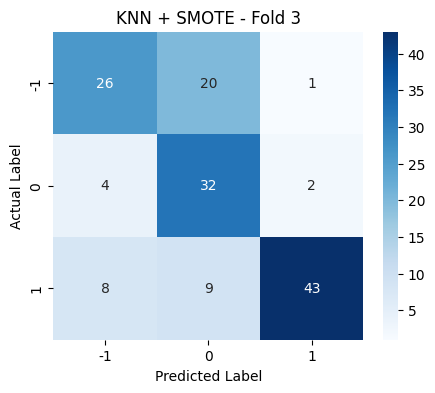


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.55      0.61        47
           0       0.52      0.84      0.65        38
           1       0.93      0.72      0.81        60

    accuracy                           0.70       145
   macro avg       0.71      0.70      0.69       145
weighted avg       0.75      0.70      0.70       145

Fold 4: Akurasi = 0.6414


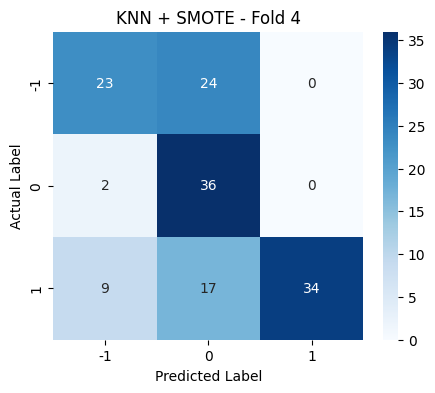


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.49      0.57        47
           0       0.47      0.95      0.63        38
           1       1.00      0.57      0.72        60

    accuracy                           0.64       145
   macro avg       0.71      0.67      0.64       145
weighted avg       0.76      0.64      0.65       145

Fold 5: Akurasi = 0.6069


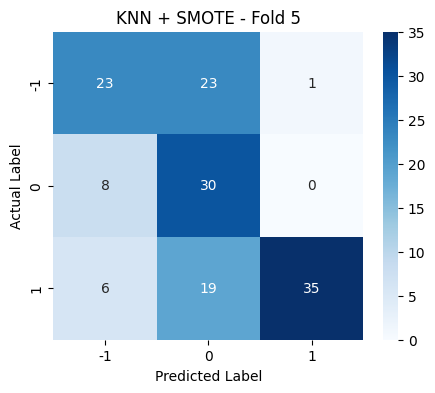


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.49      0.55        47
           0       0.42      0.79      0.55        38
           1       0.97      0.58      0.73        60

    accuracy                           0.61       145
   macro avg       0.67      0.62      0.61       145
weighted avg       0.71      0.61      0.62       145

Fold 6: Akurasi = 0.6966


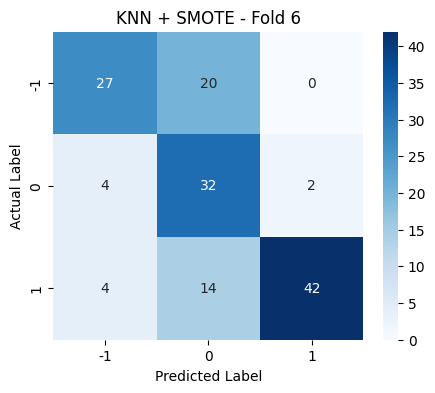


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.77      0.57      0.66        47
           0       0.48      0.84      0.62        38
           1       0.95      0.70      0.81        60

    accuracy                           0.70       145
   macro avg       0.74      0.71      0.69       145
weighted avg       0.77      0.70      0.71       145

Fold 7: Akurasi = 0.6483


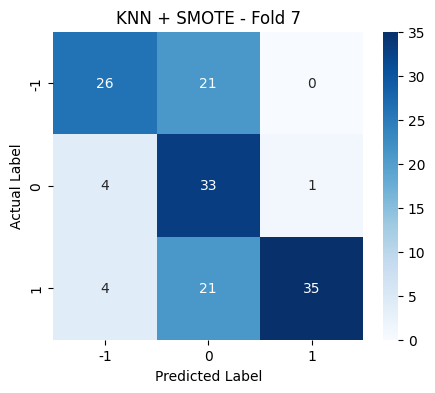


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.76      0.55      0.64        47
           0       0.44      0.87      0.58        38
           1       0.97      0.58      0.73        60

    accuracy                           0.65       145
   macro avg       0.73      0.67      0.65       145
weighted avg       0.77      0.65      0.66       145

Fold 8: Akurasi = 0.6319


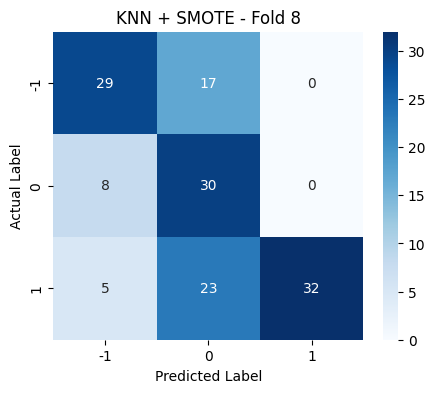


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.63      0.66        46
           0       0.43      0.79      0.56        38
           1       1.00      0.53      0.70        60

    accuracy                           0.63       144
   macro avg       0.71      0.65      0.64       144
weighted avg       0.75      0.63      0.65       144

Fold 9: Akurasi = 0.6667


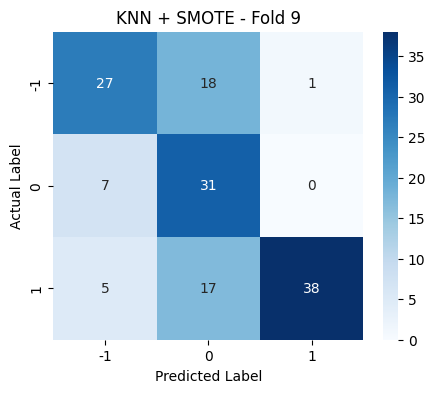


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.59      0.64        46
           0       0.47      0.82      0.60        38
           1       0.97      0.63      0.77        60

    accuracy                           0.67       144
   macro avg       0.71      0.68      0.67       144
weighted avg       0.75      0.67      0.68       144

Fold 10: Akurasi = 0.6597


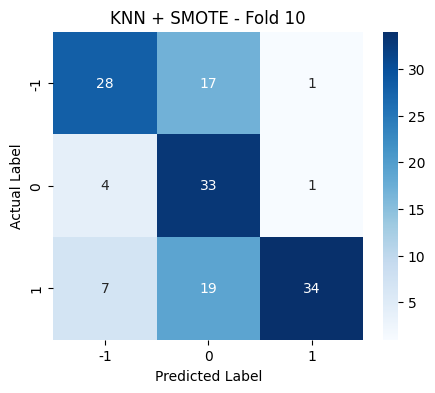


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.61      0.66        46
           0       0.48      0.87      0.62        38
           1       0.94      0.57      0.71        60

    accuracy                           0.66       144
   macro avg       0.71      0.68      0.66       144
weighted avg       0.75      0.66      0.67       144


📊 Rata-rata Akurasi untuk K=9: 0.6551



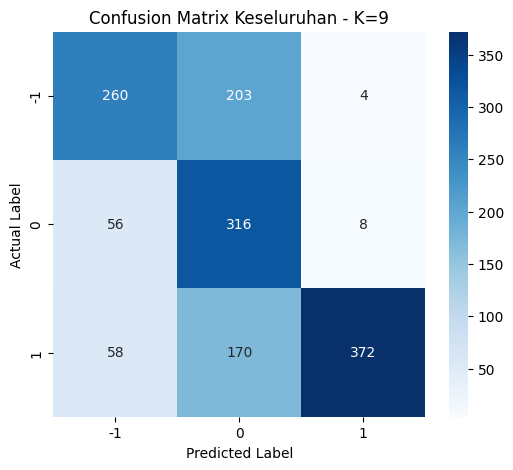


📊 Classification Report Keseluruhan untuk K=9:
              precision    recall  f1-score   support

          -1       0.70      0.56      0.62       467
           0       0.46      0.83      0.59       380
           1       0.97      0.62      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447


🔍 Evaluasi untuk K = 11
Fold 1: Akurasi = 0.6690


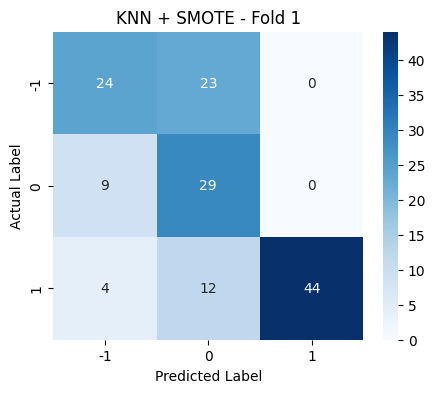


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.51      0.57        47
           0       0.45      0.76      0.57        38
           1       1.00      0.73      0.85        60

    accuracy                           0.67       145
   macro avg       0.70      0.67      0.66       145
weighted avg       0.74      0.67      0.68       145

Fold 2: Akurasi = 0.6345


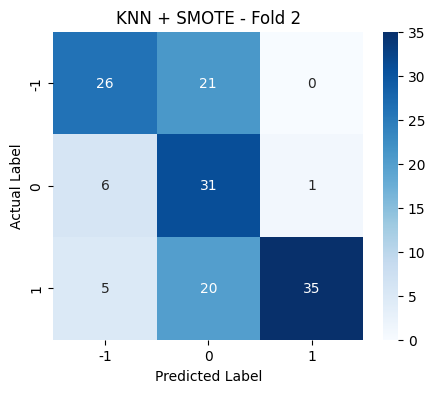


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.55      0.62        47
           0       0.43      0.82      0.56        38
           1       0.97      0.58      0.73        60

    accuracy                           0.63       145
   macro avg       0.70      0.65      0.64       145
weighted avg       0.74      0.63      0.65       145

Fold 3: Akurasi = 0.6897


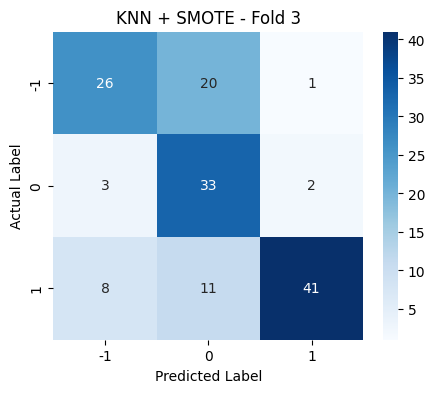


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.55      0.62        47
           0       0.52      0.87      0.65        38
           1       0.93      0.68      0.79        60

    accuracy                           0.69       145
   macro avg       0.72      0.70      0.68       145
weighted avg       0.75      0.69      0.70       145

Fold 4: Akurasi = 0.6345


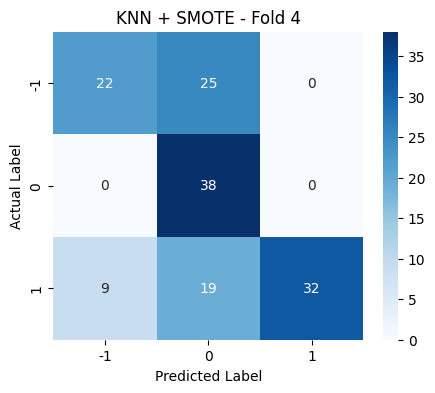


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.47      0.56        47
           0       0.46      1.00      0.63        38
           1       1.00      0.53      0.70        60

    accuracy                           0.63       145
   macro avg       0.72      0.67      0.63       145
weighted avg       0.77      0.63      0.64       145

Fold 5: Akurasi = 0.6207


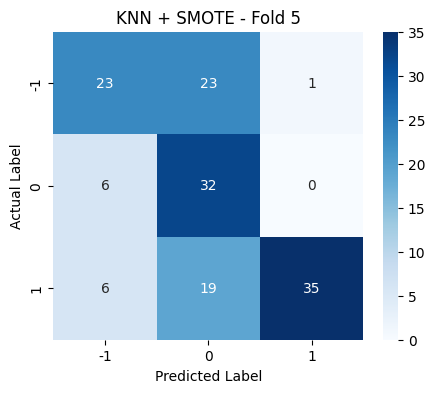


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.49      0.56        47
           0       0.43      0.84      0.57        38
           1       0.97      0.58      0.73        60

    accuracy                           0.62       145
   macro avg       0.69      0.64      0.62       145
weighted avg       0.73      0.62      0.63       145

Fold 6: Akurasi = 0.6690


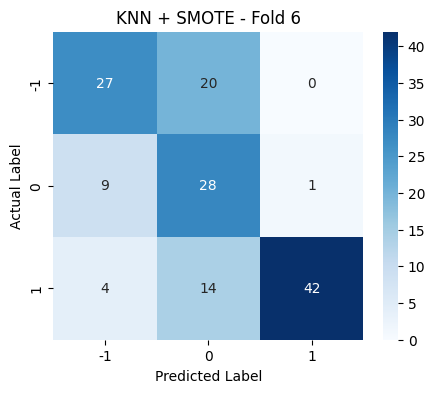


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.68      0.57      0.62        47
           0       0.45      0.74      0.56        38
           1       0.98      0.70      0.82        60

    accuracy                           0.67       145
   macro avg       0.70      0.67      0.67       145
weighted avg       0.74      0.67      0.69       145

Fold 7: Akurasi = 0.6759


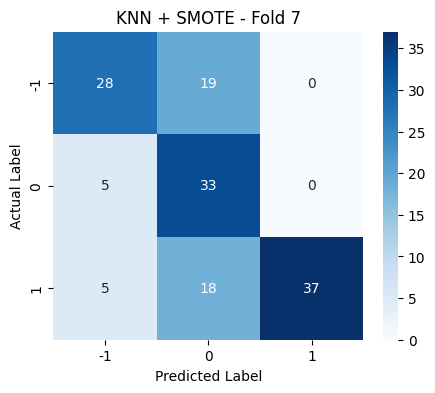


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.60      0.66        47
           0       0.47      0.87      0.61        38
           1       1.00      0.62      0.76        60

    accuracy                           0.68       145
   macro avg       0.74      0.69      0.68       145
weighted avg       0.78      0.68      0.69       145

Fold 8: Akurasi = 0.6458


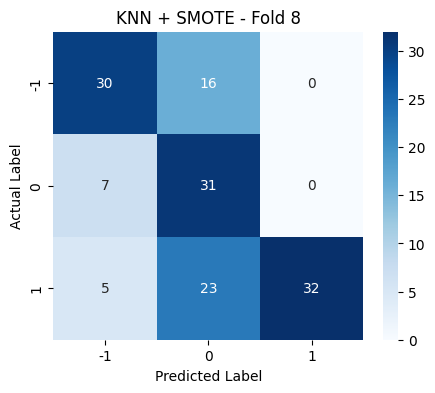


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.71      0.65      0.68        46
           0       0.44      0.82      0.57        38
           1       1.00      0.53      0.70        60

    accuracy                           0.65       144
   macro avg       0.72      0.67      0.65       144
weighted avg       0.76      0.65      0.66       144

Fold 9: Akurasi = 0.6528


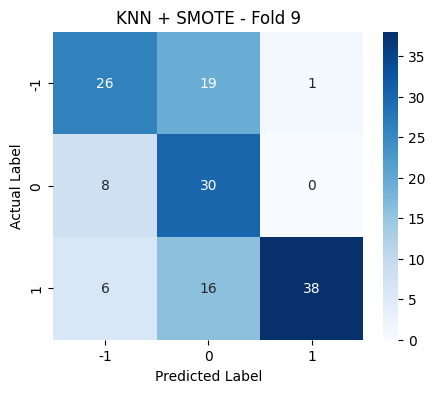


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.57      0.60        46
           0       0.46      0.79      0.58        38
           1       0.97      0.63      0.77        60

    accuracy                           0.65       144
   macro avg       0.70      0.66      0.65       144
weighted avg       0.74      0.65      0.67       144

Fold 10: Akurasi = 0.6736


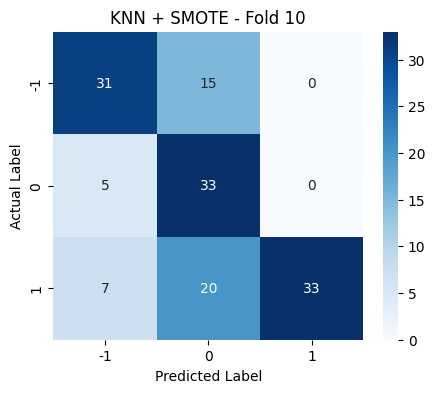


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.72      0.67      0.70        46
           0       0.49      0.87      0.62        38
           1       1.00      0.55      0.71        60

    accuracy                           0.67       144
   macro avg       0.74      0.70      0.68       144
weighted avg       0.78      0.67      0.68       144


📊 Rata-rata Akurasi untuk K=11: 0.6565



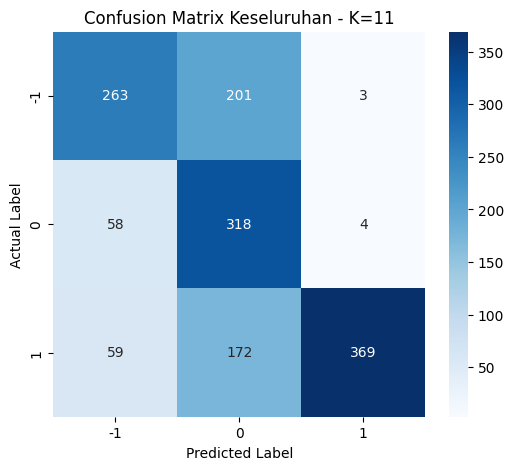


📊 Classification Report Keseluruhan untuk K=11:
              precision    recall  f1-score   support

          -1       0.69      0.56      0.62       467
           0       0.46      0.84      0.59       380
           1       0.98      0.61      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447


🏆 Hasil Terbaik:
K terbaik: 5, dengan Akurasi Tertinggi: 0.7172


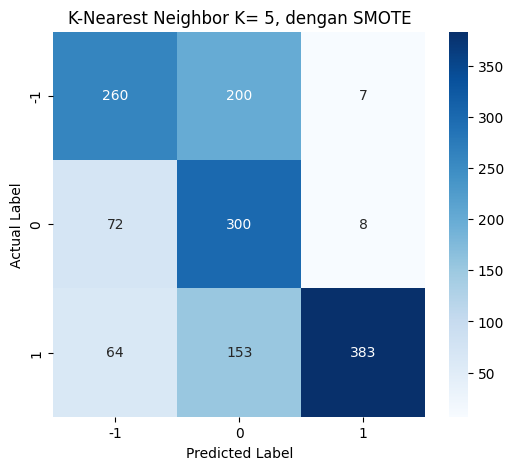


📊 Classification Report untuk Model Terbaik:
              precision    recall  f1-score   support

          -1       0.66      0.56      0.60       467
           0       0.46      0.79      0.58       380
           1       0.96      0.64      0.77       600

    accuracy                           0.65      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.73      0.65      0.67      1447



In [ ]:


k_results_KNN_SMOTE = {}  # Untuk menyimpan akurasi rata-rata tiap K
best_accuracy_KNN_SMOTE = 0
best_predictions_KNN_SMOTE = None
best_conf_matrix_KNN_SMOTE = None
best_class_report_KNN_SMOTE = None

for k in k_values:
    print(f"\n🔍 Evaluasi untuk K = {k}")

    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    fold_data_KNN_SMOTE = []
    accuracies_KNN_SMOTE = []
    all_predictions_KNN_SMOTE = []
    conf_matrices_KNN_SMOTE = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        test_texts = datafinal['content'].iloc[test_idx].values

        # Terapkan SMOTE untuk menangani ketidakseimbangan data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Latih model
        knn.fit(X_train_resampled, y_train_resampled)

        # Prediksi pada data uji
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi
        fold_predictions = pd.DataFrame({
            "Fold": fold,
            "Text": test_texts,
            "Actual Label": y_test.values,
            "Predicted Label": y_pred
        })
        all_predictions_KNN_SMOTE.append(fold_predictions)

        # Menghitung akurasi
        acc = accuracy_score(y_test, y_pred)
        accuracies_KNN_SMOTE.append(acc)

        # Simpan confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices_KNN_SMOTE.append(cm)

        # Simpan data tiap fold
        fold_data_KNN_SMOTE.append({
            "Fold": fold,
            "Train Data": len(train_idx),
            "Test Data": len(test_idx),
            "Accuracy": acc
        })

        # Tampilkan hasil tiap fold
        print(f"Fold {fold}: Akurasi = {acc:.4f}")

        # Tampilkan confusion matrix tiap fold
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
        plt.xlabel("Predicted Label")
        plt.ylabel("Actual Label")
        plt.title(f"KNN + SMOTE - Fold {fold}")
        plt.show()

        # Tampilkan classification report tiap fold
        print("\n📊 Classification Report:")
        print(classification_report(y_test, y_pred))

    # Simpan akurasi tertinggi dari seluruh untuk nilai K ini
    avg_accuracy = max(accuracies_KNN_SMOTE)
    k_results_KNN_SMOTE[k] = avg_accuracy

    print(f"\n📊 Rata-rata Akurasi untuk K={k}: {sum(accuracies_KNN_SMOTE)/len(accuracies_KNN_SMOTE):.4f}\n")

    # Gabungkan semua hasil prediksi
    predictions_df = pd.concat(all_predictions_KNN_SMOTE, ignore_index=True)

    # Simpan confusion matrix dan classification report untuk seluruh fold
    y_actual_all = predictions_df["Actual Label"]
    y_predicted_all = predictions_df["Predicted Label"]

    cm_all = confusion_matrix(y_actual_all, y_predicted_all)
    class_report_all = classification_report(y_actual_all, y_predicted_all)

    # Simpan hasil terbaik
    if avg_accuracy > best_accuracy_KNN_SMOTE:
        best_accuracy_KNN_SMOTE = avg_accuracy
        best_predictions_KNN_SMOTE = predictions_df
        best_conf_matrix_KNN_SMOTE = cm_all
        best_class_report_KNN_SMOTE = class_report_all

    # Tampilkan confusion matrix keseluruhan
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix Keseluruhan - K={k}")
    plt.show()

    # Tampilkan classification report keseluruhan
    print(f"\n📊 Classification Report Keseluruhan untuk K={k}:")
    print(class_report_all)

# Menampilkan hasil terbaik
print("\n🏆 Hasil Terbaik:")
print(f"K terbaik: {max(k_results_KNN_SMOTE, key=k_results_KNN_SMOTE.get)}, dengan Akurasi Tertinggi: {best_accuracy_KNN_SMOTE:.4f}")

# Tampilkan confusion matrix terbaik
plt.figure(figsize=(6, 5))
sns.heatmap(best_conf_matrix_KNN_SMOTE, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"K-Nearest Neighbor K= {max(k_results_KNN_SMOTE, key=k_results_KNN_SMOTE.get)}, dengan SMOTE")
plt.show()

print("\n📊 Classification Report untuk Model Terbaik:")
print(best_class_report_KNN_SMOTE)



🔍 Evaluasi untuk K = 3
Fold 1: Akurasi = 0.7103
Fold 2: Akurasi = 0.6276
Fold 3: Akurasi = 0.6897
Fold 4: Akurasi = 0.6414
Fold 5: Akurasi = 0.6345
Fold 6: Akurasi = 0.6897
Fold 7: Akurasi = 0.6621
Fold 8: Akurasi = 0.6389
Fold 9: Akurasi = 0.6319
Fold 10: Akurasi = 0.6319

📊 Rata-rata Akurasi tertinggi untuk K=3: 0.6558



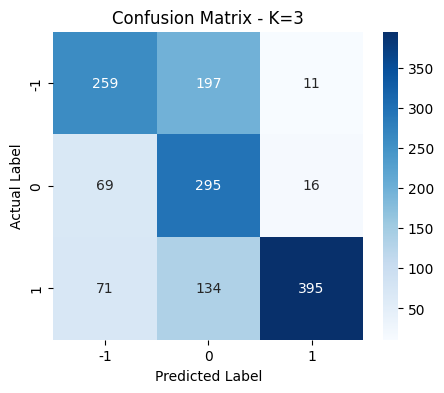


📊 Classification Report untuk K=3:
              precision    recall  f1-score   support

          -1       0.65      0.55      0.60       467
           0       0.47      0.78      0.59       380
           1       0.94      0.66      0.77       600

    accuracy                           0.66      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.72      0.66      0.67      1447


🔍 Evaluasi untuk K = 5
Fold 1: Akurasi = 0.6966
Fold 2: Akurasi = 0.6207
Fold 3: Akurasi = 0.7172
Fold 4: Akurasi = 0.6759
Fold 5: Akurasi = 0.6000
Fold 6: Akurasi = 0.6828
Fold 7: Akurasi = 0.6207
Fold 8: Akurasi = 0.6250
Fold 9: Akurasi = 0.6389
Fold 10: Akurasi = 0.6389

📊 Rata-rata Akurasi tertinggi untuk K=5: 0.6517



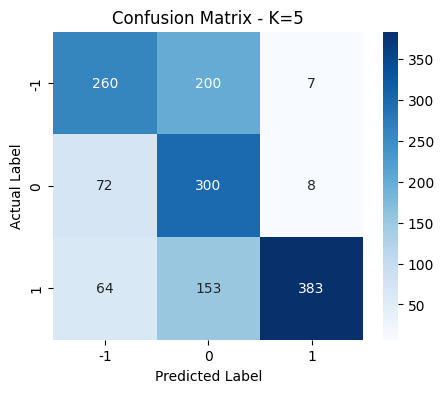


📊 Classification Report untuk K=5:
              precision    recall  f1-score   support

          -1       0.66      0.56      0.60       467
           0       0.46      0.79      0.58       380
           1       0.96      0.64      0.77       600

    accuracy                           0.65      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.73      0.65      0.67      1447


🔍 Evaluasi untuk K = 7
Fold 1: Akurasi = 0.6966
Fold 2: Akurasi = 0.6276
Fold 3: Akurasi = 0.7034
Fold 4: Akurasi = 0.6621
Fold 5: Akurasi = 0.6207
Fold 6: Akurasi = 0.6828
Fold 7: Akurasi = 0.6483
Fold 8: Akurasi = 0.6528
Fold 9: Akurasi = 0.6528
Fold 10: Akurasi = 0.6597

📊 Rata-rata Akurasi tertinggi untuk K=7: 0.6607



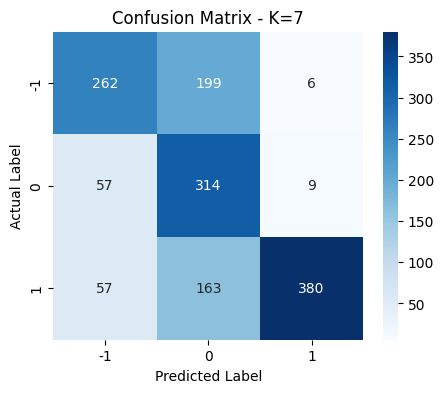


📊 Classification Report untuk K=7:
              precision    recall  f1-score   support

          -1       0.70      0.56      0.62       467
           0       0.46      0.83      0.59       380
           1       0.96      0.63      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447


🔍 Evaluasi untuk K = 9
Fold 1: Akurasi = 0.6897
Fold 2: Akurasi = 0.6138
Fold 3: Akurasi = 0.6966
Fold 4: Akurasi = 0.6414
Fold 5: Akurasi = 0.6069
Fold 6: Akurasi = 0.6966
Fold 7: Akurasi = 0.6483
Fold 8: Akurasi = 0.6319
Fold 9: Akurasi = 0.6667
Fold 10: Akurasi = 0.6597

📊 Rata-rata Akurasi tertinggi untuk K=9: 0.6551



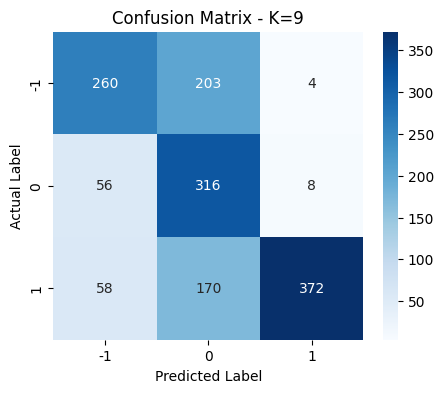


📊 Classification Report untuk K=9:
              precision    recall  f1-score   support

          -1       0.70      0.56      0.62       467
           0       0.46      0.83      0.59       380
           1       0.97      0.62      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447


🔍 Evaluasi untuk K = 11
Fold 1: Akurasi = 0.6690
Fold 2: Akurasi = 0.6345
Fold 3: Akurasi = 0.6897
Fold 4: Akurasi = 0.6345
Fold 5: Akurasi = 0.6207
Fold 6: Akurasi = 0.6690
Fold 7: Akurasi = 0.6759
Fold 8: Akurasi = 0.6458
Fold 9: Akurasi = 0.6528
Fold 10: Akurasi = 0.6736

📊 Rata-rata Akurasi tertinggi untuk K=11: 0.6565



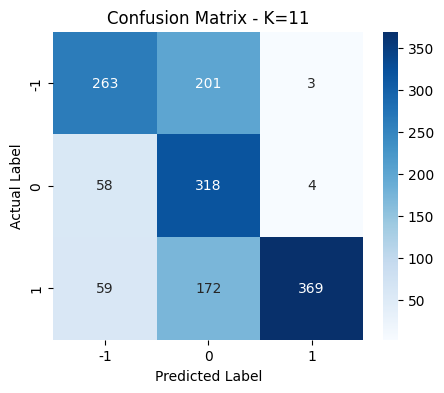


📊 Classification Report untuk K=11:
              precision    recall  f1-score   support

          -1       0.69      0.56      0.62       467
           0       0.46      0.84      0.59       380
           1       0.98      0.61      0.76       600

    accuracy                           0.66      1447
   macro avg       0.71      0.67      0.66      1447
weighted avg       0.75      0.66      0.67      1447



In [ ]:
for k in k_values:
    print(f"\n🔍 Evaluasi untuk K = {k}")

    knn = KNeighborsClassifier(n_neighbors=k)
    fold_data_KNN_SMOTE = []
    accuracies_KNN_SMOTE = []
    all_predictions_KNN_SMOTE = []
    conf_matrices_KNN_SMOTE = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        test_texts = datafinal['content'].iloc[test_idx].values

        # Terapkan SMOTE untuk menangani ketidakseimbangan data
        smote = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Latih model
        knn.fit(X_train_resampled, y_train_resampled)

        # Prediksi pada data uji
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi
        fold_predictions = pd.DataFrame({
            "Fold": fold,
            "Text": test_texts,
            "Actual Label": y_test.values,
            "Predicted Label": y_pred
        })
        all_predictions_KNN_SMOTE.append(fold_predictions)


        # Menghitung akurasi
        acc = accuracy_score(y_test, y_pred)
        accuracies_KNN_SMOTE.append(acc)

          # Simpan confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices_KNN_SMOTE.append(cm)

        fold_data_KNN_SMOTE.append({
            "Fold": fold,
            "Train Data": len(train_idx),
            "Test Data": len(test_idx),
            "Accuracy": acc
        })
        print(f"Fold {fold}: Akurasi = {acc:.4f}")

    # Simpan akurasi tertinggi untuk nilai K ini
    avg_accuracy = max(accuracies_KNN_SMOTE)
    k_results[k] = avg_accuracy

    print(f"\n📊 Rata-rata Akurasi tertinggi untuk K={k}: {sum(accuracies_KNN_SMOTE)/len(accuracies_KNN_SMOTE):.4f}\n")

    # Gabungkan semua hasil prediksi
    predictions_df = pd.concat(all_predictions_KNN_SMOTE, ignore_index=True)

    # Simpan confusion matrix dan classification report
    y_actual_all = predictions_df["Actual Label"]
    y_predicted_all = predictions_df["Predicted Label"]

    cm = confusion_matrix(y_actual_all, y_predicted_all)
    class_report = classification_report(y_actual_all, y_predicted_all)

    # Simpan hasil terbaik
    if avg_accuracy == max(k_results.values()):
        best_predictions = predictions_df
        best_conf_matrix = cm
        best_class_report = class_report

    # Tampilkan confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - K={k}")
    plt.show()

    # Tampilkan classification report
    print(f"\n📊 Classification Report untuk K={k}:")
    print(class_report)



🔹 Hasil Akhir:
K = 3, Rata-rata Akurasi = 0.7103
K = 5, Rata-rata Akurasi = 0.7172
K = 7, Rata-rata Akurasi = 0.7034
K = 9, Rata-rata Akurasi = 0.6966
K = 11, Rata-rata Akurasi = 0.6897

🏆 Nilai K terbaik adalah 5 dengan akurasi tertinggi 0.7172

✅ Hasil prediksi terbaik disimpan dalam 'hasil_prediksi_KNN_SMOTE.csv'


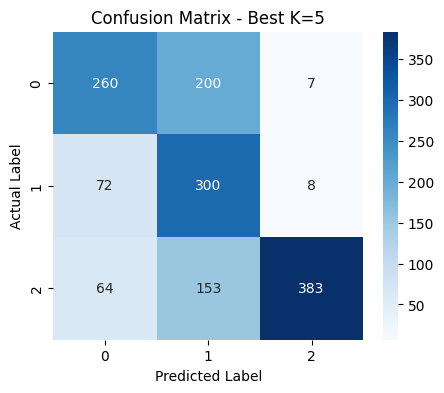


📊 Classification Report untuk K Terbaik (K=5):
              precision    recall  f1-score   support

          -1       0.66      0.56      0.60       467
           0       0.46      0.79      0.58       380
           1       0.96      0.64      0.77       600

    accuracy                           0.65      1447
   macro avg       0.69      0.66      0.65      1447
weighted avg       0.73      0.65      0.67      1447



In [ ]:
# Pilih nilai K terbaik berdasarkan akurasi tertinggi
best_k = max(k_results, key=k_results.get)
best_accuracy = k_results[best_k]

print("\n🔹 Hasil Akhir:")
for k, acc in k_results.items():
    print(f"K = {k}, Rata-rata Akurasi = {acc:.4f}")

print(f"\n🏆 Nilai K terbaik adalah {best_k} dengan akurasi tertinggi {best_accuracy:.4f}")

# Simpan hasil prediksi terbaik ke CSV
if best_predictions is not None:
    best_predictions.to_csv("hasil_prediksi_KNN_SMOTE.csv",mode='w', index=False)
    print("\n✅ Hasil prediksi terbaik disimpan dalam 'hasil_prediksi_KNN_SMOTE.csv'")

# Tampilkan confusion matrix terbaik
plt.figure(figsize=(5, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix - Best K={best_k}")
plt.show()

# Tampilkan classification report terbaik
print(f"\n📊 Classification Report untuk K Terbaik (K={best_k}):")
print(best_class_report)


# **Klasifikasi K-Nearest Neighbor tanpa SMOTE**


🔍 Evaluasi untuk K = 3
Fold 1: Akurasi = 0.7655


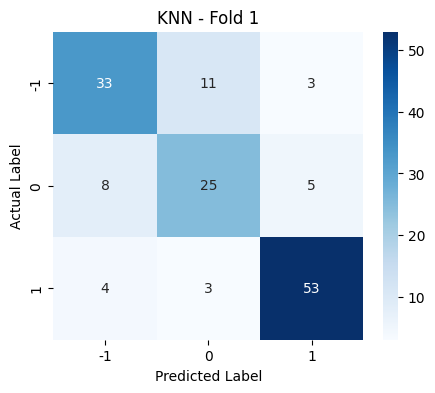


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.70      0.72        47
           0       0.64      0.66      0.65        38
           1       0.87      0.88      0.88        60

    accuracy                           0.77       145
   macro avg       0.75      0.75      0.75       145
weighted avg       0.77      0.77      0.77       145

Fold 2: Akurasi = 0.6138


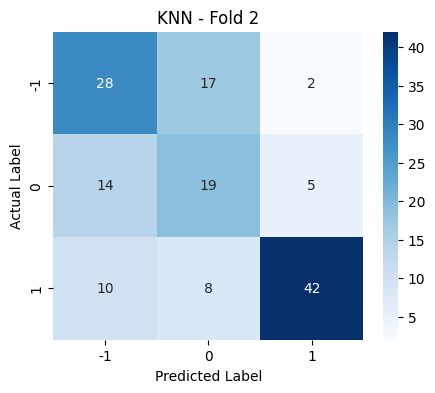


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.54      0.60      0.57        47
           0       0.43      0.50      0.46        38
           1       0.86      0.70      0.77        60

    accuracy                           0.61       145
   macro avg       0.61      0.60      0.60       145
weighted avg       0.64      0.61      0.62       145

Fold 3: Akurasi = 0.7034


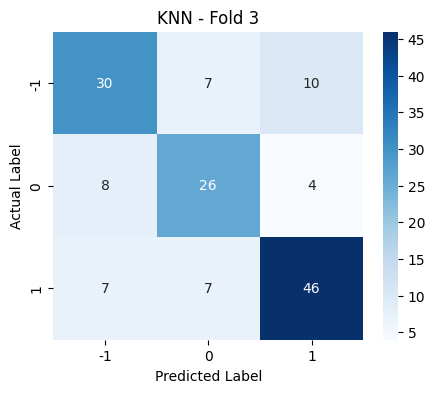


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.64      0.65        47
           0       0.65      0.68      0.67        38
           1       0.77      0.77      0.77        60

    accuracy                           0.70       145
   macro avg       0.69      0.70      0.70       145
weighted avg       0.70      0.70      0.70       145

Fold 4: Akurasi = 0.6345


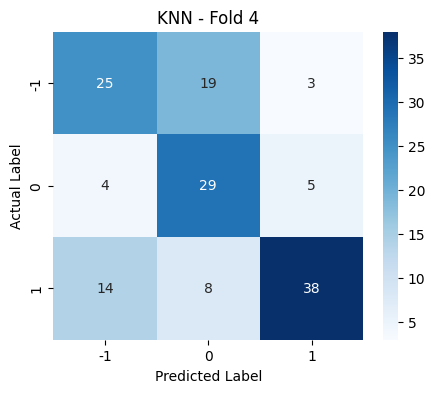


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.53      0.56        47
           0       0.52      0.76      0.62        38
           1       0.83      0.63      0.72        60

    accuracy                           0.63       145
   macro avg       0.64      0.64      0.63       145
weighted avg       0.67      0.63      0.64       145

Fold 5: Akurasi = 0.6897


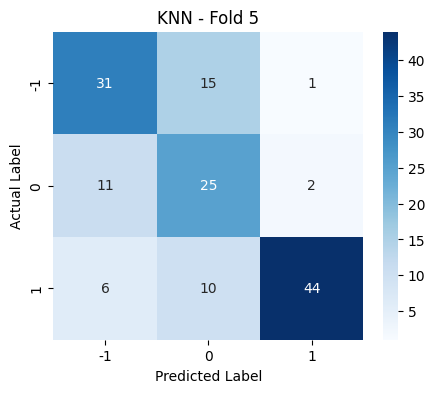


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.66      0.65        47
           0       0.50      0.66      0.57        38
           1       0.94      0.73      0.82        60

    accuracy                           0.69       145
   macro avg       0.69      0.68      0.68       145
weighted avg       0.73      0.69      0.70       145

Fold 6: Akurasi = 0.6897


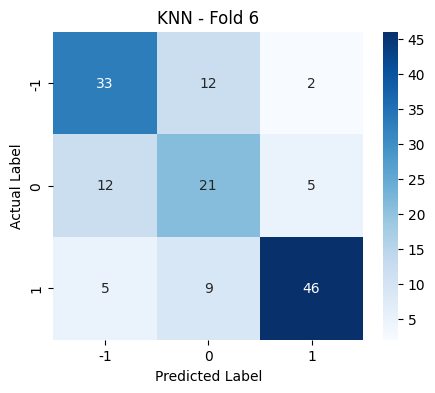


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.70      0.68        47
           0       0.50      0.55      0.53        38
           1       0.87      0.77      0.81        60

    accuracy                           0.69       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.70      0.69      0.70       145

Fold 7: Akurasi = 0.6552


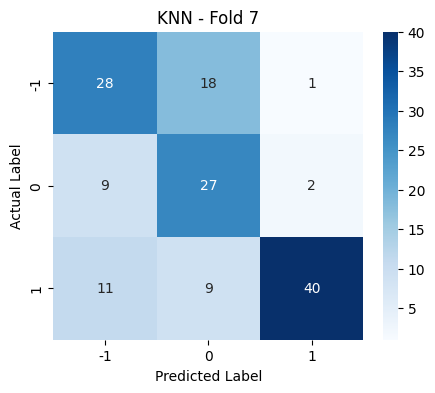


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.60      0.59        47
           0       0.50      0.71      0.59        38
           1       0.93      0.67      0.78        60

    accuracy                           0.66       145
   macro avg       0.67      0.66      0.65       145
weighted avg       0.71      0.66      0.67       145

Fold 8: Akurasi = 0.6250


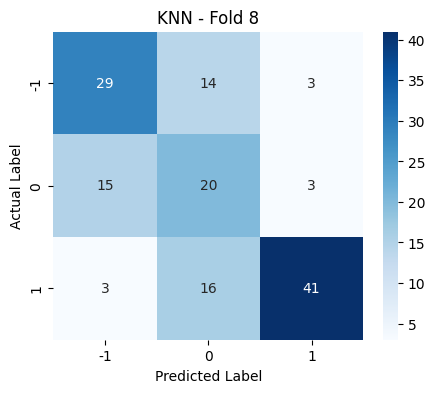


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.62        46
           0       0.40      0.53      0.45        38
           1       0.87      0.68      0.77        60

    accuracy                           0.62       144
   macro avg       0.63      0.61      0.61       144
weighted avg       0.67      0.62      0.64       144

Fold 9: Akurasi = 0.6875


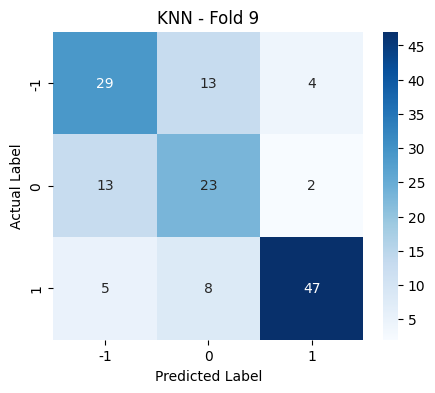


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.62        46
           0       0.52      0.61      0.56        38
           1       0.89      0.78      0.83        60

    accuracy                           0.69       144
   macro avg       0.68      0.67      0.67       144
weighted avg       0.70      0.69      0.69       144

Fold 10: Akurasi = 0.6528


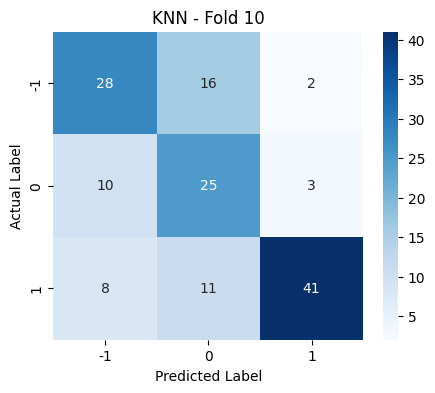


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.61      0.61        46
           0       0.48      0.66      0.56        38
           1       0.89      0.68      0.77        60

    accuracy                           0.65       144
   macro avg       0.66      0.65      0.65       144
weighted avg       0.69      0.65      0.66       144


📊 Rata-rata Akurasi untuk K=3: 0.6717



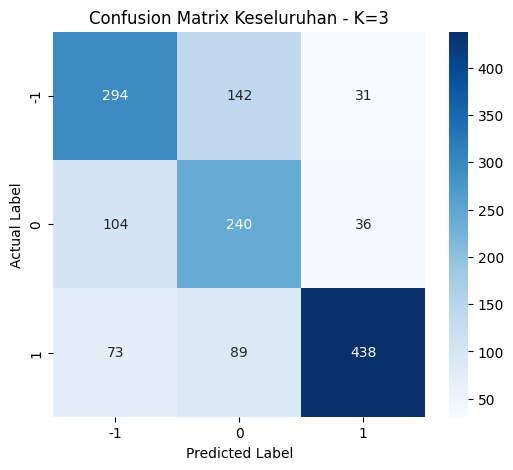


📊 Classification Report Keseluruhan untuk K=3:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.63       467
           0       0.51      0.63      0.56       380
           1       0.87      0.73      0.79       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447


🔍 Evaluasi untuk K = 5
Fold 1: Akurasi = 0.7517


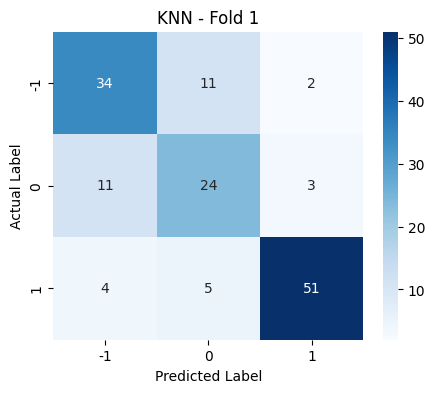


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.72      0.71        47
           0       0.60      0.63      0.62        38
           1       0.91      0.85      0.88        60

    accuracy                           0.75       145
   macro avg       0.73      0.73      0.73       145
weighted avg       0.76      0.75      0.75       145

Fold 2: Akurasi = 0.6414


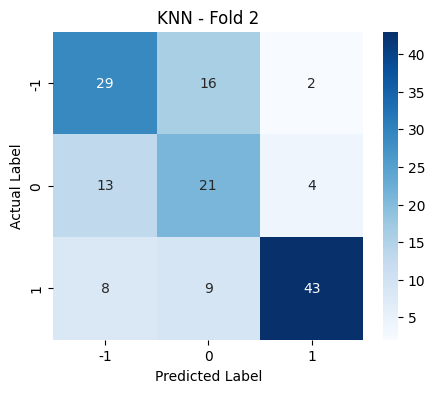


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.62      0.60        47
           0       0.46      0.55      0.50        38
           1       0.88      0.72      0.79        60

    accuracy                           0.64       145
   macro avg       0.64      0.63      0.63       145
weighted avg       0.67      0.64      0.65       145

Fold 3: Akurasi = 0.7241


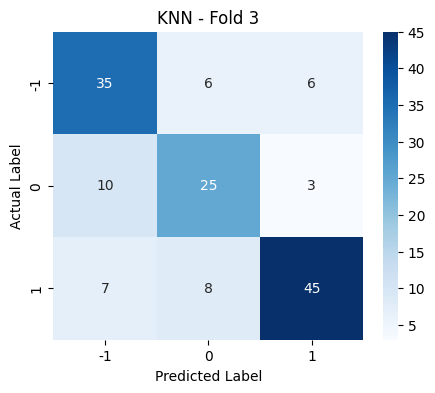


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.74      0.71        47
           0       0.64      0.66      0.65        38
           1       0.83      0.75      0.79        60

    accuracy                           0.72       145
   macro avg       0.72      0.72      0.72       145
weighted avg       0.73      0.72      0.73       145

Fold 4: Akurasi = 0.6966


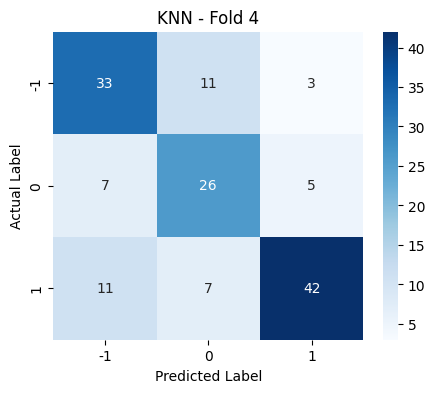


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.70      0.67        47
           0       0.59      0.68      0.63        38
           1       0.84      0.70      0.76        60

    accuracy                           0.70       145
   macro avg       0.69      0.70      0.69       145
weighted avg       0.71      0.70      0.70       145

Fold 5: Akurasi = 0.6690


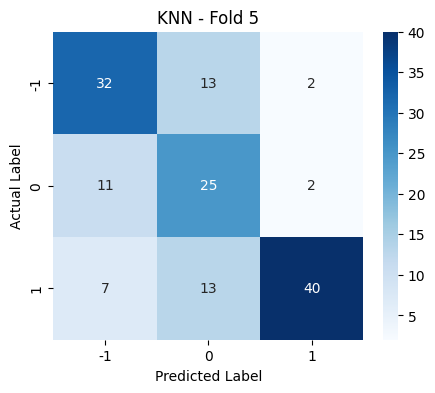


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.68      0.66        47
           0       0.49      0.66      0.56        38
           1       0.91      0.67      0.77        60

    accuracy                           0.67       145
   macro avg       0.68      0.67      0.66       145
weighted avg       0.71      0.67      0.68       145

Fold 6: Akurasi = 0.6759


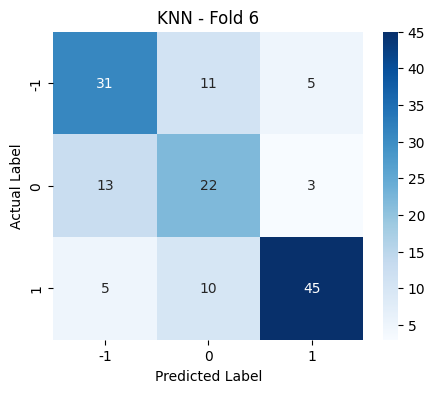


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.66      0.65        47
           0       0.51      0.58      0.54        38
           1       0.85      0.75      0.80        60

    accuracy                           0.68       145
   macro avg       0.66      0.66      0.66       145
weighted avg       0.69      0.68      0.68       145

Fold 7: Akurasi = 0.6207


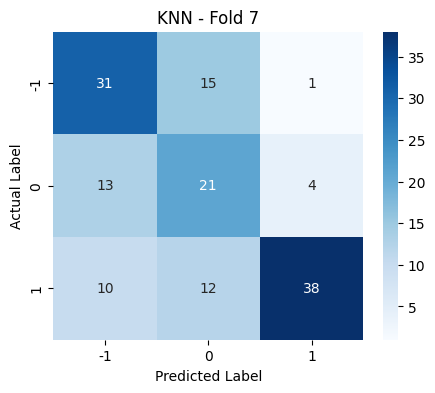


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.57      0.66      0.61        47
           0       0.44      0.55      0.49        38
           1       0.88      0.63      0.74        60

    accuracy                           0.62       145
   macro avg       0.63      0.62      0.61       145
weighted avg       0.67      0.62      0.63       145

Fold 8: Akurasi = 0.6042


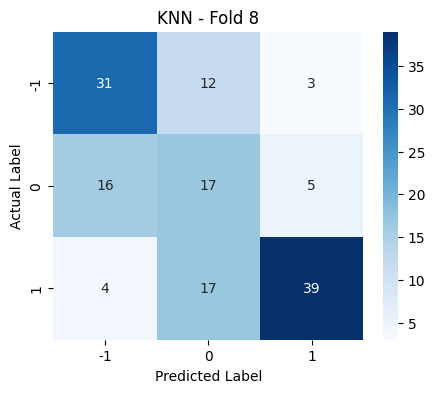


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.67      0.64        46
           0       0.37      0.45      0.40        38
           1       0.83      0.65      0.73        60

    accuracy                           0.60       144
   macro avg       0.60      0.59      0.59       144
weighted avg       0.64      0.60      0.61       144

Fold 9: Akurasi = 0.6250


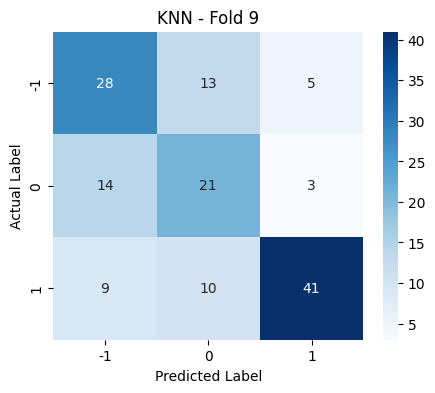


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.55      0.61      0.58        46
           0       0.48      0.55      0.51        38
           1       0.84      0.68      0.75        60

    accuracy                           0.62       144
   macro avg       0.62      0.61      0.61       144
weighted avg       0.65      0.62      0.63       144

Fold 10: Akurasi = 0.6736


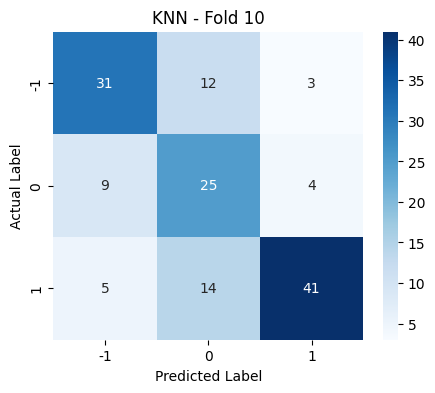


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.69      0.67      0.68        46
           0       0.49      0.66      0.56        38
           1       0.85      0.68      0.76        60

    accuracy                           0.67       144
   macro avg       0.68      0.67      0.67       144
weighted avg       0.71      0.67      0.68       144


📊 Rata-rata Akurasi untuk K=5: 0.6682



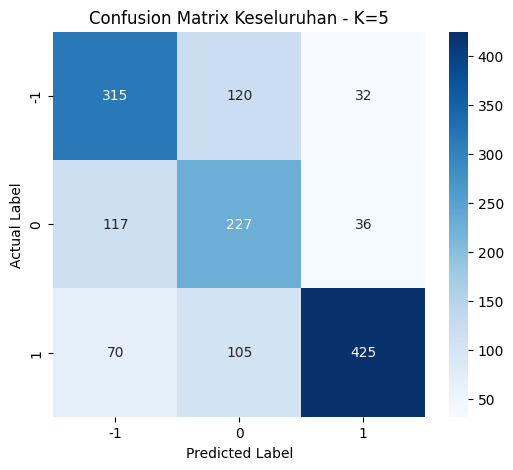


📊 Classification Report Keseluruhan untuk K=5:
              precision    recall  f1-score   support

          -1       0.63      0.67      0.65       467
           0       0.50      0.60      0.55       380
           1       0.86      0.71      0.78       600

    accuracy                           0.67      1447
   macro avg       0.66      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447


🔍 Evaluasi untuk K = 7
Fold 1: Akurasi = 0.7448


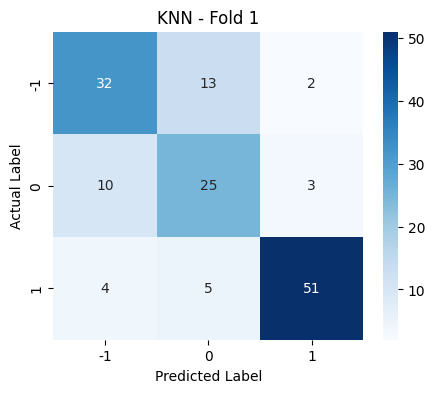


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.68      0.69        47
           0       0.58      0.66      0.62        38
           1       0.91      0.85      0.88        60

    accuracy                           0.74       145
   macro avg       0.73      0.73      0.73       145
weighted avg       0.75      0.74      0.75       145

Fold 2: Akurasi = 0.6552


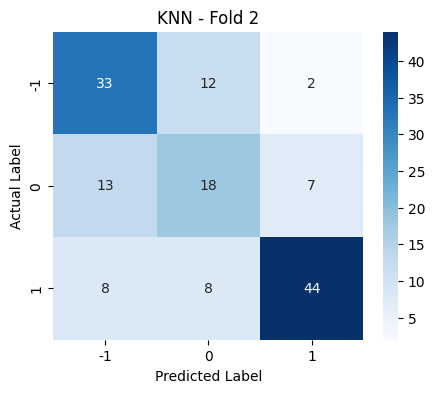


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.70      0.65        47
           0       0.47      0.47      0.47        38
           1       0.83      0.73      0.78        60

    accuracy                           0.66       145
   macro avg       0.64      0.64      0.64       145
weighted avg       0.67      0.66      0.66       145

Fold 3: Akurasi = 0.7448


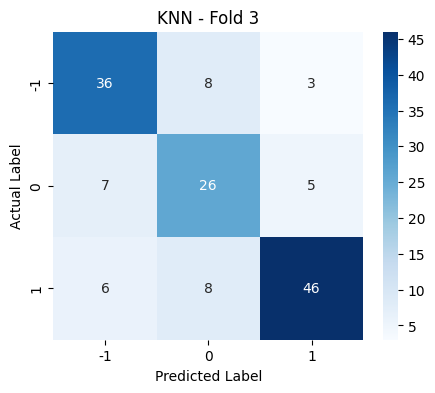


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.77      0.75        47
           0       0.62      0.68      0.65        38
           1       0.85      0.77      0.81        60

    accuracy                           0.74       145
   macro avg       0.74      0.74      0.74       145
weighted avg       0.75      0.74      0.75       145

Fold 4: Akurasi = 0.6897


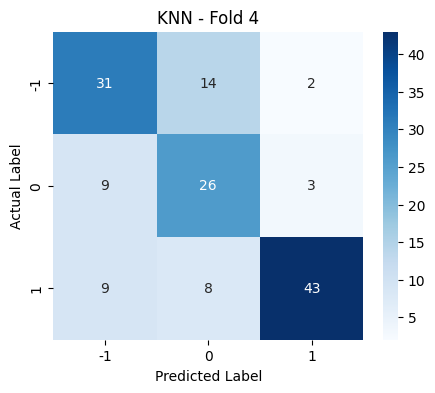


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.66      0.65        47
           0       0.54      0.68      0.60        38
           1       0.90      0.72      0.80        60

    accuracy                           0.69       145
   macro avg       0.69      0.69      0.68       145
weighted avg       0.72      0.69      0.70       145

Fold 5: Akurasi = 0.6621


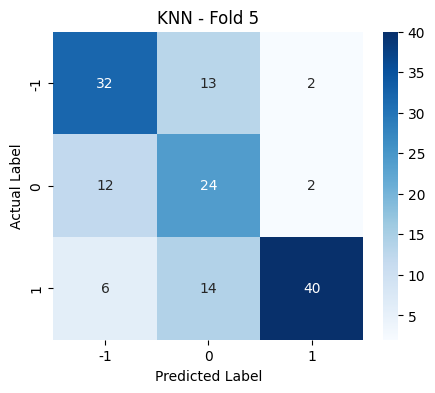


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.68      0.66        47
           0       0.47      0.63      0.54        38
           1       0.91      0.67      0.77        60

    accuracy                           0.66       145
   macro avg       0.67      0.66      0.66       145
weighted avg       0.71      0.66      0.67       145

Fold 6: Akurasi = 0.6483


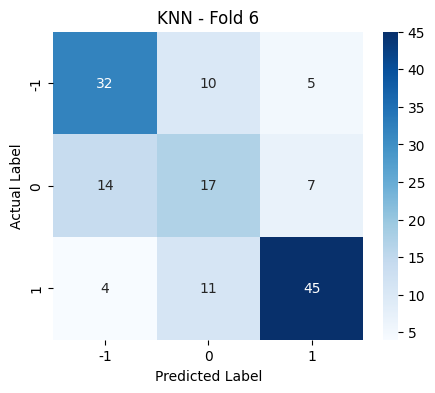


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.64      0.68      0.66        47
           0       0.45      0.45      0.45        38
           1       0.79      0.75      0.77        60

    accuracy                           0.65       145
   macro avg       0.63      0.63      0.63       145
weighted avg       0.65      0.65      0.65       145

Fold 7: Akurasi = 0.6621


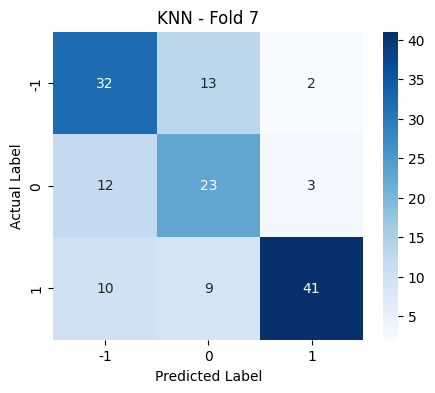


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.59      0.68      0.63        47
           0       0.51      0.61      0.55        38
           1       0.89      0.68      0.77        60

    accuracy                           0.66       145
   macro avg       0.67      0.66      0.65       145
weighted avg       0.69      0.66      0.67       145

Fold 8: Akurasi = 0.6319


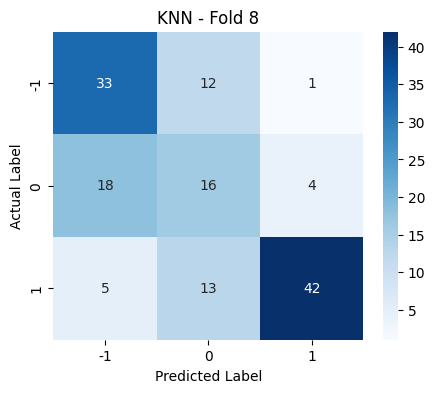


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.59      0.72      0.65        46
           0       0.39      0.42      0.41        38
           1       0.89      0.70      0.79        60

    accuracy                           0.63       144
   macro avg       0.62      0.61      0.61       144
weighted avg       0.66      0.63      0.64       144

Fold 9: Akurasi = 0.6528


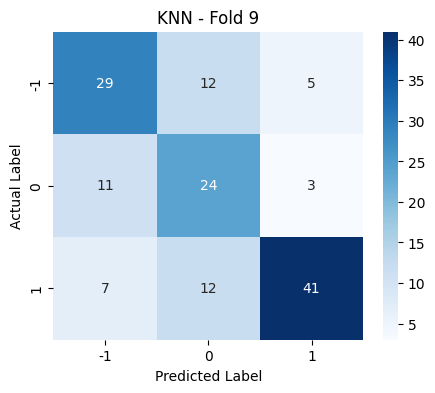


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.62        46
           0       0.50      0.63      0.56        38
           1       0.84      0.68      0.75        60

    accuracy                           0.65       144
   macro avg       0.65      0.65      0.64       144
weighted avg       0.68      0.65      0.66       144

Fold 10: Akurasi = 0.6667


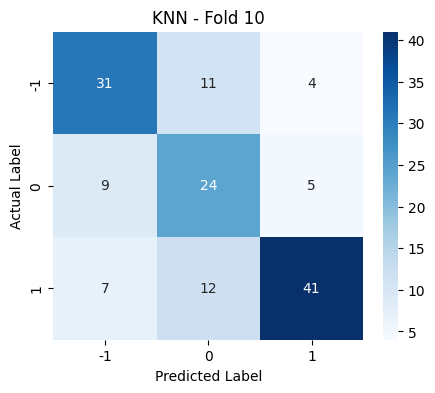


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.67      0.67        46
           0       0.51      0.63      0.56        38
           1       0.82      0.68      0.75        60

    accuracy                           0.67       144
   macro avg       0.66      0.66      0.66       144
weighted avg       0.69      0.67      0.67       144


📊 Rata-rata Akurasi untuk K=7: 0.6758



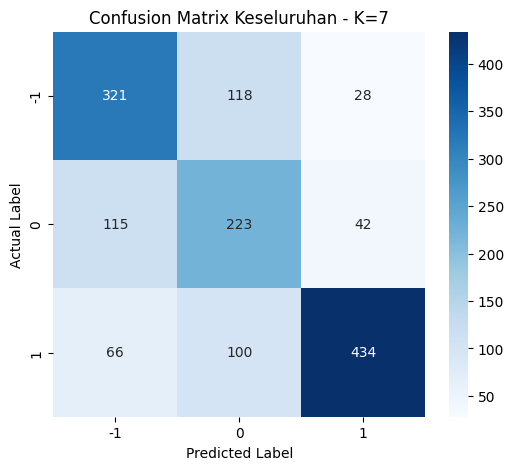


📊 Classification Report Keseluruhan untuk K=7:
              precision    recall  f1-score   support

          -1       0.64      0.69      0.66       467
           0       0.51      0.59      0.54       380
           1       0.86      0.72      0.79       600

    accuracy                           0.68      1447
   macro avg       0.67      0.67      0.66      1447
weighted avg       0.70      0.68      0.68      1447


🔍 Evaluasi untuk K = 9
Fold 1: Akurasi = 0.7103


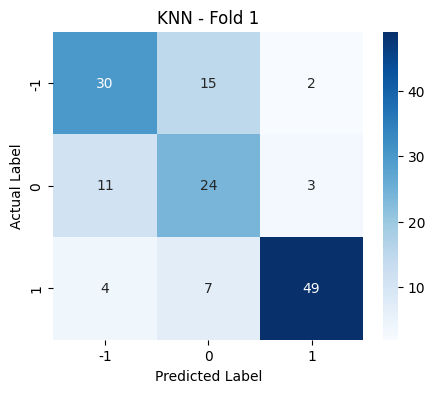


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.64      0.65        47
           0       0.52      0.63      0.57        38
           1       0.91      0.82      0.86        60

    accuracy                           0.71       145
   macro avg       0.70      0.70      0.69       145
weighted avg       0.73      0.71      0.72       145

Fold 2: Akurasi = 0.6621


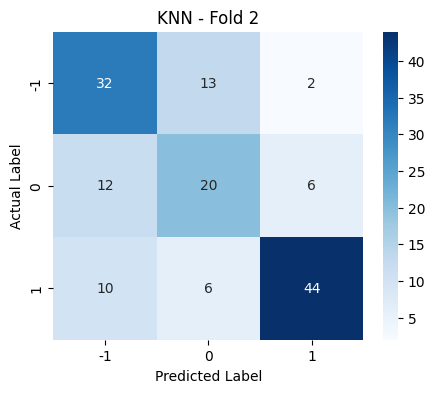


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.59      0.68      0.63        47
           0       0.51      0.53      0.52        38
           1       0.85      0.73      0.79        60

    accuracy                           0.66       145
   macro avg       0.65      0.65      0.65       145
weighted avg       0.68      0.66      0.67       145

Fold 3: Akurasi = 0.7379


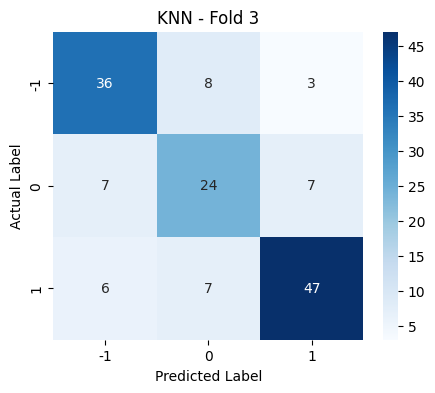


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.73      0.77      0.75        47
           0       0.62      0.63      0.62        38
           1       0.82      0.78      0.80        60

    accuracy                           0.74       145
   macro avg       0.72      0.73      0.73       145
weighted avg       0.74      0.74      0.74       145

Fold 4: Akurasi = 0.7103


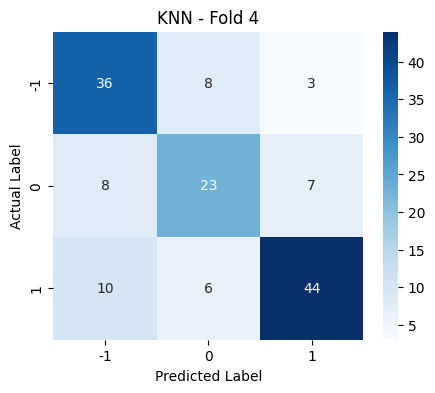


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.67      0.77      0.71        47
           0       0.62      0.61      0.61        38
           1       0.81      0.73      0.77        60

    accuracy                           0.71       145
   macro avg       0.70      0.70      0.70       145
weighted avg       0.72      0.71      0.71       145

Fold 5: Akurasi = 0.6966


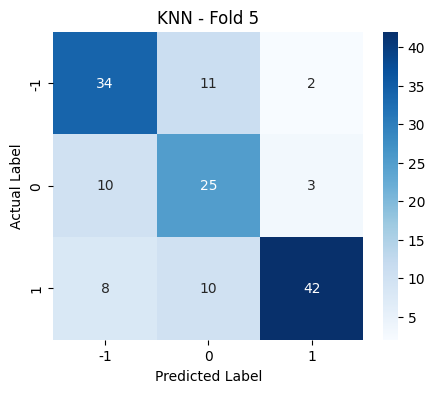


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.72      0.69        47
           0       0.54      0.66      0.60        38
           1       0.89      0.70      0.79        60

    accuracy                           0.70       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.72      0.70      0.70       145

Fold 6: Akurasi = 0.6276


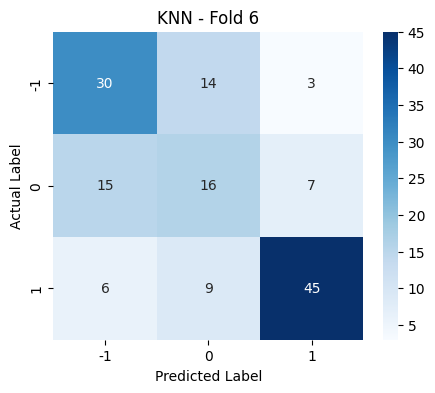


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.59      0.64      0.61        47
           0       0.41      0.42      0.42        38
           1       0.82      0.75      0.78        60

    accuracy                           0.63       145
   macro avg       0.61      0.60      0.60       145
weighted avg       0.64      0.63      0.63       145

Fold 7: Akurasi = 0.6621


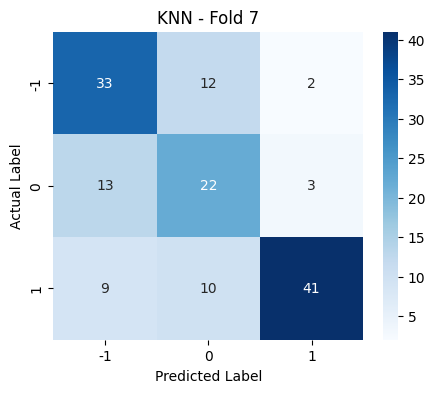


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.70      0.65        47
           0       0.50      0.58      0.54        38
           1       0.89      0.68      0.77        60

    accuracy                           0.66       145
   macro avg       0.66      0.65      0.65       145
weighted avg       0.69      0.66      0.67       145

Fold 8: Akurasi = 0.6389


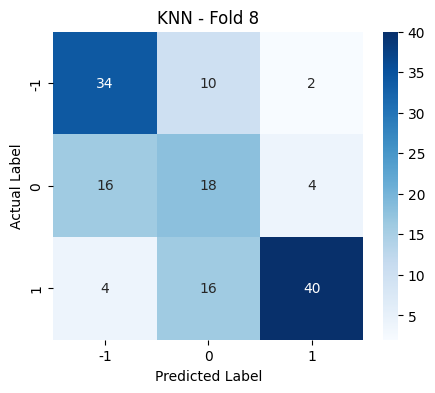


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.74      0.68        46
           0       0.41      0.47      0.44        38
           1       0.87      0.67      0.75        60

    accuracy                           0.64       144
   macro avg       0.64      0.63      0.62       144
weighted avg       0.67      0.64      0.65       144

Fold 9: Akurasi = 0.6597


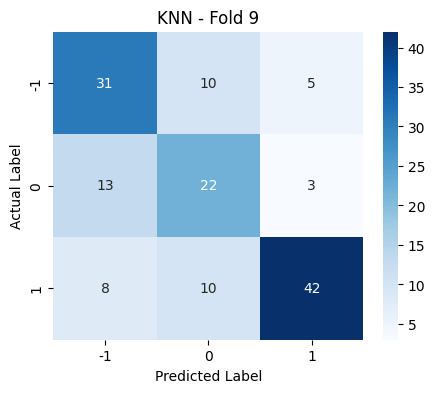


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.67      0.63        46
           0       0.52      0.58      0.55        38
           1       0.84      0.70      0.76        60

    accuracy                           0.66       144
   macro avg       0.65      0.65      0.65       144
weighted avg       0.68      0.66      0.67       144

Fold 10: Akurasi = 0.6458


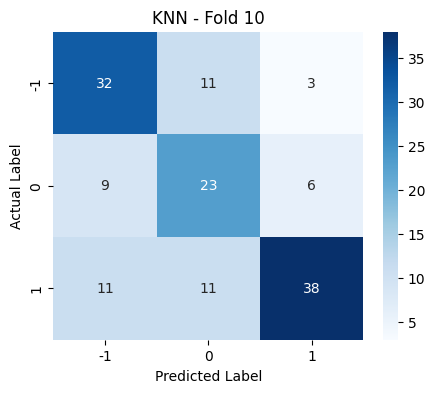


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.70      0.65        46
           0       0.51      0.61      0.55        38
           1       0.81      0.63      0.71        60

    accuracy                           0.65       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.67      0.65      0.65       144


📊 Rata-rata Akurasi untuk K=9: 0.6751



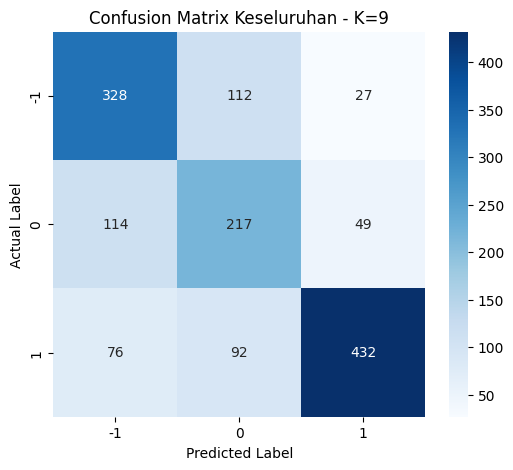


📊 Classification Report Keseluruhan untuk K=9:
              precision    recall  f1-score   support

          -1       0.63      0.70      0.67       467
           0       0.52      0.57      0.54       380
           1       0.85      0.72      0.78       600

    accuracy                           0.68      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.68      0.68      1447


🔍 Evaluasi untuk K = 11
Fold 1: Akurasi = 0.7103


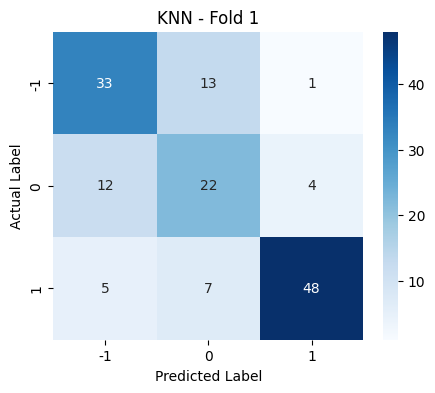


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.66      0.70      0.68        47
           0       0.52      0.58      0.55        38
           1       0.91      0.80      0.85        60

    accuracy                           0.71       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.73      0.71      0.72       145

Fold 2: Akurasi = 0.6759


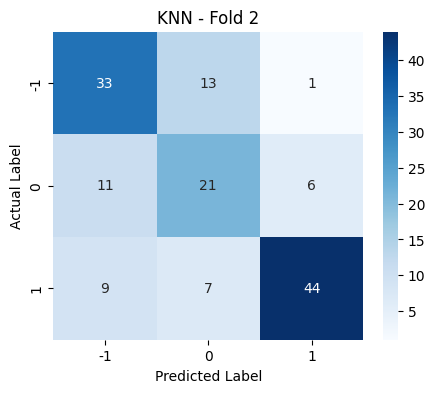


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.70      0.66        47
           0       0.51      0.55      0.53        38
           1       0.86      0.73      0.79        60

    accuracy                           0.68       145
   macro avg       0.67      0.66      0.66       145
weighted avg       0.69      0.68      0.68       145

Fold 3: Akurasi = 0.7034


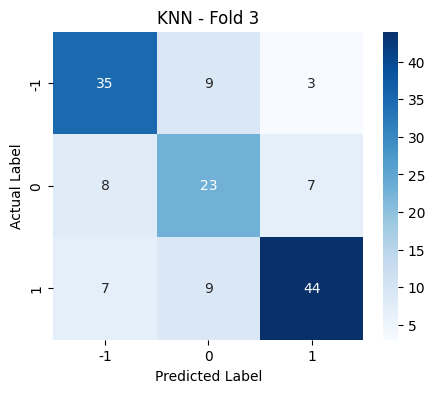


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.70      0.74      0.72        47
           0       0.56      0.61      0.58        38
           1       0.81      0.73      0.77        60

    accuracy                           0.70       145
   macro avg       0.69      0.69      0.69       145
weighted avg       0.71      0.70      0.71       145

Fold 4: Akurasi = 0.6897


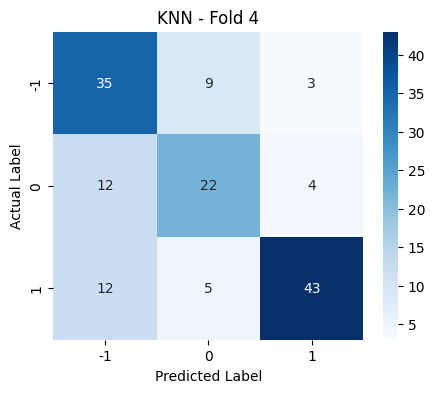


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.59      0.74      0.66        47
           0       0.61      0.58      0.59        38
           1       0.86      0.72      0.78        60

    accuracy                           0.69       145
   macro avg       0.69      0.68      0.68       145
weighted avg       0.71      0.69      0.69       145

Fold 5: Akurasi = 0.6759


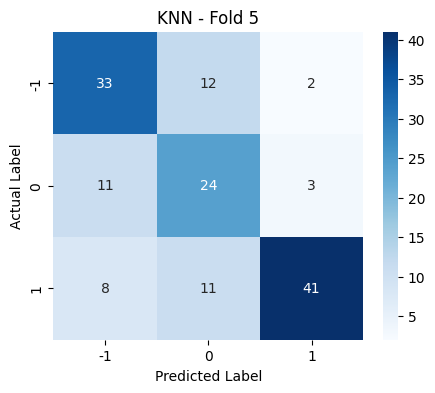


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.70      0.67        47
           0       0.51      0.63      0.56        38
           1       0.89      0.68      0.77        60

    accuracy                           0.68       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.71      0.68      0.68       145

Fold 6: Akurasi = 0.6759


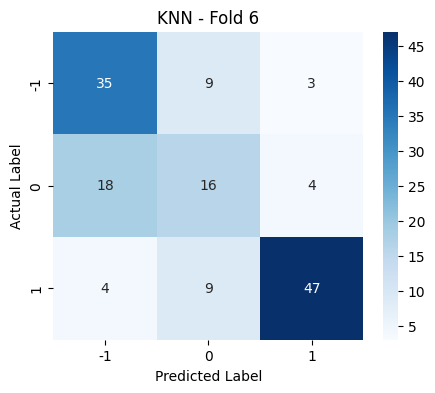


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.74      0.67        47
           0       0.47      0.42      0.44        38
           1       0.87      0.78      0.82        60

    accuracy                           0.68       145
   macro avg       0.65      0.65      0.65       145
weighted avg       0.68      0.68      0.68       145

Fold 7: Akurasi = 0.6759


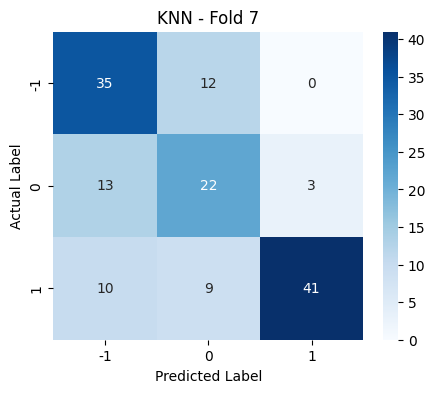


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.60      0.74      0.67        47
           0       0.51      0.58      0.54        38
           1       0.93      0.68      0.79        60

    accuracy                           0.68       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.72      0.68      0.68       145

Fold 8: Akurasi = 0.6528


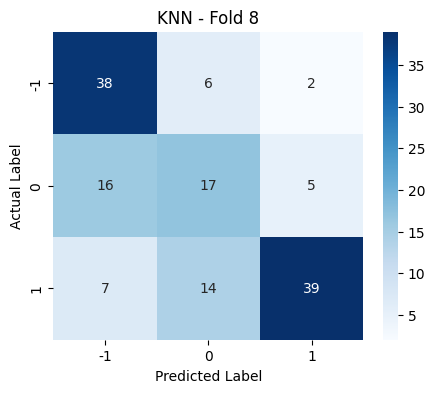


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.83      0.71        46
           0       0.46      0.45      0.45        38
           1       0.85      0.65      0.74        60

    accuracy                           0.65       144
   macro avg       0.64      0.64      0.63       144
weighted avg       0.67      0.65      0.65       144

Fold 9: Akurasi = 0.6389


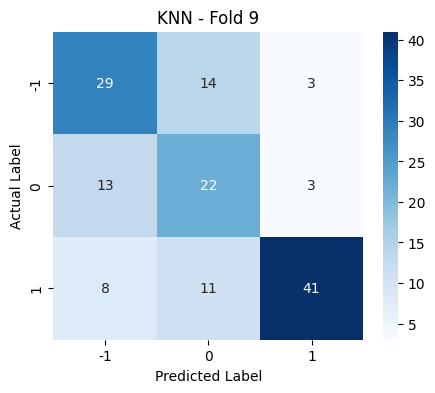


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.58      0.63      0.60        46
           0       0.47      0.58      0.52        38
           1       0.87      0.68      0.77        60

    accuracy                           0.64       144
   macro avg       0.64      0.63      0.63       144
weighted avg       0.67      0.64      0.65       144

Fold 10: Akurasi = 0.6458


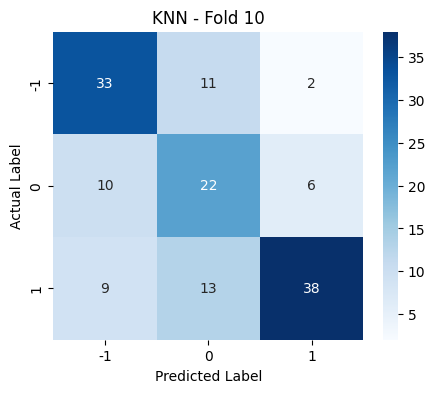


📊 Classification Report:
              precision    recall  f1-score   support

          -1       0.63      0.72      0.67        46
           0       0.48      0.58      0.52        38
           1       0.83      0.63      0.72        60

    accuracy                           0.65       144
   macro avg       0.65      0.64      0.64       144
weighted avg       0.67      0.65      0.65       144


📊 Rata-rata Akurasi untuk K=11: 0.6744



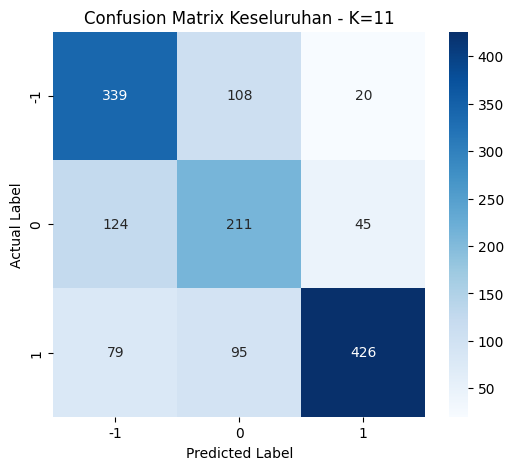


📊 Classification Report Keseluruhan untuk K=11:
              precision    recall  f1-score   support

          -1       0.63      0.73      0.67       467
           0       0.51      0.56      0.53       380
           1       0.87      0.71      0.78       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.70      0.67      0.68      1447


🏆 Hasil Terbaik:
K terbaik: 3, dengan Akurasi tertinggi: 0.7655


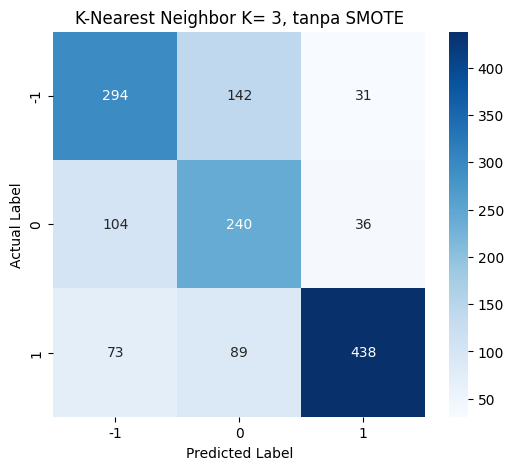


📊 Classification Report untuk Model Terbaik:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.63       467
           0       0.51      0.63      0.56       380
           1       0.87      0.73      0.79       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447



In [ ]:


k_results = {}  # Untuk menyimpan akurasi rata-rata tiap K
best_accuracy = 0
best_predictions = None
best_conf_matrix = None
best_class_report = None

for k in k_values:
    print(f"\n🔍 Evaluasi untuk K = {k}")

    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    fold_data_KNN = []
    accuracies_KNN = []
    all_predictions_KNN = []
    conf_matrices_KNN = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        test_texts = datafinal['content'].iloc[test_idx].values

        # Latih model
        knn.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi
        fold_predictions = pd.DataFrame({
            "Fold": fold,
            "Text": test_texts,
            "Actual Label": y_test.values,
            "Predicted Label": y_pred
        })
        all_predictions_KNN.append(fold_predictions)

        # Menghitung akurasi
        acc = accuracy_score(y_test, y_pred)
        accuracies_KNN.append(acc)

        # Simpan confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        conf_matrices_KNN.append(cm)

        # Simpan data tiap fold
        fold_data_KNN.append({
            "Fold": fold,
            "Train Data": len(train_idx),
            "Test Data": len(test_idx),
            "Accuracy": acc
        })

        # Tampilkan hasil tiap fold
        print(f"Fold {fold}: Akurasi = {acc:.4f}")

        # Tampilkan confusion matrix tiap fold
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
        plt.xlabel("Predicted Label")
        plt.ylabel("Actual Label")
        plt.title(f"KNN - Fold {fold}")
        plt.show()

        # Tampilkan classification report tiap fold
        print("\n📊 Classification Report:")
        print(classification_report(y_test, y_pred))

    # Simpan rata-rata akurasi untuk nilai K ini
    avg_accuracy = max(accuracies_KNN)
    k_results[k] = avg_accuracy

    print(f"\n📊 Rata-rata Akurasi untuk K={k}: {sum(accuracies_KNN)/len(accuracies_KNN):.4f}\n")

    # Gabungkan semua hasil prediksi
    predictions_df = pd.concat(all_predictions_KNN, ignore_index=True)

    # Simpan confusion matrix dan classification report untuk seluruh fold
    y_actual_all = predictions_df["Actual Label"]
    y_predicted_all = predictions_df["Predicted Label"]

    cm_all = confusion_matrix(y_actual_all, y_predicted_all)
    class_report_all = classification_report(y_actual_all, y_predicted_all)

    # Simpan hasil terbaik
    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_predictions = predictions_df
        best_conf_matrix = cm_all
        best_class_report = class_report_all

    # Tampilkan confusion matrix keseluruhan
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_all, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix Keseluruhan - K={k}")
    plt.show()

    # Tampilkan classification report keseluruhan
    print(f"\n📊 Classification Report Keseluruhan untuk K={k}:")
    print(class_report_all)

# Menampilkan hasil terbaik
print("\n🏆 Hasil Terbaik:")
print(f"K terbaik: {max(k_results, key=k_results.get)}, dengan Akurasi tertinggi: {best_accuracy:.4f}")

# Tampilkan confusion matrix terbaik
plt.figure(figsize=(6, 5))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"K-Nearest Neighbor K= {max(k_results, key=k_results.get)}, tanpa SMOTE")
plt.show()

print("\n📊 Classification Report untuk Model Terbaik:")
print(best_class_report)



🔍 Evaluasi untuk K = 3
Fold 1: Akurasi = 0.7655
Fold 2: Akurasi = 0.6138
Fold 3: Akurasi = 0.7034
Fold 4: Akurasi = 0.6345
Fold 5: Akurasi = 0.6897
Fold 6: Akurasi = 0.6897
Fold 7: Akurasi = 0.6552
Fold 8: Akurasi = 0.6250
Fold 9: Akurasi = 0.6875
Fold 10: Akurasi = 0.6528

📊 Akurasi tertinhggi untuk K=3: 0.7655



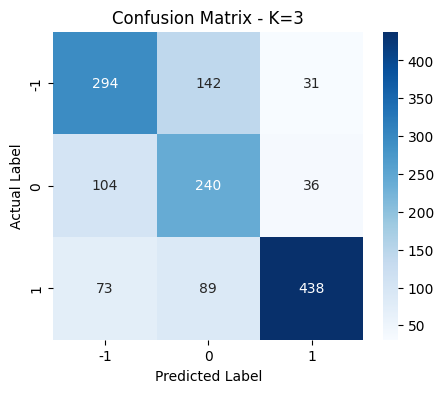


📊 Classification Report untuk K=3:
              precision    recall  f1-score   support

          -1       0.62      0.63      0.63       467
           0       0.51      0.63      0.56       380
           1       0.87      0.73      0.79       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447


🔍 Evaluasi untuk K = 5
Fold 1: Akurasi = 0.7517
Fold 2: Akurasi = 0.6414
Fold 3: Akurasi = 0.7241
Fold 4: Akurasi = 0.6966
Fold 5: Akurasi = 0.6690
Fold 6: Akurasi = 0.6759
Fold 7: Akurasi = 0.6207
Fold 8: Akurasi = 0.6042
Fold 9: Akurasi = 0.6250
Fold 10: Akurasi = 0.6736

📊 Akurasi tertinhggi untuk K=5: 0.7517



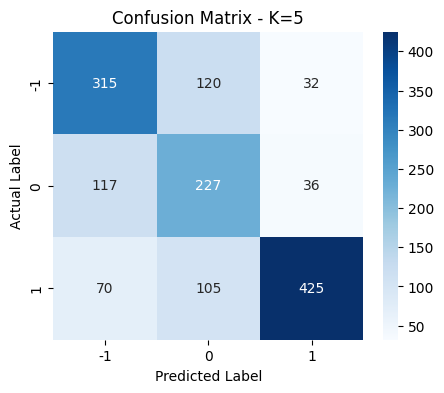


📊 Classification Report untuk K=5:
              precision    recall  f1-score   support

          -1       0.63      0.67      0.65       467
           0       0.50      0.60      0.55       380
           1       0.86      0.71      0.78       600

    accuracy                           0.67      1447
   macro avg       0.66      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447


🔍 Evaluasi untuk K = 7
Fold 1: Akurasi = 0.7448
Fold 2: Akurasi = 0.6552
Fold 3: Akurasi = 0.7448
Fold 4: Akurasi = 0.6897
Fold 5: Akurasi = 0.6621
Fold 6: Akurasi = 0.6483
Fold 7: Akurasi = 0.6621
Fold 8: Akurasi = 0.6319
Fold 9: Akurasi = 0.6528
Fold 10: Akurasi = 0.6667

📊 Akurasi tertinhggi untuk K=7: 0.7448



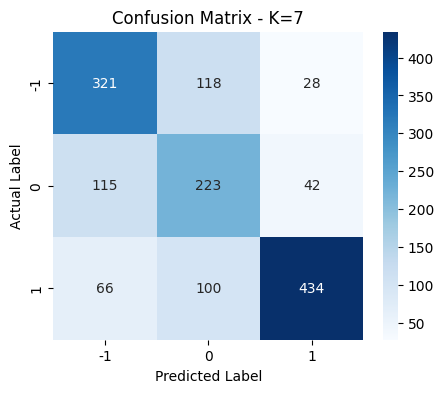


📊 Classification Report untuk K=7:
              precision    recall  f1-score   support

          -1       0.64      0.69      0.66       467
           0       0.51      0.59      0.54       380
           1       0.86      0.72      0.79       600

    accuracy                           0.68      1447
   macro avg       0.67      0.67      0.66      1447
weighted avg       0.70      0.68      0.68      1447


🔍 Evaluasi untuk K = 9
Fold 1: Akurasi = 0.7103
Fold 2: Akurasi = 0.6621
Fold 3: Akurasi = 0.7379
Fold 4: Akurasi = 0.7103
Fold 5: Akurasi = 0.6966
Fold 6: Akurasi = 0.6276
Fold 7: Akurasi = 0.6621
Fold 8: Akurasi = 0.6389
Fold 9: Akurasi = 0.6597
Fold 10: Akurasi = 0.6458

📊 Akurasi tertinhggi untuk K=9: 0.7379



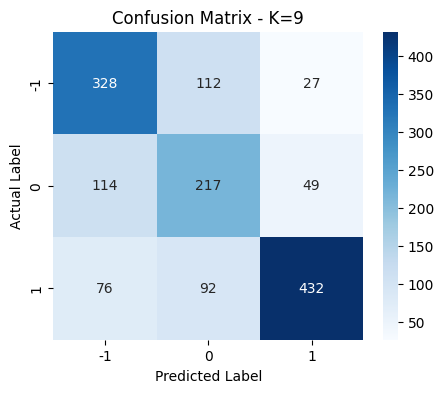


📊 Classification Report untuk K=9:
              precision    recall  f1-score   support

          -1       0.63      0.70      0.67       467
           0       0.52      0.57      0.54       380
           1       0.85      0.72      0.78       600

    accuracy                           0.68      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.68      0.68      1447


🔍 Evaluasi untuk K = 11
Fold 1: Akurasi = 0.7103
Fold 2: Akurasi = 0.6759
Fold 3: Akurasi = 0.7034
Fold 4: Akurasi = 0.6897
Fold 5: Akurasi = 0.6759
Fold 6: Akurasi = 0.6759
Fold 7: Akurasi = 0.6759
Fold 8: Akurasi = 0.6528
Fold 9: Akurasi = 0.6389
Fold 10: Akurasi = 0.6458

📊 Akurasi tertinhggi untuk K=11: 0.7103



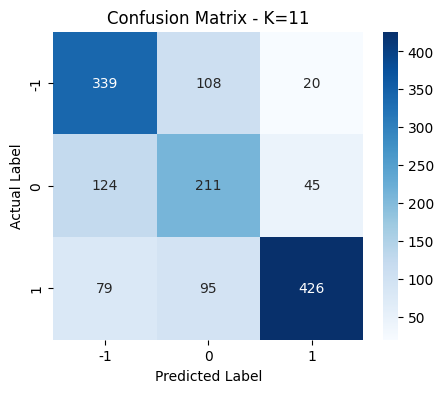


📊 Classification Report untuk K=11:
              precision    recall  f1-score   support

          -1       0.63      0.73      0.67       467
           0       0.51      0.56      0.53       380
           1       0.87      0.71      0.78       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.70      0.67      0.68      1447



In [ ]:
for k in k_values:
    print(f"\n🔍 Evaluasi untuk K = {k}")

    knn = KNeighborsClassifier(n_neighbors=k)
    fold_data_KNN = []
    accuracies_KNN = []
    all_predictions_KNN = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        test_texts = datafinal['content'].iloc[test_idx].values



        # Latih model
        knn.fit(X_train, y_train)

        # Prediksi pada data uji
        y_pred = knn.predict(X_test)

        # Simpan hasil prediksi
        fold_predictions = pd.DataFrame({
            "Fold": fold,
            "Text": test_texts,
            "Actual Label": y_test.values,
            "Predicted Label": y_pred
        })
        all_predictions_KNN.append(fold_predictions)

        # Menghitung akurasi
        acc = accuracy_score(y_test, y_pred)
        accuracies_KNN.append(acc)

        fold_data_KNN.append({
            "Fold": fold,
            "Train Data": len(train_idx),
            "Test Data": len(test_idx),
            "Accuracy": acc
        })
        print(f"Fold {fold}: Akurasi = {acc:.4f}")

    # Simpan rata-rata akurasi untuk nilai K ini
    avg_accuracy = max(accuracies_KNN)
    k_results[k] = avg_accuracy

    print(f"\n📊 Akurasi tertinhggi untuk K={k}: {avg_accuracy:.4f}\n")

    # Gabungkan semua hasil prediksi
    predictions_df = pd.concat(all_predictions_KNN, ignore_index=True)

    # Simpan confusion matrix dan classification report
    y_actual_all = predictions_df["Actual Label"]
    y_predicted_all = predictions_df["Predicted Label"]

    cm = confusion_matrix(y_actual_all, y_predicted_all)
    class_report = classification_report(y_actual_all, y_predicted_all)

    # Simpan hasil terbaik
    if avg_accuracy == max(k_results.values()):
        best_predictions = predictions_df
        best_conf_matrix = cm
        best_class_report = class_report

    # Tampilkan confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - K={k}")
    plt.show()

    # Tampilkan classification report
    print(f"\n📊 Classification Report untuk K={k}:")
    print(class_report)



🔹 Hasil Akhir:
K = 3, Rata-rata Akurasi = 0.7655
K = 5, Rata-rata Akurasi = 0.7517
K = 7, Rata-rata Akurasi = 0.7448
K = 9, Rata-rata Akurasi = 0.7379
K = 11, Rata-rata Akurasi = 0.7103

🏆 Nilai K terbaik adalah 3 dengan akurasi rata-rata 0.7655

✅ Hasil prediksi terbaik disimpan dalam 'hasil_prediksi_KNN.csv'


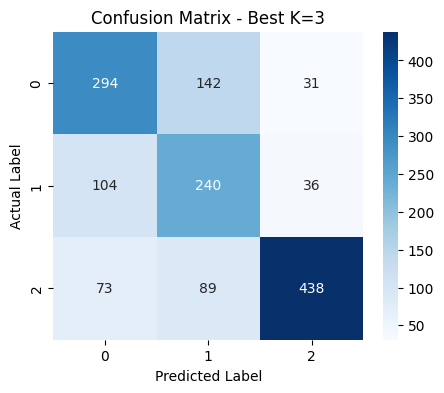


📊 Classification Report untuk K Terbaik (K=3):
              precision    recall  f1-score   support

          -1       0.62      0.63      0.63       467
           0       0.51      0.63      0.56       380
           1       0.87      0.73      0.79       600

    accuracy                           0.67      1447
   macro avg       0.67      0.66      0.66      1447
weighted avg       0.69      0.67      0.68      1447



In [ ]:
# Pilih nilai K terbaik berdasarkan akurasi tertinggi
best_k = max(k_results, key=k_results.get)
best_accuracy = k_results[best_k]

print("\n🔹 Hasil Akhir:")
for k, acc in k_results.items():
    print(f"K = {k}, Rata-rata Akurasi = {acc:.4f}")

print(f"\n🏆 Nilai K terbaik adalah {best_k} dengan akurasi rata-rata {best_accuracy:.4f}")

# Simpan hasil prediksi terbaik ke CSV
if best_predictions is not None:
    best_predictions.to_csv("hasil_prediksi_KNN.csv", mode='w', index=False)
    print("\n✅ Hasil prediksi terbaik disimpan dalam 'hasil_prediksi_KNN.csv'")

# Tampilkan confusion matrix terbaik
plt.figure(figsize=(5, 4))
sns.heatmap(best_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title(f"Confusion Matrix - Best K={best_k}")
plt.show()

# Tampilkan classification report terbaik
print(f"\n📊 Classification Report untuk K Terbaik (K={best_k}):")
print(best_class_report)
